# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [508]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [509]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')
num_data = data1.shape[0]
# theta 원소 갯수 k
k1 = 3
k2 = 4
print(data1.shape, data2.shape)

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

d1_x = data1[:,0]
d1_y = data1[:,1]
d1_label = data1[:,2]

d2_x = data2[:,0]
d2_y = data2[:,1]
d2_label = data2[:,2]


d1_0_x = np.array([data1[i][0] for i in range(num_data) if data1[i][2] == 0])
d1_0_y = np.array([data1[i][1] for i in range(num_data) if data1[i][2] == 0])

d1_1_x = np.array([data1[i][0] for i in range(num_data) if data1[i][2] == 1])
d1_1_y = np.array([data1[i][1] for i in range(num_data) if data1[i][2] == 1])
    
d1_z = data1[:,2]

d2_0_x = np.array([data2[i][0] for i in range(num_data) if data2[i][2] == 0])
d2_0_y = np.array([data2[i][1] for i in range(num_data) if data2[i][2] == 0])
d2_1_x = np.array([data2[i][0] for i in range(num_data) if data2[i][2] == 1])
d2_1_y = np.array([data2[i][1] for i in range(num_data) if data2[i][2] == 1])


d2_z = data2[:,2]

print(d1_0_x.shape, d1_0_y.shape, d2_1_x.shape, d2_1_y.shape)
print(d1_x.shape)
print(num_data)

(1000, 3) (1000, 3)
(500,) (500,) (500,) (500,)
(1000,)
1000


## plot the data

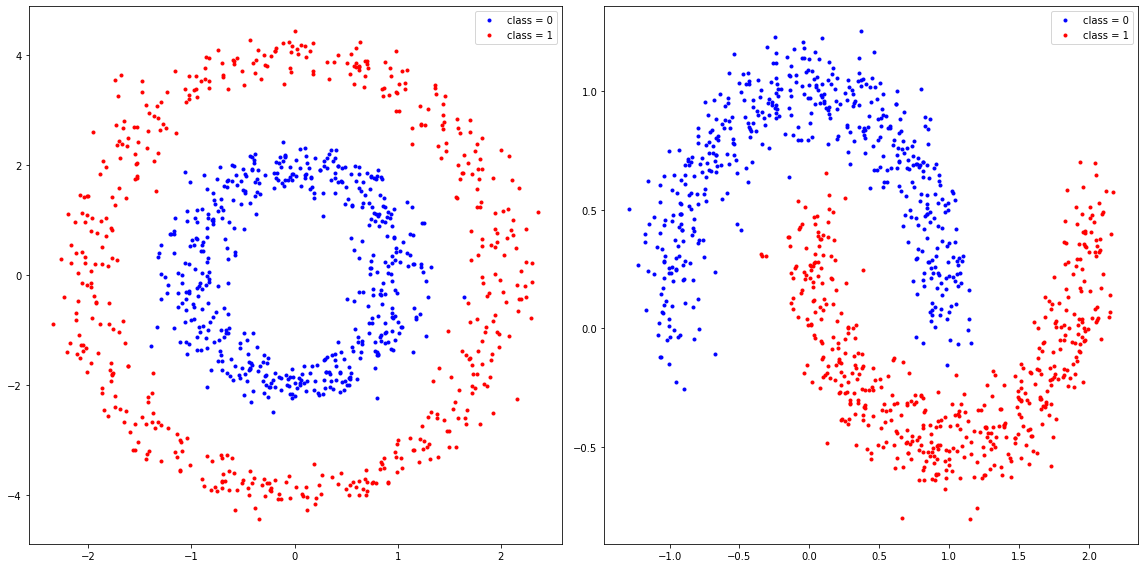

In [510]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(d1_0_x,d1_0_y, '.', color = 'blue', label = 'class = 0')
plt.plot(d1_1_x,d1_1_y, '.', color = 'red', label = 'class = 1')

plt.legend()
plt.tight_layout()


plt.subplot(122)
plt.plot(d2_0_x, d2_0_y, '.', color = 'blue', label = 'class = 0')
plt.plot(d2_1_x, d2_1_y, '.', color = 'red', label = 'class = 1')

plt.legend()
plt.tight_layout()
plt.show()

## define the feature function for each data to obtain the best accuracy

In [511]:
def feature_function1(x, y):
    f0 = (x**2 ).reshape(1000,1)
    f1 = ( y**2).reshape(1000,1)
    f2 = (-np.ones((num_data,1))).reshape(1000,1)
    
    feature = np.hstack([f0,f1,f2])
    return feature
# 1000, k 크기의 array를 return 
tt = feature_function1(d1_x, d1_y).shape
print(tt)

(1000, 3)


In [512]:
def feature_function2(x, y):
    f0 = (x**3).reshape(1000,1)
    f1 = (-(x**2)).reshape(1000,1)
    f2 = np.ones((num_data,1)).reshape(1000,1)
    f3 = (-y).reshape(1000,1)
    
    feature = np.hstack([f0,f1,f2,f3])
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [513]:
def regression_function(theta, feature):
    # feature.shape. = (1000,k),  theta.shape = (k,)
    value = np.matmul(feature, theta.reshape(theta.shape[0],1))
    # value.shape = (1000,1)
    return value

## define sigmoid function with input $x$

In [514]:
def logistic_function(x):
    z = 1 / (1+ np.exp(-x))
    return z

## define loss function with feature and label based on the logistic regression

In [515]:
def compute_loss_feature(theta, feature, label):
    
    value = np.matmul(feature, theta.reshape(theta.shape[0],1))
    z = 1 / (1+ np.exp(-value))
    
    label = label.T
    loss = (np.dot(label, np.log(z)) + np.dot((1 -label) , np.log(1-z)) )/ np.size(label) *(-1) 
    
#loss는 실수 값
    return loss 


## define gradient vector for the model parameters $\theta$

In [516]:
def compute_gradient_feature(theta, feature, label):
    value = feature @ theta.reshape(theta.shape[0],1)
    # value.shape = (1000,1)
    
    #sigmoid
    value = 1 + np.exp(-value)
    z = 1 / value
    # z.shape = (1000,1)
    
    temp = z - label.reshape(num_data,1)
    temp = temp.reshape(num_data,)
    temp2 = (z - label.reshape(num_data,1)).reshape(num_data,)
    for i in range(theta.shape[0]-1):
        temp = np.vstack([temp,temp2])
    ff = feature.T
    
    gradient = (temp * ff).mean(axis=1)
    
    return gradient


## compute the accuracy

In [517]:
def compute_accuracy(theta, feature, label):
    data_num = label.shape[0]
    # feature.shape = (1000,k), theta.shape = (k,)
    value = np.matmul(feature, theta.reshape(theta.shape[0],1))
    # value.shape = (1000,1)
    
    #sigmoid
    value = 1 + np.exp(-value)
    z = 1 / value
    # z.shape = (1000,1)
    z = z + 0.5
    z = np.trunc(z)
    z = z.astype('int64')
    
    accuracy = np.sum(np.not_equal(z,label.reshape(label.shape[0],1))) / data_num
    accuracy = 1- accuracy
    return accuracy

## gradient descent for the model parameters $\theta$

In [518]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.5    # USE THIS VALUE for the learning rate

loss1_iteration = np.zeros(num_iteration)
loss2_iteration = np.zeros(num_iteration)
theta1_iteration = np.zeros((num_iteration,k1))
theta2_iteration = np.zeros((num_iteration,k2))

theta1 = np.array([1,1,1])
theta2 = np.array([1,1,1,1])
loss1 ,loss2 = 100,100

feature1 = feature_function1(d1_x, d1_y)

feature2 = feature_function2(d2_x, d2_y)

In [519]:
for i in range(num_iteration):
    
 
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, d1_label)
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, d2_label)
    
    loss1 = compute_loss_feature(theta1, feature1, d1_label)
    loss2 = compute_loss_feature(theta2, feature2, d2_label)
    
    
    loss1_iteration[i] = loss1
    loss2_iteration[i] = loss2
    theta1_iteration[i] = theta1
    theta2_iteration[i] = theta2
    
    print(theta1, loss1, theta2, loss2)
    
theta1_optimal = theta1
theta2_optimal = theta2

[0.91735304 0.549755   1.18925804] [0.49419763] [1.00684175 1.03542341 0.92378067 1.07878536] [0.39946672]
[0.86406062 0.21354221 1.3312186 ] [0.31456561] [1.01662779 1.06528904 0.8582363  1.15206605] [0.37923235]
[0.86249764 0.23185311 1.40032273] [0.30482347] [1.02877619 1.09054407 0.80187197 1.22051012] [0.36274682]
[0.86264729 0.22533074 1.46916423] [0.29602129] [1.0426491  1.11207236 0.75334276 1.28470757] [0.3490962]
[0.8696263  0.25595511 1.53037609] [0.28806504] [1.05764914 1.13064705 0.71148135 1.34516846] [0.33761337]
[0.87375803 0.23092219 1.59609922] [0.28077489] [1.07327268 1.14691167 0.67529839 1.40232899] [0.32781335]
[0.8878009  0.28396224 1.64949571] [0.27448837] [1.08912621 1.16138319 0.64396704 1.45656072] [0.31934099]
[0.89264643 0.23244769 1.71456657] [0.26818254] [1.10491977 1.17446726 0.6168006  1.50818022] [0.31193246]
[0.9126497  0.31471003 1.76031325] [0.26382643] [1.12045009 1.18647788 0.59322927 1.55745792] [0.30538843]
[0.91628647 0.2355197  1.82608297] [0.

[2.00132107 0.55846935 4.66387979] [0.07047077] [1.66534231 2.1533545  1.03058299 3.82349067] [0.16989547]
[2.0065455  0.55979971 4.67678573] [0.07008074] [1.66829641 2.16066156 1.03569874 3.83349398] [0.1695196]
[2.01173784 0.56112203 4.6896101 ] [0.06969561] [1.67125288 2.16795564 1.04079174 3.84343334] [0.16914709]
[2.01689848 0.56243643 4.70235393] [0.06931526] [1.67421164 2.17523681 1.04586213 3.85330948] [0.16877787]
[2.02202781 0.56374299 4.71501823] [0.06893962] [1.67717265 2.18250514 1.05091004 3.86312313] [0.16841191]
[2.02712621 0.56504181 4.72760402] [0.0685686] [1.68013583 2.1897607  1.05593559 3.872875  ] [0.16804914]
[2.03219405 0.56633298 4.74011227] [0.06820211] [1.68310113 2.19700357 1.06093893 3.8825658 ] [0.16768953]
[2.03723169 0.5676166  4.75254394] [0.06784007] [1.68606847 2.20423379 1.06592019 3.8921962 ] [0.16733302]
[2.04223951 0.56889276 4.76489998] [0.06748239] [1.68903781 2.21145145 1.07087951 3.90176689] [0.16697957]
[2.04721784 0.57016155 4.77718133] [0.0

[2.60802181 0.71431197 6.15257036] [0.03831372] [2.16221192 3.24377613 1.66955903 4.95176048] [0.13206971]
[2.61058872 0.71497887 6.15884683] [0.038221] [2.16502205 3.24953654 1.67242926 4.95632896] [0.13192947]
[2.61314801 0.71564386 6.16510461] [0.03812883] [2.16783013 3.25529032 1.6752923  4.96088177] [0.13178977]
[2.61569971 0.71630697 6.17134383] [0.03803721] [2.17063616 3.2610375  1.67814819 4.96541901] [0.13165062]
[2.61824388 0.71696819 6.1775646 ] [0.03794613] [2.17344014 3.2667781  1.68099697 4.96994076] [0.13151199]
[2.62078055 0.71762755 6.18376703] [0.03785559] [2.17624206 3.27251214 1.68383868 4.97444713] [0.1313739]
[2.62330978 0.71828504 6.18995124] [0.03776557] [2.17904193 3.27823964 1.68667336 4.97893822] [0.13123633]
[2.62583161 0.71894069 6.19611732] [0.03767608] [2.18183975 3.28396062 1.68950104 4.98341411] [0.13109929]
[2.62834608 0.71959451 6.2022654 ] [0.03758711] [2.18463551 3.2896751  1.69232176 4.9878749 ] [0.13096276]
[2.63085323 0.72024649 6.20839558] [0.03

[2.95323247 0.80478283 6.99706695] [0.02800427] [2.59879771 4.11689475 2.06781203 5.54696898] [0.11419683]
[2.95495789 0.80523939 7.00129316] [0.02796222] [2.60128625 4.12177475 2.06986607 5.54984911] [0.11411184]
[2.95667991 0.80569509 7.00551113] [0.02792033] [2.60377301 4.12665042 2.07191673 5.55272269] [0.11402705]
[2.95839856 0.80614995 7.0097209 ] [0.0278786] [2.60625802 4.13152178 2.073964   5.55558975] [0.11394247]
[2.96011383 0.80660397 7.0139225 ] [0.02783704] [2.60874126 4.13638884 2.07600792 5.55845033] [0.11385809]
[2.96182576 0.80705714 7.01811597] [0.02779564] [2.61122275 4.1412516  2.07804848 5.56130444] [0.11377391]
[2.96353434 0.80750948 7.02230134] [0.0277544] [2.61370248 4.14611008 2.0800857  5.56415213] [0.11368994]
[2.96523959 0.80796098 7.02647864] [0.02771331] [2.61618046 4.15096428 2.0821196  5.56699341] [0.11360616]
[2.96694153 0.80841165 7.03064791] [0.02767239] [2.61865669 4.15581421 2.08415018 5.56982832] [0.11352258]
[2.96864017 0.8088615  7.03480917] [0.0

[3.20266381 0.871311   7.60908536] [0.02269027] [2.99173412 4.87817712 2.37180601 5.95510724] [0.10227682]
[3.20396394 0.87166073 7.61228213] [0.02266623] [2.9939602  4.88244358 2.37342946 5.95719739] [0.10221652]
[3.20526216 0.87200998 7.61547429] [0.02264225] [2.99618488 4.8867069  2.37505096 5.95928417] [0.10215633]
[3.20655849 0.87235875 7.61866186] [0.02261834] [2.99840817 4.8909671  2.3766705  5.96136758] [0.10209624]
[3.20785292 0.87270704 7.62184486] [0.0225945] [3.00063008 4.89522418 2.37828811 5.96344765] [0.10203627]
[3.20914546 0.87305486 7.62502329] [0.02257073] [3.00285059 4.89947814 2.37990377 5.96552439] [0.10197639]
[3.21043612 0.8734022  7.62819718] [0.02254703] [3.00506972 4.903729   2.38151751 5.9675978 ] [0.10191662]
[3.21172491 0.87374908 7.63136653] [0.02252339] [3.00728747 4.90797675 2.38312931 5.9696679 ] [0.10185696]
[3.21301182 0.87409547 7.63453136] [0.02249983] [3.00950383 4.91222139 2.3847392  5.9717347 ] [0.1017974]
[3.21429687 0.8744414  7.63769169] [0.0

[3.40227136 0.92540511 8.10091813] [0.01936892] [3.35556806 5.56991405 2.6262484  6.27327431] [0.09323195]
[3.40331062 0.92568896 8.10348481] [0.01935343] [3.3575792  5.57370914 2.62760182 6.27492161] [0.09318598]
[3.40434867 0.92597251 8.10604859] [0.01933798] [3.35958922 5.57750183 2.62895399 6.27656697] [0.09314008]
[3.40538552 0.92625575 8.10860946] [0.01932256] [3.36159812 5.58129212 2.63030489 6.27821039] [0.09309424]
[3.40642117 0.9265387  8.11116743] [0.01930718] [3.3636059  5.58508002 2.63165455 6.27985188] [0.09304847]
[3.40745562 0.92682133 8.11372252] [0.01929183] [3.36561257 5.58886552 2.63300296 6.28149143] [0.09300276]
[3.40848888 0.92710367 8.11627473] [0.01927652] [3.36761812 5.59264864 2.63435012 6.28312906] [0.09295711]
[3.40952095 0.9273857  8.11882406] [0.01926124] [3.36962256 5.59642937 2.63569603 6.28476476] [0.09291153]
[3.41055183 0.92766744 8.12137052] [0.01924599] [3.37162588 5.60020772 2.63704071 6.28639856] [0.09286601]
[3.41158153 0.92794887 8.12391413] [0

[3.56450462 0.97001828 8.50244745] [0.01714751] [3.6842039  6.18647678 2.84144313 6.53059378] [0.08620118]
[3.56537236 0.97025861 8.50460002] [0.01713663] [3.686041   6.1899044  2.84261619 6.53197452] [0.08616438]
[3.56623927 0.97049872 8.50675058] [0.01712577] [3.68787717 6.1933301  2.84378836 6.53335401] [0.08612762]
[3.56710535 0.97073862 8.50889913] [0.01711493] [3.68971241 6.19675388 2.84495965 6.53473227] [0.08609091]
[3.56797059 0.9709783  8.51104567] [0.0171041] [3.69154674 6.20017574 2.84613006 6.5361093 ] [0.08605424]
[3.56883501 0.97121778 8.51319022] [0.0170933] [3.69338014 6.20359569 2.84729959 6.53748509] [0.08601761]
[3.5696986  0.97145705 8.51533276] [0.01708252] [3.69521262 6.20701372 2.84846824 6.53885966] [0.08598103]
[3.57056137 0.9716961  8.51747332] [0.01707176] [3.69704418 6.21042984 2.84963602 6.540233  ] [0.08594449]
[3.57142331 0.97193495 8.51961188] [0.01706101] [3.69887483 6.21384404 2.85080293 6.54160511] [0.085908]
[3.57228444 0.97217359 8.52174847] [0.017

[3.70196867 1.00833074 8.84416086] [0.0155414] [3.98565554 6.74640693 3.03040229 6.75080417] [0.08048375]
[3.70271429 1.00853993 8.84601842] [0.0155333] [3.9873475  6.74953613 3.03144491 6.75200904] [0.08045337]
[3.7034593  1.00874895 8.8478745 ] [0.01552522] [3.98903869 6.75266375 3.03248687 6.75321305] [0.08042302]
[3.7042037  1.00895782 8.84972911] [0.01551714] [3.9907291  6.75578979 3.03352817 6.75441622] [0.0803927]
[3.7049475  1.00916653 8.85158225] [0.01550909] [3.99241873 6.75891425 3.03456882 6.75561854] [0.08036242]
[3.70569068 1.00937509 8.85343392] [0.01550104] [3.99410759 6.76203713 3.03560881 6.75682002] [0.08033217]
[3.70643326 1.00958349 8.85528412] [0.01549301] [3.99579567 6.76515844 3.03664815 6.75802065] [0.08030195]
[3.70717523 1.00979174 8.85713285] [0.01548499] [3.99748297 6.76827817 3.03768683 6.75922045] [0.08027176]
[3.70791659 1.00999983 8.85898013] [0.01547698] [3.99916951 6.77139633 3.03872486 6.7604194 ] [0.0802416]
[3.70865736 1.01020777 8.86082594] [0.015

[3.82200083 1.04220714 9.14380029] [0.01431531] [4.26581022 7.26267545 3.20083016 6.94680807] [0.07568567]
[3.82265452 1.04239277 9.14543555] [0.01430904] [4.26737841 7.26555523 3.20177285 6.94788823] [0.07566006]
[3.82330775 1.04257828 9.14706967] [0.01430278] [4.26894593 7.26843369 3.20271502 6.94896777] [0.07563448]
[3.8239605  1.04276368 9.14870267] [0.01429653] [4.27051279 7.27131082 3.20365669 6.9500467 ] [0.07560891]
[3.82461279 1.04294895 9.15033454] [0.01429028] [4.27207899 7.27418662 3.20459784 6.95112501] [0.07558338]
[3.82526462 1.04313411 9.15196528] [0.01428405] [4.27364452 7.2770611  3.20553849 6.95220271] [0.07555786]
[3.82591598 1.04331914 9.15359491] [0.01427782] [4.27520939 7.27993426 3.20647862 6.95327979] [0.07553237]
[3.82656688 1.04350406 9.15522341] [0.0142716] [4.2767736  7.28280609 3.20741824 6.95435626] [0.07550691]
[3.82721731 1.04368886 9.15685079] [0.01426539] [4.27833715 7.28567661 3.20835736 6.95543212] [0.07548147]
[3.82786729 1.04387354 9.15847705] [0.

[3.92458812 1.07149941 9.40091009] [0.01338111] [4.51744315 7.72345192 3.35077017 7.11836271] [0.07173838]
[3.92517264 1.07166725 9.40237789] [0.01337606] [4.51890849 7.72612771 3.35163619 7.11935284] [0.07171631]
[3.92575679 1.071835   9.40384478] [0.01337102] [4.52037325 7.72880236 3.3525018  7.12034248] [0.07169425]
[3.92634057 1.07200266 9.40531077] [0.01336599] [4.52183743 7.73147588 3.35336698 7.12133165] [0.07167222]
[3.92692398 1.07217021 9.40677587] [0.01336096] [4.52330104 7.73414827 3.35423176 7.12232035] [0.07165021]
[3.92750702 1.07233768 9.40824007] [0.01335594] [4.52476407 7.73681952 3.35509612 7.12330857] [0.07162821]
[3.92808969 1.07250505 9.40970338] [0.01335092] [4.52622653 7.73948964 3.35596006 7.12429632] [0.07160624]
[3.92867199 1.07267232 9.41116579] [0.01334591] [4.52768841 7.74215863 3.3568236  7.12528359] [0.07158428]
[3.92925392 1.0728395  9.41262731] [0.01334091] [4.52914972 7.74482649 3.35768671 7.12627039] [0.07156234]
[3.92983549 1.07300658 9.41408794] [0

[4.01686714 1.09813578 9.6330467 ] [0.01262035] [4.75312516 8.15279192 3.48917018 7.27666713] [0.06831494]
[4.01739598 1.09828925 9.6343795 ] [0.01261619] [4.75450081 8.15529205 3.48997317 7.27758647] [0.06829567]
[4.01792452 1.09844265 9.63571156] [0.01261204] [4.75587594 8.1577912  3.49077582 7.27850542] [0.06827643]
[4.01845275 1.09859596 9.63704289] [0.01260789] [4.75725057 8.16028936 3.49157812 7.279424  ] [0.0682572]
[4.01898068 1.0987492  9.63837349] [0.01260374] [4.7586247  8.16278653 3.49238008 7.28034219] [0.06823798]
[4.01950831 1.09890235 9.63970335] [0.0125996] [4.75999832 8.16528273 3.49318169 7.28126   ] [0.06821878]
[4.02003564 1.09905543 9.64103248] [0.01259547] [4.76137144 8.16777794 3.49398295 7.28217743] [0.06819959]
[4.02056267 1.09920844 9.64236089] [0.01259134] [4.76274405 8.17027218 3.49478388 7.28309449] [0.06818042]
[4.0210894  1.09936136 9.64368856] [0.01258721] [4.76411617 8.17276543 3.49558445 7.28401116] [0.06816126]
[4.02161582 1.09951421 9.64501551] [0.0

[4.10365168 1.12345147 9.85215223] [0.01196682] [4.98261152 8.56898694 3.62247001 7.42953318] [0.06520956]
[4.1041332  1.12359268 9.85337014] [0.01196335] [4.9839056  8.57132902 3.62321823 7.43039294] [0.06519264]
[4.10461447 1.12373382 9.85458745] [0.01195989] [4.98519923 8.57367024 3.62396617 7.43125239] [0.06517574]
[4.10509549 1.12387491 9.85580416] [0.01195642] [4.98649243 8.57601061 3.6247138  7.43211152] [0.06515885]
[4.10557627 1.12401592 9.85702026] [0.01195297] [4.98778518 8.57835012 3.62546115 7.43297034] [0.06514197]
[4.10605679 1.12415688 9.85823575] [0.01194951] [4.98907748 8.58068878 3.62620821 7.43382885] [0.0651251]
[4.10653706 1.12429776 9.85945064] [0.01194606] [4.99036934 8.58302658 3.62695497 7.43468705] [0.06510825]
[4.10701709 1.12443859 9.86066492] [0.01194261] [4.99166076 8.58536353 3.62770144 7.43554493] [0.06509141]
[4.10749687 1.12457934 9.8618786 ] [0.01193916] [4.99295174 8.58769963 3.62844763 7.4364025 ] [0.06507458]
[4.1079764  1.12472004 9.86309168] [0.

[ 4.17901786  1.14565772 10.04308415] [0.01144364] [5.18789858 8.93988254 3.74074736 7.56574056] [0.06260503]
[ 4.17946188  1.14578918 10.04421089] [0.01144067] [5.18912425 8.94209322 3.74145119 7.56655302] [0.06258994]
[ 4.1799057   1.14592059 10.04533712] [0.0114377] [5.19034953 8.94430313 3.74215476 7.56736521] [0.06257486]
[ 4.1803493   1.14605194 10.04646284] [0.01143474] [5.19157441 8.94651229 3.74285807 7.56817713] [0.0625598]
[ 4.18079269  1.14618324 10.04758804] [0.01143178] [5.1927989  8.94872069 3.74356113 7.56898879] [0.06254474]
[ 4.18123586  1.14631448 10.04871273] [0.01142883] [5.19402299 8.95092834 3.74426394 7.56980017] [0.0625297]
[ 4.18167883  1.14644567 10.04983691] [0.01142587] [5.19524668 8.95313523 3.7449665  7.57061129] [0.06251466]
[ 4.18212159  1.1465768  10.05096057] [0.01142292] [5.19646999 8.95534136 3.74566881 7.57142215] [0.06249963]
[ 4.18256414  1.14670788 10.05208372] [0.01141997] [5.19769289 8.95754674 3.74637086 7.57223273] [0.06248462]
[ 4.18300647 

[ 4.25202901  1.1673774  10.22865648] [0.01097288] [5.39194668 9.30732694 3.85758124 7.70096029] [0.06016519]
[ 4.25243962  1.16750014 10.22970184] [0.01097033] [5.39310838 9.30941561 3.85824458 7.70173014] [0.0601517]
[ 4.25285004  1.16762284 10.23074677] [0.01096778] [5.39426973 9.31150362 3.8589077  7.70249975] [0.06013823]
[ 4.25326029  1.16774549 10.23179126] [0.01096523] [5.39543072 9.31359095 3.85957061 7.70326913] [0.06012476]
[ 4.25367035  1.1678681  10.23283531] [0.01096268] [5.39659137 9.31567762 3.86023329 7.70403828] [0.06011129]
[ 4.25408023  1.16799065 10.23387892] [0.01096014] [5.39775166 9.31776361 3.86089575 7.7048072 ] [0.06009784]
[ 4.25448994  1.16811316 10.2349221 ] [0.0109576] [5.3989116  9.31984894 3.86155799 7.70557589] [0.0600844]
[ 4.25489946  1.16823563 10.23596483] [0.01095506] [5.40007118 9.3219336  3.86222001 7.70634435] [0.06007096]
[ 4.25530881  1.16835804 10.23700713] [0.01095252] [5.40123042 9.32401758 3.86288181 7.70711258] [0.06005753]
[ 4.25571797 

[ 4.31860017  1.18736822 10.39840129] [0.01057227] [5.58233072 9.64915321 3.96604753 7.82717824] [0.05801282]
[ 4.31898259  1.18748359 10.39937794] [0.01057005] [5.58343616 9.65113525 3.96667596 7.82791154] [0.05800065]
[ 4.31936486  1.18759892 10.4003542 ] [0.01056782] [5.58454128 9.6531167  3.96730419 7.82864464] [0.05798849]
[ 4.31974698  1.18771421 10.40133009] [0.0105656] [5.58564609 9.65509755 3.96793224 7.82937753] [0.05797634]
[ 4.32012894  1.18782946 10.40230559] [0.01056338] [5.58675058 9.6570778  3.96856008 7.83011022] [0.0579642]
[ 4.32051074  1.18794467 10.40328072] [0.01056116] [5.58785475 9.65905745 3.96918773 7.83084271] [0.05795207]
[ 4.32089238  1.18805984 10.40425547] [0.01055894] [5.58895861 9.6610365  3.96981519 7.83157499] [0.05793994]
[ 4.32127388  1.18817497 10.40522983] [0.01055673] [5.59006215 9.66301496 3.97044245 7.83230707] [0.05792782]
[ 4.32165521  1.18829005 10.40620382] [0.01055451] [5.59116537 9.66499281 3.97106952 7.83303894] [0.0579157]
[ 4.3220364  

[ 4.38218765  1.20663762 10.56103752] [0.01021332] [5.76795746 9.98155691 4.0713746  7.95041684] [0.05602163]
[ 4.38254505  1.20674642 10.56195303] [0.01021136] [5.76901107 9.98344123 4.07197133 7.95111699] [0.05601062]
[ 4.38290231  1.20685519 10.56286822] [0.01020941] [5.77006439 9.98532501 4.07256789 7.95181696] [0.05599962]
[ 4.38325944  1.20696392 10.56378307] [0.01020746] [5.77111742 9.98720825 4.07316428 7.95251675] [0.05598862]
[ 4.38361643  1.20707261 10.56469759] [0.01020551] [5.77217017 9.98909095 4.07376049 7.95321636] [0.05597762]
[ 4.38397328  1.20718127 10.56561178] [0.01020356] [5.77322264 9.99097312 4.07435653 7.95391578] [0.05596663]
[ 4.38433     1.20728989 10.56652564] [0.01020161] [5.77427481 9.99285475 4.0749524  7.95461503] [0.05595565]
[ 4.38468658  1.20739848 10.56743916] [0.01019966] [5.77532671 9.99473585 4.07554809 7.95531409] [0.05594468]
[ 4.38504303  1.20750703 10.56835236] [0.01019772] [5.77637831 9.99661641 4.07614361 7.95601297] [0.05593371]
[ 4.385399

[ 4.44141218  1.22474512 10.71296761] [0.00989845] [ 5.94410023 10.29621721  4.17097871  8.06758949] [0.05422403]
[ 4.44174781  1.22484819 10.71382988] [0.00989671] [ 5.94510726 10.29801411  4.17154728  8.06826012] [0.054214]
[ 4.44208331  1.22495123 10.71469185] [0.00989498] [ 5.94611404 10.29981053  4.17211569  8.06893058] [0.05420398]
[ 4.4424187   1.22505424 10.71555353] [0.00989325] [ 5.94712055 10.30160646  4.17268395  8.06960088] [0.05419396]
[ 4.44275397  1.22515721 10.71641491] [0.00989152] [ 5.94812681 10.30340191  4.17325205  8.07027102] [0.05418394]
[ 4.44308912  1.22526015 10.71727601] [0.00988979] [ 5.94913281 10.30519687  4.17382     8.07094099] [0.05417393]
[ 4.44342415  1.22536307 10.71813681] [0.00988806] [ 5.95013855 10.30699135  4.17438779  8.0716108 ] [0.05416393]
[ 4.44375907  1.22546595 10.71899733] [0.00988634] [ 5.95114403 10.30878535  4.17495542  8.07228045] [0.05415393]
[ 4.44409386  1.2255688  10.71985755] [0.00988461] [ 5.95214926 10.31057886  4.1755229   8

[ 4.49808703  1.24222387 10.85877803] [0.00961361] [ 6.11554477 10.6018071   4.26763991  8.18189085] [0.05255516]
[ 4.49840312  1.24232178 10.85959244] [0.00961206] [ 6.1165088  10.60352359  4.26818269  8.18253431] [0.05254599]
[ 4.49871911  1.24241966 10.86040659] [0.00961052] [ 6.1174726  10.60523964  4.26872532  8.18317763] [0.05253683]
[ 4.499035    1.24251752 10.86122049] [0.00960897] [ 6.11843616 10.60695525  4.26926781  8.1838208 ] [0.05252767]
[ 4.49935078  1.24261534 10.86203412] [0.00960743] [ 6.11939948 10.60867042  4.26981016  8.18446382] [0.05251851]
[ 4.49966645  1.24271314 10.8628475 ] [0.00960589] [ 6.12036257 10.61038515  4.27035237  8.18510669] [0.05250937]
[ 4.49998202  1.24281091 10.86366062] [0.00960435] [ 6.12132542 10.61209945  4.27089444  8.18574941] [0.05250022]
[ 4.50029748  1.24290865 10.86447348] [0.00960281] [ 6.12228804 10.61381331  4.27143637  8.18639198] [0.05249108]
[ 4.50061284  1.24300637 10.86528609] [0.00960127] [ 6.12325042 10.61552672  4.27197816 

[ 4.55066214  1.25857524 10.99441882] [0.00936294] [ 6.27707014 10.8891293   4.35847094  8.28982459] [0.05105168]
[ 4.55096118  1.25866863 10.99519139] [0.00936155] [ 6.27799565 10.89077399  4.35899074  8.29044372] [0.05104325]
[ 4.55126013  1.258762   10.99596373] [0.00936017] [ 6.27892094 10.89241828  4.35951042  8.29106272] [0.05103482]
[ 4.55155898  1.25885534 10.99673583] [0.00935878] [ 6.27984601 10.89406218  4.36002997  8.29168159] [0.0510264]
[ 4.55185774  1.25894866 10.99750771] [0.00935739] [ 6.28077088 10.89570567  4.3605494   8.29230031] [0.05101798]
[ 4.5521564   1.25904195 10.99827935] [0.009356] [ 6.28169552 10.89734876  4.36106869  8.2929189 ] [0.05100957]
[ 4.55245498  1.25913522 10.99905077] [0.00935462] [ 6.28261995 10.89899145  4.36158786  8.29353736] [0.05100116]
[ 4.55275345  1.25922846 10.99982195] [0.00935323] [ 6.28354417 10.90063374  4.3621069   8.29415568] [0.05099276]
[ 4.55305184  1.25932167 11.0005929 ] [0.00935185] [ 6.28446817 10.90227563  4.36262581  8.

[ 4.60047714  1.27419427 11.12328251] [0.00913683] [ 6.43228952 11.16471508  4.44555105  8.39377184] [0.04966652]
[ 4.60076091  1.27428361 11.12401756] [0.00913558] [ 6.43317975 11.16629419  4.44604992  8.39436864] [0.04965874]
[ 4.6010446   1.27437292 11.12475241] [0.00913432] [ 6.43406977 11.16787294  4.44654867  8.39496532] [0.04965097]
[ 4.6013282   1.27446221 11.12548704] [0.00913306] [ 6.4349596  11.16945133  4.4470473   8.39556187] [0.04964319]
[ 4.60161173  1.27455148 11.12622147] [0.00913181] [ 6.43584923 11.17102934  4.44754581  8.39615829] [0.04963542]
[ 4.60189516  1.27464072 11.12695569] [0.00913055] [ 6.43673866 11.17260699  4.44804421  8.39675459] [0.04962765]
[ 4.60217851  1.27472994 11.12768971] [0.0091293] [ 6.4376279  11.17418428  4.44854249  8.39735076] [0.04961989]
[ 4.60246178  1.27481914 11.12842351] [0.00912805] [ 6.43851694 11.17576119  4.44904065  8.39794681] [0.04961213]
[ 4.60274496  1.27490832 11.12915711] [0.00912679] [ 6.43940578 11.17733775  4.44953869  

[ 4.64808387  1.28923946 11.24675331] [0.00893057] [ 6.58258047 11.43107857  4.52968205  8.49462574] [0.0483783]
[ 4.64835382  1.28932511 11.24745434] [0.00892943] [ 6.58343808 11.43259721  4.53016162  8.49520181] [0.04837109]
[ 4.6486237   1.28941073 11.24815518] [0.00892828] [ 6.5842955  11.43411551  4.53064107  8.49577777] [0.04836389]
[ 4.64889349  1.28949634 11.24885584] [0.00892714] [ 6.58515274 11.43563348  4.53112043  8.49635361] [0.04835669]
[ 4.64916321  1.28958193 11.2495563 ] [0.008926] [ 6.5860098  11.43715111  4.53159967  8.49692933] [0.04834949]
[ 4.64943285  1.2896675  11.25025658] [0.00892486] [ 6.58686668 11.4386684   4.53207881  8.49750494] [0.0483423]
[ 4.64970242  1.28975305 11.25095667] [0.00892372] [ 6.58772338 11.44018536  4.53255783  8.49808043] [0.0483351]
[ 4.64997191  1.28983857 11.25165658] [0.00892258] [ 6.5885799  11.44170198  4.53303676  8.4986558 ] [0.04832792]
[ 4.65024133  1.28992408 11.25235629] [0.00892144] [ 6.58943623 11.44321826  4.53351557  8.49

[ 4.69368539  1.30376301 11.36532225] [0.00874155] [ 6.72831078 11.68892516  4.6110905   8.59260378] [0.04717656]
[ 4.69394276  1.3038453  11.36599228] [0.00874051] [ 6.72913815 11.69038784  4.61155222  8.59316053] [0.04716987]
[ 4.69420006  1.30392757 11.36666214] [0.00873947] [ 6.72996534 11.69185022  4.61201383  8.59371718] [0.04716318]
[ 4.69445729  1.30400982 11.36733183] [0.00873843] [ 6.73079237 11.69331228  4.61247535  8.59427371] [0.04715649]
[ 4.69471445  1.30409205 11.36800134] [0.00873738] [ 6.73161924 11.69477404  4.61293676  8.59483014] [0.04714981]
[ 4.69497155  1.30417426 11.36867069] [0.00873634] [ 6.73244593 11.69623549  4.61339808  8.59538647] [0.04714312]
[ 4.69522857  1.30425645 11.36933987] [0.0087353] [ 6.73327246 11.69769662  4.6138593   8.59594268] [0.04713644]
[ 4.69548553  1.30433863 11.37000887] [0.00873426] [ 6.73409882 11.69915745  4.61432041  8.59649879] [0.04712977]
[ 4.69574241  1.30442079 11.37067771] [0.00873322] [ 6.73492501 11.70061796  4.61478143  

[ 4.73524209  1.31709667 11.47363355] [0.00857627] [ 6.86260867 11.92617185  4.68596567  8.68304472] [0.0461086]
[ 4.73548854  1.31717603 11.47427662] [0.00857531] [ 6.86340932 11.9275852   4.68641164  8.68358431] [0.04610234]
[ 4.73573492  1.31725537 11.47491953] [0.00857434] [ 6.86420982 11.92899826  4.68685751  8.6841238 ] [0.04609609]
[ 4.73598124  1.31733469 11.47556228] [0.00857338] [ 6.86501016 11.93041103  4.68730329  8.68466319] [0.04608984]
[ 4.73622749  1.317414   11.47620488] [0.00857242] [ 6.86581034 11.93182352  4.68774898  8.68520248] [0.04608359]
[ 4.73647368  1.31749329 11.47684732] [0.00857147] [ 6.86661037 11.93323572  4.68819458  8.68574167] [0.04607734]
[ 4.73671981  1.31757256 11.4774896 ] [0.00857051] [ 6.86741025 11.93464763  4.68864008  8.68628076] [0.0460711]
[ 4.73696588  1.31765182 11.47813173] [0.00856955] [ 6.86820996 11.93605925  4.6890855   8.68681975] [0.04606485]
[ 4.73721188  1.31773106 11.47877371] [0.00856859] [ 6.86900952 11.93747059  4.68953082  8

[ 4.77625423  1.33035006 11.58077207] [0.00841937] [ 6.99653159 12.16240526  4.7604909   8.77336249] [0.04507975]
[ 4.77649037  1.33042665 11.58138967] [0.00841848] [ 6.99730666 12.16377144  4.7609218   8.77388555] [0.04507389]
[ 4.77672646  1.33050322 11.58200713] [0.00841759] [ 6.99808159 12.16513735  4.76135261  8.77440851] [0.04506804]
[ 4.77696248  1.33057978 11.58262445] [0.00841671] [ 6.99885637 12.16650299  4.76178334  8.77493138] [0.0450622]
[ 4.77719845  1.33065632 11.58324162] [0.00841582] [ 6.999631   12.16786836  4.76221398  8.77545416] [0.04505635]
[ 4.77743436  1.33073285 11.58385865] [0.00841494] [ 7.0004055  12.16923347  4.76264454  8.77597684] [0.04505051]
[ 4.77767021  1.33080936 11.58447554] [0.00841406] [ 7.00117984 12.1705983   4.76307501  8.77649943] [0.04504467]
[ 4.77790601  1.33088585 11.58509229] [0.00841317] [ 7.00195404 12.17196288  4.7635054   8.77702192] [0.04503883]
[ 4.77814174  1.33096233 11.58570889] [0.00841229] [ 7.0027281  12.17332718  4.7639357   

[ 4.81558823  1.34315158 11.68376032] [0.00827445] [ 7.12625769 12.39090468  4.8325449   8.86095936] [0.04411616]
[ 4.81581491  1.34322562 11.68435453] [0.00827363] [ 7.12700895 12.392227    4.83296178  8.86146692] [0.04411067]
[ 4.81604155  1.34329964 11.68494861] [0.00827281] [ 7.12776007 12.39354907  4.83337858  8.8619744 ] [0.04410518]
[ 4.81626813  1.34337365 11.68554255] [0.00827199] [ 7.12851105 12.39487089  4.83379529  8.8624818 ] [0.0440997]
[ 4.81649466  1.34344765 11.68613636] [0.00827117] [ 7.12926191 12.39619246  4.83421193  8.8629891 ] [0.04409422]
[ 4.81672113  1.34352163 11.68673004] [0.00827036] [ 7.13001262 12.39751379  4.83462849  8.86349631] [0.04408874]
[ 4.81694756  1.34359559 11.68732359] [0.00826954] [ 7.1307632  12.39883486  4.83504497  8.86400344] [0.04408326]
[ 4.81717392  1.34366955 11.687917  ] [0.00826872] [ 7.13151365 12.40015569  4.83546138  8.86451048] [0.04407778]
[ 4.81740024  1.34374348 11.68851029] [0.0082679] [ 7.13226396 12.40147627  4.8358777   8

[ 4.85359762  1.35560817 11.78350086] [0.00813938] [ 7.25280095 12.61348597  4.90269988  8.94649681] [0.04320629]
[ 4.85381556  1.35567984 11.78407337] [0.00813862] [ 7.25352986 12.61476718  4.9031036   8.94698975] [0.04320114]
[ 4.85403344  1.3557515  11.78464576] [0.00813786] [ 7.25425863 12.61604815  4.90350725  8.9474826 ] [0.04319598]
[ 4.85425128  1.35582314 11.78521802] [0.0081371] [ 7.25498729 12.61732889  4.90391082  8.94797537] [0.04319083]
[ 4.85446906  1.35589477 11.78579017] [0.00813634] [ 7.25571581 12.6186094   4.90431432  8.94846806] [0.04318568]
[ 4.8546868   1.35596639 11.78636219] [0.00813558] [ 7.25644421 12.61988968  4.90471774  8.94896066] [0.04318053]
[ 4.85490449  1.35603799 11.78693409] [0.00813483] [ 7.25717249 12.62116973  4.90512109  8.94945318] [0.04317538]
[ 4.85512213  1.35610958 11.78750587] [0.00813407] [ 7.25790063 12.62244954  4.90552437  8.94994562] [0.04317023]
[ 4.85533972  1.35618116 11.78807753] [0.00813331] [ 7.25862866 12.62372912  4.90592757  

[ 4.89079745  1.36788335 11.88132963] [0.00801174] [ 7.37777097 12.83299889  4.97185259  9.03104374] [0.0423358]
[ 4.89100716  1.36795279 11.88188174] [0.00801103] [ 7.37847862 12.83424104  4.9722438   9.03152267] [0.04233095]
[ 4.89121683  1.36802222 11.88243373] [0.00801033] [ 7.37918615 12.83548297  4.97263493  9.03200152] [0.0423261]
[ 4.89142645  1.36809164 11.88298561] [0.00800962] [ 7.37989356 12.83672469  4.973026    9.03248029] [0.04232125]
[ 4.89163602  1.36816104 11.88353738] [0.00800891] [ 7.38060085 12.83796619  4.973417    9.03295899] [0.0423164]
[ 4.89184555  1.36823043 11.88408903] [0.00800821] [ 7.38130803 12.83920747  4.97380792  9.0334376 ] [0.04231156]
[ 4.89205504  1.36829981 11.88464058] [0.0080075] [ 7.38201509 12.84044854  4.97419878  9.03391614] [0.04230671]
[ 4.89226448  1.36836917 11.88519201] [0.0080068] [ 7.38272203 12.84168939  4.97458957  9.0343946 ] [0.04230187]
[ 4.89247387  1.36843853 11.88574333] [0.00800609] [ 7.38342885 12.84293002  4.97498029  9.03

[ 4.92601449  1.37958241 11.97414026] [0.00789489] [ 7.49709764 13.04232025  5.03775869  9.11182698] [0.04152968]
[ 4.92621672  1.37964981 11.97467378] [0.00789423] [ 7.49778572 13.04352648  5.03813837  9.11229293] [0.04152511]
[ 4.92641891  1.37971721 11.9752072 ] [0.00789357] [ 7.49847368 13.04473251  5.03851798  9.11275881] [0.04152053]
[ 4.92662106  1.37978459 11.9757405 ] [0.00789291] [ 7.49916154 13.04593833  5.03889753  9.11322462] [0.04151595]
[ 4.92682317  1.37985196 11.97627371] [0.00789225] [ 7.49984929 13.04714395  5.03927702  9.11369035] [0.04151138]
[ 4.92702523  1.37991931 11.97680681] [0.00789159] [ 7.50053692 13.04834937  5.03965644  9.11415601] [0.0415068]
[ 4.92722726  1.37998666 11.9773398 ] [0.00789093] [ 7.50122445 13.04955459  5.04003579  9.11462159] [0.04150223]
[ 4.92742924  1.380054   11.97787269] [0.00789027] [ 7.50191186 13.0507596   5.04041508  9.1150871 ] [0.04149766]
[ 4.92763117  1.38012132 11.97840548] [0.00788961] [ 7.50259917 13.0519644   5.0407943   

[ 4.96038906  1.3910764  12.06491679] [0.00778444] [ 7.61452007 13.2480352   5.10249158  9.19135996] [0.04075949]
[ 4.96058427  1.39114189 12.06543282] [0.00778382] [ 7.61518956 13.24920734  5.10286031  9.1918135 ] [0.04075517]
[ 4.96077943  1.39120736 12.06594875] [0.0077832] [ 7.61585895 13.25037929  5.10322898  9.19226698] [0.04075084]
[ 4.96097456  1.39127283 12.06646459] [0.00778258] [ 7.61652823 13.25155105  5.10359758  9.19272039] [0.04074652]
[ 4.96116965  1.39133828 12.06698032] [0.00778197] [ 7.61719741 13.25272261  5.10396612  9.19317373] [0.04074219]
[ 4.9613647   1.39140373 12.06749596] [0.00778135] [ 7.61786648 13.25389399  5.1043346   9.193627  ] [0.04073787]
[ 4.96155971  1.39146916 12.06801151] [0.00778074] [ 7.61853546 13.25506518  5.10470302  9.1940802 ] [0.04073355]
[ 4.96175468  1.39153458 12.06852695] [0.00778012] [ 7.61920432 13.25623617  5.10507138  9.19453333] [0.04072923]
[ 4.96194961  1.39159999 12.0690423 ] [0.0077795] [ 7.61987309 13.25740698  5.10543968  9

[ 4.99340195  1.40218599 12.15227226] [0.0076816] [ 7.72817142 13.44689169  5.1650274   9.26836335] [0.04003508]
[ 4.99359065  1.40224969 12.15277208] [0.00768102] [ 7.72882353 13.44803198  5.16538588  9.26880523] [0.04003098]
[ 4.99377932  1.40231339 12.15327182] [0.00768044] [ 7.72947554 13.44917208  5.16574429  9.26924704] [0.04002688]
[ 4.99396795  1.40237707 12.15377146] [0.00767986] [ 7.73012745 13.450312    5.16610265  9.26968878] [0.04002279]
[ 4.99415654  1.40244075 12.15427101] [0.00767928] [ 7.73077927 13.45145175  5.16646096  9.27013046] [0.04001869]
[ 4.9943451   1.40250441 12.15477047] [0.0076787] [ 7.73143099 13.45259131  5.1668192   9.27057208] [0.0400146]
[ 4.99453362  1.40256807 12.15526983] [0.00767813] [ 7.7320826  13.4537307   5.16717739  9.27101362] [0.04001051]
[ 4.9947221   1.40263171 12.15576911] [0.00767755] [ 7.73273413 13.45486991  5.16753552  9.2714551 ] [0.04000642]
[ 4.99491055  1.40269535 12.1562683 ] [0.00767697] [ 7.73338555 13.45600893  5.16789359  9.

[ 5.0255166   1.41306115 12.2374169 ] [0.0075845] [ 7.83955542 13.64153982  5.22619942  9.34384258] [0.03934453]
[ 5.0256992   1.41312318 12.23790149] [0.00758395] [ 7.84019105 13.64264993  5.22654817  9.34427333] [0.03934064]
[ 5.02588176  1.4131852  12.23838599] [0.00758341] [ 7.84082659 13.64375986  5.22689687  9.34470402] [0.03933676]
[ 5.02606429  1.41324721 12.23887041] [0.00758287] [ 7.84146204 13.64486963  5.22724551  9.34513464] [0.03933287]
[ 5.02624679  1.41330921 12.23935475] [0.00758232] [ 7.84209739 13.64597923  5.2275941   9.3455652 ] [0.03932899]
[ 5.02642925  1.4133712  12.239839  ] [0.00758178] [ 7.84273266 13.64708866  5.22794264  9.3459957 ] [0.03932511]
[ 5.02661168  1.41343318 12.24032316] [0.00758124] [ 7.84336783 13.64819793  5.22829111  9.34642614] [0.03932123]
[ 5.02679408  1.41349515 12.24080724] [0.00758069] [ 7.84400291 13.64930702  5.22863954  9.34685651] [0.03931735]
[ 5.02697644  1.41355712 12.24129123] [0.00758015] [ 7.84463789 13.65041594  5.22898791  

[ 5.05590197  1.42341337 12.31812874] [0.00749521] [ 7.94568855 13.82678873  5.2843774   9.41576434] [0.03870385]
[ 5.05607899  1.42347386 12.31859938] [0.0074947] [ 7.94630898 13.82787101  5.28471718  9.41618476] [0.03870015]
[ 5.05625597  1.42353435 12.31906995] [0.00749418] [ 7.94692932 13.82895314  5.2850569   9.41660512] [0.03869646]
[ 5.05643293  1.42359482 12.31954043] [0.00749367] [ 7.94754958 13.8300351   5.28539657  9.41702542] [0.03869276]
[ 5.05660985  1.42365528 12.32001084] [0.00749316] [ 7.94816975 13.8311169   5.28573619  9.41744567] [0.03868907]
[ 5.05678674  1.42371574 12.32048116] [0.00749265] [ 7.94878983 13.83219854  5.28607575  9.41786585] [0.03868538]
[ 5.0569636   1.42377618 12.32095141] [0.00749213] [ 7.94940983 13.83328003  5.28641527  9.41828597] [0.03868169]
[ 5.05714043  1.42383662 12.32142157] [0.00749162] [ 7.95002973 13.83436135  5.28675473  9.41870604] [0.038678]
[ 5.05731722  1.42389705 12.32189166] [0.00749111] [ 7.95064955 13.83544251  5.28709414  9.

[ 5.08606042  1.43374946 12.3983851 ] [0.007409] [ 8.05174532 14.01168567  5.34240279  9.48762514] [0.03807998]
[ 5.08623208  1.43380847 12.39884234] [0.00740851] [ 8.05235103 14.01274102  5.34273386  9.48803551] [0.03807646]
[ 5.08640371  1.43386747 12.3992995 ] [0.00740803] [ 8.05295665 14.01379621  5.34306488  9.48844581] [0.03807295]
[ 5.08657531  1.43392647 12.39975658] [0.00740755] [ 8.0535622  14.01485126  5.34339585  9.48885607] [0.03806943]
[ 5.08674688  1.43398545 12.4002136 ] [0.00740706] [ 8.05416766 14.01590616  5.34372678  9.48926626] [0.03806592]
[ 5.08691842  1.43404442 12.40067053] [0.00740658] [ 8.05477304 14.0169609   5.34405765  9.4896764 ] [0.0380624]
[ 5.08708993  1.43410339 12.40112739] [0.0074061] [ 8.05537833 14.01801549  5.34438847  9.49008648] [0.03805889]
[ 5.08726141  1.43416235 12.40158418] [0.00740561] [ 8.05598355 14.01906993  5.34471925  9.4904965 ] [0.03805538]
[ 5.08743286  1.4342213  12.40204089] [0.00740513] [ 8.05658868 14.02012422  5.34504998  9.4

[ 5.11465368  1.44360623 12.47461269] [0.00732941] [ 8.1529554  14.18792788  5.39767021  9.55618436] [0.03749941]
[ 5.11482042  1.44366388 12.4750576 ] [0.00732895] [ 8.15354748 14.18895831  5.39799321  9.55658537] [0.03749605]
[ 5.11498714  1.44372151 12.47550244] [0.00732849] [ 8.15413949 14.1899886   5.39831617  9.55698632] [0.0374927]
[ 5.11515382  1.44377914 12.47594722] [0.00732804] [ 8.15473141 14.19101874  5.39863908  9.55738722] [0.03748934]
[ 5.11532048  1.44383676 12.47639192] [0.00732758] [ 8.15532326 14.19204874  5.39896195  9.55778806] [0.03748599]
[ 5.11548711  1.44389438 12.47683655] [0.00732712] [ 8.15591503 14.1930786   5.39928477  9.55818885] [0.03748264]
[ 5.11565371  1.44395198 12.47728111] [0.00732666] [ 8.15650671 14.19410831  5.39960754  9.55858959] [0.03747929]
[ 5.11582028  1.44400958 12.4777256 ] [0.00732621] [ 8.15709833 14.19513788  5.39993027  9.55899027] [0.03747594]
[ 5.11598683  1.44406717 12.47817001] [0.00732575] [ 8.15768986 14.1961673   5.40025295  

[ 5.14292621  1.45340784 12.55011663] [0.00725271] [ 8.25365828 14.36308668  5.45255465  9.6243743 ] [0.03693565]
[ 5.14308824  1.45346417 12.55054972] [0.00725228] [ 8.2542372  14.36409305  5.45286985  9.62476622] [0.03693245]
[ 5.14325024  1.4535205  12.55098274] [0.00725184] [ 8.25481605 14.36509929  5.45318502  9.62515809] [0.03692925]
[ 5.14341221  1.45357682 12.55141569] [0.00725141] [ 8.25539482 14.36610539  5.45350014  9.62554991] [0.03692605]
[ 5.14357416  1.45363313 12.55184858] [0.00725097] [ 8.25597351 14.36711135  5.45381521  9.62594167] [0.03692285]
[ 5.14373608  1.45368943 12.5522814 ] [0.00725054] [ 8.25655213 14.36811717  5.45413024  9.62633338] [0.03691965]
[ 5.14389798  1.45374573 12.55271415] [0.00725011] [ 8.25713068 14.36912286  5.45444523  9.62672504] [0.03691646]
[ 5.14405985  1.45380201 12.55314683] [0.00724968] [ 8.25770915 14.37012842  5.45476017  9.62711665] [0.03691326]
[ 5.14422169  1.4538583  12.55357945] [0.00724924] [ 8.25828755 14.37113383  5.45507507 

[ 5.17025372  1.46293486 12.62322172] [0.00718041] [ 8.35158774 14.53322856  5.50582324  9.69065361] [0.03640036]
[ 5.17041133  1.46298996 12.6236437 ] [0.00718] [ 8.35215423 14.53421222  5.50613107  9.69103691] [0.0363973]
[ 5.17056891  1.46304505 12.62406562] [0.00717958] [ 8.35272065 14.53519574  5.50643886  9.69142015] [0.03639424]
[ 5.17072647  1.46310013 12.62448748] [0.00717917] [ 8.35328699 14.53617913  5.50674661  9.69180334] [0.03639118]
[ 5.17088401  1.46315521 12.62490928] [0.00717876] [ 8.35385326 14.5371624   5.50705432  9.69218649] [0.03638812]
[ 5.17104151  1.46321028 12.62533101] [0.00717835] [ 8.35441947 14.53814553  5.50736199  9.69256958] [0.03638506]
[ 5.171199    1.46326535 12.62575267] [0.00717794] [ 8.3549856  14.53912853  5.50766961  9.69295263] [0.03638201]
[ 5.17135645  1.4633204  12.62617428] [0.00717753] [ 8.35555166 14.54011141  5.5079772   9.69333563] [0.03637895]
[ 5.17151389  1.46337545 12.62659582] [0.00717712] [ 8.35611765 14.54109416  5.50828474  9.6

[ 5.19684659  1.4722564  12.69447998] [0.00711173] [ 8.44744304 14.69958109  5.55786123  9.75549039] [0.0358884]
[ 5.19700003  1.47231033 12.69489146] [0.00711134] [ 8.44799769 14.70054313  5.55816204  9.75586544] [0.03588547]
[ 5.19715344  1.47236425 12.69530288] [0.00711095] [ 8.44855228 14.70150505  5.55846281  9.75624043] [0.03588255]
[ 5.19730682  1.47241817 12.69571424] [0.00711056] [ 8.4491068  14.70246685  5.55876355  9.75661538] [0.03587962]
[ 5.19746019  1.47247208 12.69612554] [0.00711017] [ 8.44966126 14.70342852  5.55906424  9.75699029] [0.03587669]
[ 5.19761353  1.47252598 12.69653678] [0.00710978] [ 8.45021564 14.70439007  5.55936489  9.75736514] [0.03587377]
[ 5.19776684  1.47257988 12.69694797] [0.00710939] [ 8.45076996 14.7053515   5.5596655   9.75773995] [0.03587084]
[ 5.19792013  1.47263377 12.69735909] [0.007109] [ 8.45132421 14.7063128   5.55996607  9.75811472] [0.03586792]
[ 5.1980734   1.47268765 12.69777015] [0.0071086] [ 8.4518784  14.70727398  5.5602666   9.7

[ 5.2225954   1.4813302  12.76358826] [0.00704678] [ 8.54078006 14.86138529  5.60843219  9.81858002] [0.035401]
[ 5.2227449   1.48138302 12.76398984] [0.00704641] [ 8.54132351 14.86232687  5.60872634  9.81894722] [0.03539819]
[ 5.22289438  1.48143584 12.76439137] [0.00704603] [ 8.5418669  14.86326833  5.60902046  9.81931437] [0.03539539]
[ 5.22304385  1.48148865 12.76479285] [0.00704566] [ 8.54241022 14.86420967  5.60931454  9.81968147] [0.03539258]
[ 5.22319328  1.48154146 12.76519426] [0.00704529] [ 8.54295348 14.8651509   5.60960857  9.82004853] [0.03538978]
[ 5.2233427   1.48159426 12.76559562] [0.00704492] [ 8.54349667 14.86609201  5.60990257  9.82041555] [0.03538698]
[ 5.22349209  1.48164705 12.76599693] [0.00704454] [ 8.5440398  14.867033    5.61019654  9.82078252] [0.03538417]
[ 5.22364146  1.48169984 12.76639817] [0.00704417] [ 8.54458286 14.86797387  5.61049046  9.82114944] [0.03538137]
[ 5.22379081  1.48175262 12.76679936] [0.0070438] [ 8.54512586 14.86891463  5.61078434  9.

[ 5.24827699  1.49042795 12.83262612] [0.00698346] [ 8.63438667 15.02347893  5.65904762  9.88180168] [0.0349229]
[ 5.24842269  1.4904797  12.8330181 ] [0.00698311] [ 8.63491918 15.02440054  5.65933526  9.88216118] [0.03492021]
[ 5.24856836  1.49053145 12.83341003] [0.00698275] [ 8.63545163 15.02532203  5.65962287  9.88252064] [0.03491752]
[ 5.24871402  1.49058319 12.8338019 ] [0.0069824] [ 8.63598402 15.02624342  5.65991045  9.88288005] [0.03491484]
[ 5.24885965  1.49063492 12.83419372] [0.00698204] [ 8.63651635 15.0271647   5.66019798  9.88323942] [0.03491215]
[ 5.24900526  1.49068664 12.83458549] [0.00698169] [ 8.63704861 15.02808586  5.66048548  9.88359875] [0.03490946]
[ 5.24915085  1.49073836 12.8349772 ] [0.00698133] [ 8.63758082 15.02900691  5.66077295  9.88395804] [0.03490677]
[ 5.24929642  1.49079008 12.83536886] [0.00698098] [ 8.63811296 15.02992785  5.66106037  9.88431728] [0.03490409]
[ 5.24944197  1.49084179 12.83576047] [0.00698063] [ 8.63864505 15.03084867  5.66134777  9

[ 5.2727447   1.49914037 12.89850329] [0.00692447] [ 8.72404512 15.17856727  5.70743037  9.94230344] [0.03447477]
[ 5.27288686  1.49919112 12.89888635] [0.00692413] [ 8.72456743 15.17947026  5.70771194  9.94265573] [0.03447219]
[ 5.27302901  1.49924186 12.89926937] [0.00692379] [ 8.72508968 15.18037314  5.70799348  9.94300798] [0.0344696]
[ 5.27317114  1.4992926  12.89965233] [0.00692346] [ 8.72561188 15.18127592  5.70827498  9.94336019] [0.03446702]
[ 5.27331325  1.49934334 12.90003525] [0.00692312] [ 8.72613401 15.18217859  5.70855645  9.94371235] [0.03446444]
[ 5.27345533  1.49939407 12.90041811] [0.00692278] [ 8.72665609 15.18308115  5.70883788  9.94406448] [0.03446186]
[ 5.2735974   1.49944479 12.90080092] [0.00692244] [ 8.7271781  15.1839836   5.70911928  9.94441656] [0.03445928]
[ 5.27373945  1.4994955  12.90118368] [0.0069221] [ 8.72770006 15.18488595  5.70940064  9.94476861] [0.0344567]
[ 5.27388147  1.49954621 12.90156639] [0.00692176] [ 8.72822196 15.18578819  5.70968197  9.

[ 5.29676612  1.50773666 12.9632764 ] [0.00686779] [ 8.81251999 15.33144525  5.75507833 10.00194953] [0.03404171]
[ 5.29690491  1.50778645 12.96365093] [0.00686747] [ 8.81303249 15.33233034  5.75535405 10.00229486] [0.03403923]
[ 5.29704369  1.50783623 12.96402542] [0.00686714] [ 8.81354494 15.33321532  5.75562974 10.00264015] [0.03403675]
[ 5.29718244  1.50788602 12.96439986] [0.00686682] [ 8.81405732 15.3341002   5.75590539 10.0029854 ] [0.03403426]
[ 5.29732118  1.50793579 12.96477424] [0.00686649] [ 8.81456965 15.33498498  5.75618102 10.00333061] [0.03403178]
[ 5.29745989  1.50798556 12.96514858] [0.00686617] [ 8.81508193 15.33586966  5.75645661 10.00367578] [0.0340293]
[ 5.29759859  1.50803533 12.96552287] [0.00686585] [ 8.81559415 15.33675423  5.75673216 10.00402091] [0.03402682]
[ 5.29773727  1.50808509 12.96589712] [0.00686552] [ 8.81610631 15.3376387   5.75700768 10.004366  ] [0.03402434]
[ 5.29787593  1.50813484 12.96627131] [0.0068652] [ 8.81661842 15.33852307  5.75728317 10

[ 5.31954648  1.51592829 13.02479249] [0.00681514] [ 8.89683707 15.47698682  5.8003962  10.05873476] [0.03363726]
[ 5.31968215  1.51597719 13.02515913] [0.00681483] [ 8.89734045 15.47785527  5.80066649 10.05907359] [0.03363487]
[ 5.31981781  1.51602609 13.02552572] [0.00681452] [ 8.89784377 15.47872361  5.80093673 10.05941239] [0.03363248]
[ 5.31995345  1.51607498 13.02589226] [0.00681421] [ 8.89834704 15.47959186  5.80120695 10.05975114] [0.03363009]
[ 5.32008907  1.51612387 13.02625876] [0.0068139] [ 8.89885026 15.48046001  5.80147713 10.06008986] [0.0336277]
[ 5.32022467  1.51617275 13.02662521] [0.00681359] [ 8.89935342 15.48132806  5.80174729 10.06042854] [0.03362531]
[ 5.32036025  1.51622163 13.02699162] [0.00681328] [ 8.89985653 15.48219602  5.80201741 10.06076718] [0.03362293]
[ 5.32049582  1.5162705  13.02735798] [0.00681297] [ 8.90035959 15.48306387  5.80228749 10.06110578] [0.03362054]
[ 5.32063136  1.51631937 13.02772429] [0.00681266] [ 8.90086259 15.48393163  5.80255755 10

[ 5.34235187  1.5241677  13.08646355] [0.00676348] [ 8.9816495  15.6232324   5.84588881 10.11579168] [0.03323838]
[ 5.3424845   1.52421573 13.08682247] [0.00676318] [ 8.98214392 15.62408451  5.84615375 10.11612411] [0.03323608]
[ 5.34261711  1.52426376 13.08718134] [0.00676288] [ 8.9826383  15.62493653  5.84641865 10.1164565 ] [0.03323378]
[ 5.34274971  1.52431178 13.08754017] [0.00676258] [ 8.98313262 15.62578845  5.84668352 10.11678886] [0.03323147]
[ 5.34288229  1.5243598  13.08789896] [0.00676229] [ 8.98362689 15.62664028  5.84694836 10.11712118] [0.03322917]
[ 5.34301485  1.52440781 13.0882577 ] [0.00676199] [ 8.98412111 15.62749201  5.84721317 10.11745346] [0.03322687]
[ 5.34314739  1.52445582 13.0886164 ] [0.00676169] [ 8.98461527 15.62834365  5.84747794 10.1177857 ] [0.03322457]
[ 5.34327991  1.52450382 13.08897505] [0.0067614] [ 8.98510939 15.6291952   5.84774269 10.11811791] [0.03322227]
[ 5.34341242  1.52455182 13.08933366] [0.0067611] [ 8.98560345 15.63004665  5.84800741 10

[ 5.36491113  1.5323566  13.14755511] [0.00671338] [ 9.06594277 15.76843136  5.89101005 10.17243301] [0.03284964]
[ 5.36504082  1.53240379 13.14790657] [0.0067131] [ 9.06642851 15.76926762  5.89126979 10.1727592 ] [0.03284742]
[ 5.3651705   1.53245097 13.14825799] [0.00671281] [ 9.0669142  15.7701038   5.8915295  10.17308536] [0.03284521]
[ 5.36530016  1.53249815 13.14860937] [0.00671253] [ 9.06739984 15.77093989  5.89178918 10.17341148] [0.03284299]
[ 5.3654298   1.53254533 13.14896071] [0.00671224] [ 9.06788543 15.77177589  5.89204883 10.17373757] [0.03284077]
[ 5.36555943  1.5325925  13.149312  ] [0.00671196] [ 9.06837097 15.77261179  5.89230845 10.17406362] [0.03283856]
[ 5.36568904  1.53263966 13.14966325] [0.00671167] [ 9.06885646 15.77344761  5.89256804 10.17438964] [0.03283634]
[ 5.36581863  1.53268682 13.15001446] [0.00671139] [ 9.06934191 15.77428334  5.8928276  10.17471562] [0.03283412]
[ 5.36594821  1.53273398 13.15036562] [0.0067111] [ 9.0698273  15.77511897  5.89308713 10

[ 5.38557991  1.53989301 13.20360238] [0.00666835] [ 9.14351794 15.90192352  5.93245163 10.22449752] [0.03249852]
[ 5.38570698  1.53993944 13.20394716] [0.00666807] [ 9.14399586 15.90274555  5.93270669 10.22481809] [0.03249638]
[ 5.38583403  1.53998587 13.2042919 ] [0.0066678] [ 9.14447375 15.90356748  5.93296173 10.22513863] [0.03249423]
[ 5.38596106  1.54003229 13.2046366 ] [0.00666753] [ 9.14495158 15.90438933  5.93321673 10.22545913] [0.03249209]
[ 5.38608808  1.54007871 13.20498126] [0.00666725] [ 9.14542937 15.90521109  5.93347171 10.22577959] [0.03248995]
[ 5.38621508  1.54012512 13.20532588] [0.00666698] [ 9.1459071  15.90603277  5.93372666 10.22610002] [0.0324878]
[ 5.38634206  1.54017153 13.20567046] [0.0066667] [ 9.1463848  15.90685436  5.93398158 10.22642042] [0.03248566]
[ 5.38646903  1.54021793 13.206015  ] [0.00666643] [ 9.14686244 15.90767586  5.93423647 10.22674078] [0.03248352]
[ 5.38659598  1.54026433 13.2063595 ] [0.00666616] [ 9.14734003 15.90849728  5.93449134 10.

[ 5.40546076  1.54717272 13.2575809 ] [0.00662579] [ 9.21844761 16.0307398   5.97240245 10.27472606] [0.03216528]
[ 5.40558536  1.54721844 13.25791939] [0.00662553] [ 9.21891816 16.03154836  5.97265309 10.27504129] [0.0321632]
[ 5.40570993  1.54726415 13.25825784] [0.00662527] [ 9.21938866 16.03235684  5.9729037  10.27535649] [0.03216113]
[ 5.4058345   1.54730986 13.25859626] [0.006625] [ 9.21985911 16.03316523  5.97315429 10.27567166] [0.03215905]
[ 5.40595904  1.54735556 13.25893463] [0.00662474] [ 9.22032952 16.03397354  5.97340485 10.27598679] [0.03215698]
[ 5.40608357  1.54740126 13.25927297] [0.00662447] [ 9.22079989 16.03478177  5.97365538 10.27630189] [0.03215491]
[ 5.40620809  1.54744695 13.25961126] [0.00662421] [ 9.2212702  16.03558991  5.97390589 10.27661696] [0.03215283]
[ 5.40633259  1.54749264 13.25994952] [0.00662394] [ 9.22174047 16.03639797  5.97415636 10.27693199] [0.03215076]
[ 5.40645708  1.54753833 13.26028774] [0.00662368] [ 9.2222107  16.03720595  5.97440681 10.

[ 5.42569206  1.55461171 13.31257922] [0.00658324] [ 9.29501185 16.16223977  6.01314466 10.32598549] [0.03183063]
[ 5.42581419  1.55465671 13.31291144] [0.00658299] [ 9.29547501 16.16303487  6.01339088 10.32629537] [0.03182862]
[ 5.42593631  1.55470171 13.31324363] [0.00658273] [ 9.29593813 16.16382989  6.01363707 10.32660522] [0.03182662]
[ 5.42605841  1.5547467  13.31357578] [0.00658248] [ 9.29640121 16.16462483  6.01388323 10.32691503] [0.03182461]
[ 5.4261805   1.55479169 13.31390789] [0.00658222] [ 9.29686424 16.16541969  6.01412937 10.32722482] [0.0318226]
[ 5.42630257  1.55483668 13.31423996] [0.00658197] [ 9.29732723 16.16621446  6.01437547 10.32753457] [0.0318206]
[ 5.42642463  1.55488166 13.314572  ] [0.00658171] [ 9.29779017 16.16700916  6.01462156 10.32784429] [0.0318186]
[ 5.42654668  1.55492664 13.314904  ] [0.00658146] [ 9.29825307 16.16780378  6.01486761 10.32815398] [0.03181659]
[ 5.42666871  1.55497161 13.31523596] [0.00658121] [ 9.29871593 16.16859831  6.01511364 10.

[ 5.44600715  1.56211305 13.36787462] [0.00654126] [ 9.37221154 16.2947007   6.05414154 10.37760051] [0.03149908]
[ 5.44612686  1.56215735 13.36820068] [0.00654101] [ 9.37266742 16.29548253  6.05438339 10.37790509] [0.03149714]
[ 5.44624657  1.56220165 13.36852671] [0.00654077] [ 9.37312326 16.29626427  6.0546252  10.37820964] [0.0314952]
[ 5.44636625  1.56224594 13.3688527 ] [0.00654052] [ 9.37357905 16.29704593  6.054867   10.37851416] [0.03149326]
[ 5.44648593  1.56229022 13.36917865] [0.00654028] [ 9.37403481 16.29782752  6.05510876 10.37881865] [0.03149132]
[ 5.44660559  1.56233451 13.36950457] [0.00654003] [ 9.37449052 16.29860903  6.05535051 10.37912311] [0.03148938]
[ 5.44672524  1.56237879 13.36983045] [0.00653979] [ 9.37494619 16.29939047  6.05559222 10.37942754] [0.03148745]
[ 5.44684487  1.56242306 13.37015629] [0.00653954] [ 9.37540182 16.30017182  6.05583391 10.37973194] [0.03148551]
[ 5.44696449  1.56246733 13.3704821 ] [0.0065393] [ 9.3758574  16.3009531   6.05607558 10

[ 5.46510255  1.56919296 13.41991341] [0.00650247] [ 9.445067   16.41958662  6.09275319 10.42624354] [0.0311915]
[ 5.46522004  1.56923661 13.4202338 ] [0.00650223] [ 9.44551616 16.42035617  6.09299099 10.42654321] [0.03118962]
[ 5.46533752  1.56928025 13.42055415] [0.00650199] [ 9.44596527 16.42112565  6.09322877 10.42684286] [0.03118774]
[ 5.46545499  1.5693239  13.42087446] [0.00650176] [ 9.44641434 16.42189505  6.09346652 10.42714247] [0.03118586]
[ 5.46557244  1.56936753 13.42119474] [0.00650152] [ 9.44686337 16.42266438  6.09370425 10.42744206] [0.03118398]
[ 5.46568988  1.56941117 13.42151499] [0.00650128] [ 9.44731236 16.42343363  6.09394195 10.42774161] [0.0311821]
[ 5.46580731  1.5694548  13.4218352 ] [0.00650105] [ 9.44776131 16.42420281  6.09417963 10.42804113] [0.03118022]
[ 5.46592472  1.56949842 13.42215538] [0.00650081] [ 9.44821021 16.42497192  6.09441728 10.42834063] [0.03117834]
[ 5.46604212  1.56954205 13.42247552] [0.00650058] [ 9.44865908 16.42574095  6.09465491 10

[ 5.48476963  1.57651423 13.47357412] [0.00646318] [ 9.52039806 16.54859139  6.13259558 10.47646736] [0.03087876]
[ 5.48488488  1.57655723 13.47388878] [0.00646295] [ 9.5208404  16.54934852  6.13282928 10.47676204] [0.03087694]
[ 5.48500012  1.57660022 13.4742034 ] [0.00646272] [ 9.5212827  16.55010558  6.13306297 10.4770567 ] [0.03087512]
[ 5.48511535  1.5766432  13.47451799] [0.0064625] [ 9.52172496 16.55086257  6.13329662 10.47735133] [0.0308733]
[ 5.48523057  1.57668618 13.47483255] [0.00646227] [ 9.52216718 16.55161949  6.13353026 10.47764594] [0.03087148]
[ 5.48534577  1.57672916 13.47514708] [0.00646204] [ 9.52260936 16.55237633  6.13376387 10.47794051] [0.03086966]
[ 5.48546096  1.57677213 13.47546157] [0.00646181] [ 9.52305151 16.5531331   6.13399745 10.47823505] [0.03086784]
[ 5.48557613  1.5768151  13.47577602] [0.00646158] [ 9.52349361 16.5538898   6.13423102 10.47852957] [0.03086602]
[ 5.4856913   1.57685807 13.47609045] [0.00646136] [ 9.52393567 16.55464643  6.13446456 10

[ 5.50361314  1.58355699 13.52504855] [0.00642616] [ 9.59285474 16.6725532   6.1708385  10.52470271] [0.03058294]
[ 5.50372629  1.58359937 13.52535783] [0.00642594] [ 9.59329066 16.67329863  6.17106834 10.52499269] [0.03058118]
[ 5.50383943  1.58364174 13.52566707] [0.00642572] [ 9.59372654 16.674044    6.17129816 10.52528264] [0.03057941]
[ 5.50395256  1.58368411 13.52597629] [0.0064255] [ 9.59416239 16.67478929  6.17152796 10.52557256] [0.03057765]
[ 5.50406567  1.58372647 13.52628547] [0.00642528] [ 9.59459819 16.67553451  6.17175773 10.52586246] [0.03057588]
[ 5.50417878  1.58376883 13.52659462] [0.00642506] [ 9.59503396 16.67627967  6.17198748 10.52615232] [0.03057412]
[ 5.50429187  1.58381118 13.52690374] [0.00642484] [ 9.59546969 16.67702475  6.17221721 10.52644216] [0.03057236]
[ 5.50440495  1.58385354 13.52721282] [0.00642462] [ 9.59590538 16.67776977  6.17244692 10.52673197] [0.03057059]
[ 5.50451801  1.58389588 13.52752187] [0.0064244] [ 9.59634104 16.67851471  6.1726766  10

[ 5.52122709  1.59016511 13.5732179 ] [0.00639209] [ 9.66083137 16.78874204  6.20664509 10.56988883] [0.03030977]
[ 5.52133832  1.59020691 13.57352225] [0.00639188] [ 9.66126139 16.78947671  6.20687138 10.57017447] [0.03030806]
[ 5.52144953  1.59024871 13.57382656] [0.00639167] [ 9.66169137 16.79021132  6.20709765 10.57046007] [0.03030634]
[ 5.52156074  1.59029051 13.57413084] [0.00639145] [ 9.66212131 16.79094585  6.20732389 10.57074565] [0.03030463]
[ 5.52167193  1.59033231 13.57443509] [0.00639124] [ 9.66255122 16.79168032  6.20755011 10.57103121] [0.03030291]
[ 5.52178311  1.5903741  13.57473931] [0.00639103] [ 9.66298109 16.79241472  6.20777631 10.57131673] [0.0303012]
[ 5.52189428  1.59041589 13.5750435 ] [0.00639081] [ 9.66341092 16.79314905  6.20800249 10.57160223] [0.03029949]
[ 5.52200543  1.59045767 13.57534766] [0.0063906] [ 9.66384072 16.79388332  6.20822864 10.5718877 ] [0.03029777]
[ 5.52211657  1.59049945 13.57565178] [0.00639039] [ 9.66427047 16.79461752  6.20845477 10

[ 5.53996515  1.59722141 13.62451821] [0.00635642] [ 9.73340903 16.91267852  6.24479746 10.61805936] [0.03002268]
[ 5.54007437  1.59726262 13.6248174 ] [0.00635621] [ 9.73383286 16.91340192  6.24502002 10.61834043] [0.03002101]
[ 5.54018358  1.59730383 13.62511656] [0.006356] [ 9.73425667 16.91412526  6.24524257 10.61862148] [0.03001935]
[ 5.54029278  1.59734503 13.6254157 ] [0.0063558] [ 9.73468043 16.91484854  6.24546509 10.6189025 ] [0.03001769]
[ 5.54040197  1.59738623 13.6257148 ] [0.00635559] [ 9.73510416 16.91557175  6.24568758 10.6191835 ] [0.03001603]
[ 5.54051114  1.59742742 13.62601387] [0.00635539] [ 9.73552785 16.91629489  6.24591006 10.61946447] [0.03001436]
[ 5.5406203   1.59746862 13.62631292] [0.00635518] [ 9.73595151 16.91701797  6.24613251 10.61974541] [0.0300127]
[ 5.54072946  1.59750981 13.62661193] [0.00635497] [ 9.73637514 16.91774098  6.24635495 10.62002633] [0.03001104]
[ 5.5408386   1.59755099 13.62691091] [0.00635477] [ 9.73679872 16.91846393  6.24657736 10.6

[ 5.55793922  1.60401568 13.67378176] [0.00632273] [ 9.80328201 17.03188169  6.28145101 10.66435999] [0.02975065]
[ 5.55804656  1.60405633 13.67407611] [0.00632253] [ 9.80370001 17.03259446  6.28167005 10.66463675] [0.02974903]
[ 5.55815388  1.60409697 13.67437042] [0.00632233] [ 9.80411798 17.03330717  6.28188907 10.66491349] [0.02974742]
[ 5.55826119  1.60413762 13.67466471] [0.00632213] [ 9.80453591 17.03401982  6.28210808 10.6651902 ] [0.02974581]
[ 5.55836849  1.60417825 13.67495897] [0.00632193] [ 9.80495381 17.0347324   6.28232706 10.66546688] [0.02974419]
[ 5.55847578  1.60421889 13.6752532 ] [0.00632173] [ 9.80537168 17.03544493  6.28254602 10.66574354] [0.02974258]
[ 5.55858306  1.60425952 13.6755474 ] [0.00632153] [ 9.80578951 17.03615738  6.28276496 10.66602017] [0.02974096]
[ 5.55869033  1.60430015 13.67584157] [0.00632133] [ 9.80620731 17.03686978  6.28298388 10.66629678] [0.02973935]
[ 5.55879759  1.60434078 13.67613572] [0.00632113] [ 9.80662507 17.03758211  6.28320278 

[ 5.57528921  1.61059792 13.72138565] [0.0062907] [ 9.87096518 17.14724099  6.31688275 10.70913732] [0.02949116]
[ 5.57539476  1.61063804 13.7216754 ] [0.00629051] [ 9.87137764 17.14794366  6.31709845 10.70940997] [0.02948959]
[ 5.5755003   1.61067815 13.72196512] [0.00629031] [ 9.87179007 17.14864627  6.31731412 10.7096826 ] [0.02948802]
[ 5.57560583  1.61071826 13.72225482] [0.00629012] [ 9.87220246 17.14934882  6.31752978 10.7099552 ] [0.02948645]
[ 5.57571134  1.61075836 13.72254448] [0.00628993] [ 9.87261482 17.15005131  6.31774542 10.71022777] [0.02948488]
[ 5.57581685  1.61079846 13.72283412] [0.00628973] [ 9.87302715 17.15075373  6.31796104 10.71050033] [0.02948331]
[ 5.57592235  1.61083856 13.72312374] [0.00628954] [ 9.87343944 17.1514561   6.31817663 10.71077285] [0.02948174]
[ 5.57602783  1.61087866 13.72341332] [0.00628935] [ 9.8738517  17.1521584   6.31839221 10.71104535] [0.02948018]
[ 5.5761333   1.61091875 13.72370288] [0.00628915] [ 9.87426393 17.15286065  6.31860777 1

[ 5.59297603  1.6173321  13.76996489] [0.00625853] [ 9.94020112 17.26513597  6.35305191 10.75486605] [0.02922972]
[ 5.59307979  1.61737168 13.77025004] [0.00625835] [ 9.94060801 17.2658285   6.35326425 10.75513456] [0.02922819]
[ 5.59318355  1.61741126 13.77053517] [0.00625816] [ 9.94101488 17.26652097  6.35347657 10.75540305] [0.02922667]
[ 5.59328729  1.61745083 13.77082027] [0.00625797] [ 9.94142171 17.26721338  6.35368886 10.75567152] [0.02922514]
[ 5.59339102  1.6174904  13.77110534] [0.00625779] [ 9.94182851 17.26790574  6.35390114 10.75593996] [0.02922362]
[ 5.59349474  1.61752997 13.77139038] [0.0062576] [ 9.94223528 17.26859803  6.3541134  10.75620838] [0.0292221]
[ 5.59359845  1.61756953 13.7716754 ] [0.00625741] [ 9.94264201 17.26929027  6.35432564 10.75647678] [0.02922057]
[ 5.59370215  1.61760909 13.77196039] [0.00625722] [ 9.94304872 17.26998245  6.35453786 10.75674515] [0.02921905]
[ 5.59380584  1.61764865 13.77224536] [0.00625704] [ 9.94345539 17.27067457  6.35475006 10

[ 5.60995822  1.62382095 13.81665727] [0.0062281] [10.00690554 17.37861352  6.3878255  10.79884807] [0.0289816]
[ 5.6100603   1.62386003 13.81693808] [0.00622792] [10.00730718 17.37929646  6.38803465 10.79911267] [0.02898012]
[ 5.61016238  1.6238991  13.81721887] [0.00622774] [10.00770879 17.37997935  6.38824379 10.79937724] [0.02897863]
[ 5.61026444  1.62393816 13.81749963] [0.00622756] [10.00811036 17.38066218  6.38845291 10.79964179] [0.02897715]
[ 5.61036649  1.62397723 13.81778037] [0.00622738] [10.0085119  17.38134496  6.38866201 10.79990632] [0.02897567]
[ 5.61046853  1.62401629 13.81806108] [0.00622719] [10.00891342 17.38202768  6.38887109 10.80017082] [0.02897419]
[ 5.61057056  1.62405535 13.81834177] [0.00622701] [10.0093149  17.38271034  6.38908016 10.8004353 ] [0.02897271]
[ 5.61067258  1.6240944  13.81862243] [0.00622683] [10.00971635 17.38339294  6.3892892  10.80069976] [0.02897122]
[ 5.61077459  1.62413345 13.81890306] [0.00622665] [10.01011776 17.38407549  6.38949823 10

[ 5.62526026  1.62968709 13.85877059] [0.00620106] [10.0672007  17.48109683  6.41919537 10.83853931] [0.02876044]
[ 5.62536086  1.62972571 13.85904756] [0.00620088] [10.06759766 17.48177127  6.4194017  10.83880042] [0.028759]
[ 5.62546144  1.62976433 13.85932451] [0.0062007] [10.0679946  17.48244564  6.41960801 10.8390615 ] [0.02875755]
[ 5.62556201  1.62980295 13.85960143] [0.00620053] [10.0683915  17.48311997  6.41981431 10.83932256] [0.0287561]
[ 5.62566258  1.62984157 13.85987833] [0.00620035] [10.06878838 17.48379423  6.42002058 10.8395836 ] [0.02875466]
[ 5.62576313  1.62988018 13.8601552 ] [0.00620017] [10.06918522 17.48446844  6.42022684 10.83984462] [0.02875321]
[ 5.62586368  1.62991879 13.86043205] [0.0062] [10.06958203 17.4851426   6.42043308 10.84010561] [0.02875177]
[ 5.62596421  1.62995739 13.86070887] [0.00619982] [10.06997881 17.4858167   6.4206393  10.84036659] [0.02875032]
[ 5.62606473  1.62999599 13.86098566] [0.00619964] [10.07037557 17.48649074  6.4208455  10.84062

[ 5.64232223  1.63624943 13.90577256] [0.00617131] [10.13464302 17.59562536  6.45421255 10.88286063] [0.02851652]
[ 5.64242119  1.63628756 13.90604532] [0.00617114] [10.13503486 17.59629044  6.45441578 10.8831179 ] [0.02851511]
[ 5.64252014  1.63632568 13.90631805] [0.00617097] [10.13542666 17.59695546  6.45461898 10.88337514] [0.02851371]
[ 5.64261909  1.63636381 13.90659076] [0.0061708] [10.13581843 17.59762043  6.45482217 10.88363237] [0.0285123]
[ 5.64271802  1.63640193 13.90686344] [0.00617062] [10.13621017 17.59828535  6.45502534 10.88388957] [0.0285109]
[ 5.64281695  1.63644004 13.90713611] [0.00617045] [10.13660188 17.59895021  6.45522849 10.88414674] [0.02850949]
[ 5.64291586  1.63647816 13.90740874] [0.00617028] [10.13699357 17.59961502  6.45543163 10.8844039 ] [0.02850808]
[ 5.64301477  1.63651627 13.90768136] [0.00617011] [10.13738522 17.60027977  6.45563474 10.88466103] [0.02850668]
[ 5.64311366  1.63655438 13.90795394] [0.00616994] [10.13777684 17.60094447  6.45583784 10.

[ 5.65774582  1.64220114 13.94830192] [0.00614479] [10.19580195 17.69938918  6.48590159 10.92298278] [0.02829842]
[ 5.65784334  1.64223883 13.94857094] [0.00614462] [10.19618921 17.70004592  6.48610204 10.92323661] [0.02829705]
[ 5.65794084  1.64227651 13.94883992] [0.00614445] [10.19657644 17.70070261  6.48630248 10.92349043] [0.02829568]
[ 5.65803834  1.64231419 13.94910889] [0.00614429] [10.19696364 17.70135924  6.4865029  10.92374422] [0.02829431]
[ 5.65813583  1.64235187 13.94937783] [0.00614412] [10.19735081 17.70201583  6.4867033  10.92399799] [0.02829293]
[ 5.65823331  1.64238955 13.94964675] [0.00614395] [10.19773795 17.70267236  6.48690368 10.92425174] [0.02829156]
[ 5.65833078  1.64242723 13.94991565] [0.00614379] [10.19812506 17.70332884  6.48710405 10.92450547] [0.02829019]
[ 5.65842824  1.6424649  13.95018452] [0.00614362] [10.19851215 17.70398527  6.4873044  10.92475918] [0.02828882]
[ 5.65852569  1.64250257 13.95045337] [0.00614346] [10.1988992  17.70464165  6.48750473 

[ 5.67371436  1.64838264 13.99237448] [0.00611769] [10.25931443 17.80705039  6.51874321 10.96457689] [0.02807499]
[ 5.6738104   1.64841988 13.99263968] [0.00611753] [10.25969701 17.80769862  6.51894083 10.96482722] [0.02807365]
[ 5.67390643  1.64845711 13.99290485] [0.00611737] [10.26007957 17.80834681  6.51913844 10.96507753] [0.02807232]
[ 5.67400246  1.64849434 13.99317   ] [0.0061172] [10.2604621  17.80899494  6.51933603 10.96532782] [0.02807098]
[ 5.67409848  1.64853158 13.99343513] [0.00611704] [10.2608446  17.80964302  6.5195336  10.96557808] [0.02806965]
[ 5.67419448  1.6485688  13.99370024] [0.00611688] [10.26122708 17.81029105  6.51973116 10.96582833] [0.02806831]
[ 5.67429048  1.64860603 13.99396532] [0.00611672] [10.26160953 17.81093903  6.51992869 10.96607855] [0.02806697]
[ 5.67438647  1.64864325 13.99423038] [0.00611656] [10.26199195 17.81158696  6.52012622 10.96632876] [0.02806564]
[ 5.67448245  1.64868047 13.99449542] [0.0061164] [10.26237434 17.81223483  6.52032372 10

[ 5.68934917  1.65445416 14.03556577] [0.00609151] [10.32168941 17.91268798  6.55092961 11.00535309] [0.02785855]
[ 5.6894438   1.65449096 14.03582729] [0.00609135] [10.32206749 17.913328    6.5511245  11.00560003] [0.02785725]
[ 5.68953841  1.65452776 14.03608879] [0.0060912] [10.32244554 17.91396797  6.55131937 11.00584694] [0.02785594]
[ 5.68963302  1.65456456 14.03635027] [0.00609104] [10.32282356 17.9146079   6.55151423 11.00609384] [0.02785464]
[ 5.68972762  1.65460136 14.03661173] [0.00609088] [10.32320156 17.91524777  6.55170907 11.00634071] [0.02785334]
[ 5.68982221  1.65463815 14.03687316] [0.00609072] [10.32357953 17.91588759  6.55190389 11.00658757] [0.02785204]
[ 5.6899168   1.65467494 14.03713457] [0.00609057] [10.32395747 17.91652736  6.5520987  11.0068344 ] [0.02785073]
[ 5.69001137  1.65471173 14.03739596] [0.00609041] [10.32433539 17.91716709  6.55229349 11.00708122] [0.02784943]
[ 5.69010594  1.65474851 14.03765733] [0.00609025] [10.32471328 17.91780676  6.55248827 1

[ 5.70447546  1.66034625 14.07738951] [0.00606651] [10.38221428 18.01510129  6.58209716 11.04484923] [0.02765131]
[ 5.70456873  1.66038264 14.07764754] [0.00606635] [10.38258806 18.01573348  6.58228944 11.04509292] [0.02765004]
[ 5.704662    1.66041903 14.07790554] [0.0060662] [10.38296181 18.01636561  6.5824817  11.04533659] [0.02764877]
[ 5.70475526  1.66045541 14.07816352] [0.00606605] [10.38333553 18.0169977   6.58267395 11.04558025] [0.0276475]
[ 5.70484852  1.66049179 14.07842148] [0.0060659] [10.38370923 18.01762974  6.58286618 11.04582388] [0.02764623]
[ 5.70494176  1.66052817 14.07867941] [0.00606574] [10.3840829  18.01826173  6.5830584  11.04606749] [0.02764496]
[ 5.705035    1.66056455 14.07893733] [0.00606559] [10.38445655 18.01889367  6.5832506  11.04631109] [0.02764369]
[ 5.70512823  1.66060092 14.07919523] [0.00606544] [10.38483016 18.01952557  6.58344279 11.04655466] [0.02764242]
[ 5.70522145  1.66063729 14.0794531 ] [0.00606528] [10.38520376 18.02015741  6.58363495 11.

[ 5.71865201  1.66588449 14.11662038] [0.00604336] [10.4390984  18.11127202  6.61133172 11.08190493] [0.027459]
[ 5.71874405  1.66592049 14.11687518] [0.00604321] [10.43946819 18.11189696  6.61152159 11.08214562] [0.02745776]
[ 5.71883607  1.6659565  14.11712995] [0.00604306] [10.43983797 18.11252185  6.61171144 11.08238629] [0.02745651]
[ 5.71892809  1.6659925  14.1173847 ] [0.00604291] [10.44020771 18.11314669  6.61190127 11.08262694] [0.02745527]
[ 5.7190201   1.66602849 14.11763943] [0.00604276] [10.44057743 18.11377148  6.61209109 11.08286757] [0.02745403]
[ 5.7191121   1.66606449 14.11789414] [0.00604262] [10.44094713 18.11439623  6.6122809  11.08310818] [0.02745279]
[ 5.7192041   1.66610048 14.11814883] [0.00604247] [10.4413168  18.11502093  6.61247068 11.08334877] [0.02745155]
[ 5.71929609  1.66613647 14.1184035 ] [0.00604232] [10.44168644 18.11564558  6.61266045 11.08358934] [0.0274503]
[ 5.71938806  1.66617246 14.11865814] [0.00604217] [10.44205606 18.11627019  6.61285021 11.

[ 5.73127779  1.67082998 14.15158662] [0.00602298] [10.48988974 18.19707446  6.63738697 11.11493782] [0.02728927]
[ 5.73136874  1.67086565 14.15183857] [0.00602283] [10.49025603 18.19769302  6.63757471 11.11517586] [0.02728805]
[ 5.73145967  1.67090131 14.15209051] [0.00602269] [10.4906223  18.19831153  6.63776243 11.11541388] [0.02728683]
[ 5.7315506   1.67093697 14.15234242] [0.00602254] [10.49098855 18.19893     6.63795014 11.11565188] [0.02728561]
[ 5.73164152  1.67097263 14.15259432] [0.00602239] [10.49135477 18.19954842  6.63813783 11.11588986] [0.0272844]
[ 5.73173244  1.67100829 14.15284619] [0.00602225] [10.49172097 18.20016679  6.63832551 11.11612783] [0.02728318]
[ 5.73182334  1.67104395 14.15309804] [0.0060221] [10.49208714 18.20078512  6.63851318 11.11636577] [0.02728196]
[ 5.73191424  1.6710796  14.15334988] [0.00602196] [10.49245329 18.2014034   6.63870082 11.1166037 ] [0.02728075]
[ 5.73200513  1.67111525 14.15360169] [0.00602181] [10.49281941 18.20202164  6.63888846 11

[ 5.74402462  1.67583536 14.18691359] [0.00600262] [10.54129199 18.28384371  6.66370907 11.14831547] [0.02711937]
[ 5.74411448  1.67587069 14.18716272] [0.00600247] [10.54165479 18.2844559   6.66389469 11.14855087] [0.02711818]
[ 5.74420433  1.67590602 14.18741183] [0.00600233] [10.54201757 18.28506805  6.66408029 11.14878624] [0.02711698]
[ 5.74429418  1.67594134 14.18766092] [0.00600219] [10.54238032 18.28568015  6.66426588 11.1490216 ] [0.02711579]
[ 5.74438401  1.67597666 14.18790999] [0.00600205] [10.54274305 18.28629221  6.66445145 11.14925693] [0.0271146]
[ 5.74447384  1.67601198 14.18815903] [0.0060019] [10.54310575 18.28690423  6.66463701 11.14949225] [0.02711341]
[ 5.74456366  1.6760473  14.18840806] [0.00600176] [10.54346843 18.28751619  6.66482255 11.14972755] [0.02711222]
[ 5.74465347  1.67608262 14.18865707] [0.00600162] [10.54383109 18.28812812  6.66500808 11.14996283] [0.02711103]
[ 5.74474328  1.67611793 14.18890606] [0.00600148] [10.54419372 18.28874     6.66519359 11

[ 5.75644273  1.68072368 14.22135405] [0.00598299] [10.59148833 18.36851374  6.68936814 11.18085831] [0.02695526]
[ 5.75653154  1.68075869 14.22160046] [0.00598285] [10.59184776 18.3691198   6.68955171 11.18109115] [0.02695409]
[ 5.75662035  1.68079369 14.22184685] [0.00598271] [10.59220718 18.36972582  6.68973527 11.18132397] [0.02695292]
[ 5.75670915  1.68082869 14.22209322] [0.00598257] [10.59256656 18.3703318   6.68991881 11.18155678] [0.02695175]
[ 5.75679795  1.68086369 14.22233957] [0.00598243] [10.59292593 18.37093773  6.69010234 11.18178956] [0.02695058]
[ 5.75688673  1.68089868 14.2225859 ] [0.00598229] [10.59328527 18.37154361  6.69028585 11.18202233] [0.02694941]
[ 5.75697551  1.68093368 14.22283222] [0.00598215] [10.59364459 18.37214946  6.69046935 11.18225508] [0.02694825]
[ 5.75706428  1.68096867 14.22307851] [0.00598201] [10.59400388 18.37275526  6.69065284 11.18248781] [0.02694708]
[ 5.75715305  1.68100366 14.22332478] [0.00598187] [10.59436315 18.37336101  6.6908363  

[ 5.76871768  1.6855673  14.25542114] [0.00596378] [10.64122203 18.45234117  6.71474604 11.21305004] [0.02679439]
[ 5.76880548  1.68560198 14.25566489] [0.00596365] [10.64157817 18.45294124  6.71492761 11.21328039] [0.02679324]
[ 5.76889327  1.68563667 14.25590863] [0.00596351] [10.6419343  18.45354126  6.71510917 11.21351071] [0.02679209]
[ 5.76898106  1.68567135 14.25615235] [0.00596337] [10.64229039 18.45414125  6.71529071 11.21374101] [0.02679095]
[ 5.76906883  1.68570603 14.25639605] [0.00596324] [10.64264647 18.45474119  6.71547224 11.2139713 ] [0.0267898]
[ 5.7691566   1.68574071 14.25663973] [0.0059631] [10.64300252 18.45534108  6.71565376 11.21420157] [0.02678866]
[ 5.76924437  1.68577538 14.25688339] [0.00596296] [10.64335855 18.45594094  6.71583526 11.21443183] [0.02678751]
[ 5.76933212  1.68581005 14.25712703] [0.00596283] [10.64371456 18.45654075  6.71601674 11.21466206] [0.02678637]
[ 5.76941987  1.68584472 14.25737066] [0.00596269] [10.64407054 18.45714052  6.71619821 11

[ 5.78137377  1.69057338 14.29057049] [0.00594419] [10.69262064 18.53890949  6.74092644 11.24626519] [0.02662991]
[ 5.78146054  1.69060775 14.29081155] [0.00594406] [10.69297343 18.53950345  6.74110597 11.24649298] [0.02662879]
[ 5.78154729  1.69064211 14.29105259] [0.00594392] [10.6933262  18.54009736  6.74128549 11.24672075] [0.02662767]
[ 5.78163404  1.69067646 14.29129361] [0.00594379] [10.69367894 18.54069124  6.741465   11.24694851] [0.02662655]
[ 5.78172079  1.69071082 14.29153461] [0.00594365] [10.69403167 18.54128507  6.74164448 11.24717625] [0.02662542]
[ 5.78180753  1.69074517 14.29177559] [0.00594352] [10.69438437 18.54187887  6.74182396 11.24740397] [0.0266243]
[ 5.78189426  1.69077952 14.29201655] [0.00594339] [10.69473704 18.54247262  6.74200342 11.24763167] [0.02662318]
[ 5.78198098  1.69081387 14.2922575 ] [0.00594325] [10.6950897  18.54306633  6.74218287 11.24785936] [0.02662206]
[ 5.78206769  1.69084822 14.29249842] [0.00594312] [10.69544233 18.54365999  6.7423623  1

[ 5.79568129  1.69624742 14.33033608] [0.00592228] [10.75087344 18.63694134  6.77053984 11.28384208] [0.02644567]
[ 5.7957669   1.69628142 14.33057413] [0.00592215] [10.75122249 18.63752848  6.77071709 11.28406702] [0.02644457]
[ 5.79585251  1.69631541 14.33081215] [0.00592202] [10.75157151 18.63811557  6.77089433 11.28429194] [0.02644348]
[ 5.79593811  1.69634941 14.33105016] [0.00592189] [10.75192051 18.63870263  6.77107156 11.28451684] [0.02644238]
[ 5.7960237   1.6963834  14.33128815] [0.00592176] [10.75226948 18.63928964  6.77124877 11.28474173] [0.02644128]
[ 5.79610929  1.69641739 14.33152612] [0.00592163] [10.75261844 18.63987662  6.77142597 11.2849666 ] [0.02644019]
[ 5.79619487  1.69645138 14.33176408] [0.0059215] [10.75296737 18.64046355  6.77160315 11.28519145] [0.02643909]
[ 5.79628044  1.69648537 14.33200201] [0.00592137] [10.75331628 18.64105044  6.77178032 11.28541629] [0.02643799]
[ 5.79636601  1.69651935 14.33223993] [0.00592124] [10.75366517 18.6416373   6.77195748 1

[ 5.80988488  1.70189564 14.36984383] [0.00590079] [10.8088577  18.73443579  6.79995479 11.32117338] [0.02626452]
[ 5.80996936  1.70192929 14.37007893] [0.00590067] [10.80920307 18.73501624  6.80012981 11.32139552] [0.02626345]
[ 5.81005385  1.70196293 14.37031401] [0.00590054] [10.80954842 18.73559665  6.80030481 11.32161764] [0.02626238]
[ 5.81013832  1.70199657 14.37054907] [0.00590041] [10.80989375 18.73617702  6.80047981 11.32183975] [0.02626131]
[ 5.81022279  1.7020302  14.37078412] [0.00590028] [10.81023906 18.73675735  6.80065478 11.32206184] [0.02626023]
[ 5.81030725  1.70206384 14.37101915] [0.00590016] [10.81058434 18.73733765  6.80082975 11.32228391] [0.02625916]
[ 5.8103917   1.70209747 14.37125416] [0.00590003] [10.81092961 18.7379179   6.8010047  11.32250597] [0.02625809]
[ 5.81047615  1.7021311  14.37148915] [0.0058999] [10.81127485 18.73849811  6.80117964 11.322728  ] [0.02625702]
[ 5.81056059  1.70216473 14.37172413] [0.00589978] [10.81162007 18.73907829  6.80135457 1

[ 5.8234027   1.70728537 14.40747262] [0.00588057] [10.86418537 18.82738361  6.82796405 11.35672608] [0.02609373]
[ 5.82348613  1.70731868 14.40770495] [0.00588045] [10.86452729 18.82795778  6.82813696 11.35694558] [0.02609268]
[ 5.82356956  1.70735199 14.40793727] [0.00588032] [10.86486919 18.82853191  6.82830987 11.35716507] [0.02609163]
[ 5.82365298  1.70738529 14.40816957] [0.0058802] [10.86521107 18.829106    6.82848276 11.35738454] [0.02609058]
[ 5.82373639  1.70741859 14.40840186] [0.00588008] [10.86555293 18.82968005  6.82865564 11.357604  ] [0.02608954]
[ 5.8238198   1.70745189 14.40863412] [0.00587995] [10.86589476 18.83025407  6.82882851 11.35782344] [0.02608849]
[ 5.8239032   1.70748519 14.40886637] [0.00587983] [10.86623658 18.83082804  6.82900136 11.35804286] [0.02608744]
[ 5.8239866   1.70751849 14.40909861] [0.0058797] [10.86657837 18.83140198  6.8291742  11.35826227] [0.02608639]
[ 5.82406998  1.70755178 14.40933082] [0.00587958] [10.86692015 18.83197588  6.82934703 11

[ 5.83700022  1.71272079 14.44535112] [0.00586046] [10.91997975 18.92103619  6.85615178 11.39251027] [0.02592351]
[ 5.8370826   1.71275377 14.44558071] [0.00586034] [10.92031824 18.92160412  6.85632261 11.39272715] [0.02592248]
[ 5.83716499  1.71278674 14.44581029] [0.00586022] [10.92065671 18.922172    6.85649343 11.39294402] [0.02592145]
[ 5.83724736  1.71281971 14.44603985] [0.0058601] [10.92099516 18.92273985  6.85666423 11.39316087] [0.02592043]
[ 5.83732973  1.71285269 14.44626939] [0.00585998] [10.92133359 18.92330767  6.85683503 11.39337771] [0.0259194]
[ 5.83741209  1.71288565 14.44649892] [0.00585986] [10.921672   18.92387544  6.85700581 11.39359453] [0.02591837]
[ 5.83749445  1.71291862 14.44672843] [0.00585973] [10.92201039 18.92444318  6.85717657 11.39381133] [0.02591735]
[ 5.8375768   1.71295158 14.44695793] [0.00585961] [10.92234876 18.92501088  6.85734733 11.39402812] [0.02591632]
[ 5.83765915  1.71298455 14.4471874 ] [0.00585949] [10.92268711 18.92557854  6.85751807 11

[ 5.85018452  1.71800432 14.48210502] [0.00584117] [10.97421303 19.0119918   6.88349484 11.42722659] [0.02575994]
[ 5.85026591  1.71803697 14.48233199] [0.00584106] [10.97454824 19.01255375  6.88366367 11.42744096] [0.02575894]
[ 5.85034729  1.71806963 14.48255895] [0.00584094] [10.97488343 19.01311566  6.88383249 11.42765531] [0.02575793]
[ 5.85042867  1.71810228 14.48278589] [0.00584082] [10.97521859 19.01367753  6.8840013  11.42786965] [0.02575693]
[ 5.85051004  1.71813493 14.48301281] [0.0058407] [10.97555374 19.01423937  6.88417009 11.42808397] [0.02575592]
[ 5.85059141  1.71816758 14.48323972] [0.00584058] [10.97588886 19.01480117  6.88433887 11.42829828] [0.02575492]
[ 5.85067277  1.71820023 14.48346661] [0.00584046] [10.97622397 19.01536293  6.88450764 11.42851257] [0.02575391]
[ 5.85075412  1.71823287 14.48369348] [0.00584035] [10.97655906 19.01592465  6.8846764  11.42872685] [0.02575291]
[ 5.85083547  1.71826552 14.48392034] [0.00584023] [10.97689412 19.01648634  6.88484514 1

[ 5.86329062  1.7232694  14.51866657] [0.00582221] [11.02825567 19.10255227  6.91068653 11.46175471] [0.02559879]
[ 5.86337103  1.72330174 14.51889097] [0.00582209] [11.02858765 19.10310834  6.9108534  11.46196661] [0.02559781]
[ 5.86345144  1.72333409 14.51911535] [0.00582198] [11.02891961 19.10366438  6.91102025 11.46217849] [0.02559683]
[ 5.86353184  1.72336643 14.51933972] [0.00582186] [11.02925155 19.10422038  6.91118709 11.46239036] [0.02559584]
[ 5.86361223  1.72339876 14.51956407] [0.00582175] [11.02958347 19.10477634  6.91135392 11.46260221] [0.02559486]
[ 5.86369262  1.7234311  14.51978841] [0.00582163] [11.02991537 19.10533227  6.91152074 11.46281405] [0.02559387]
[ 5.863773    1.72346343 14.52001273] [0.00582152] [11.03024725 19.10588817  6.91168754 11.46302587] [0.02559289]
[ 5.86385338  1.72349576 14.52023704] [0.0058214] [11.03057911 19.10644402  6.91185434 11.46323768] [0.02559191]
[ 5.86393375  1.72352809 14.52046133] [0.00582128] [11.03091095 19.10699985  6.91202112 1

[ 5.87568396  1.72825993 14.55326312] [0.00580446] [11.07947932 19.18831917  6.93640862 11.49442014] [0.02544772]
[ 5.87576346  1.72829198 14.55348512] [0.00580435] [11.07980828 19.18886976  6.93657365 11.49462972] [0.02544676]
[ 5.87584296  1.72832403 14.5537071 ] [0.00580424] [11.08013722 19.1894203   6.93673866 11.49483929] [0.02544579]
[ 5.87592245  1.72835607 14.55392907] [0.00580412] [11.08046615 19.18997082  6.93690367 11.49504885] [0.02544483]
[ 5.87600193  1.72838812 14.55415103] [0.00580401] [11.08079505 19.19052129  6.93706866 11.49525839] [0.02544386]
[ 5.87608141  1.72842016 14.55437297] [0.0058039] [11.08112394 19.19107174  6.93723364 11.49546792] [0.0254429]
[ 5.87616088  1.7284522  14.55459489] [0.00580378] [11.08145281 19.19162215  6.93739861 11.49567743] [0.02544193]
[ 5.87624034  1.72848424 14.5548168 ] [0.00580367] [11.08178165 19.19217252  6.93756357 11.49588692] [0.02544097]
[ 5.8763198   1.72851628 14.5550387 ] [0.00580356] [11.08211048 19.19272286  6.93772851 11

[ 5.88770184  1.73311015 14.58683305] [0.00578742] [11.12926242 19.27160885  6.9613593  11.52610884] [0.02530243]
[ 5.88778047  1.73314192 14.58705276] [0.00578731] [11.12958849 19.27215417  6.96152257 11.52631621] [0.02530148]
[ 5.88785909  1.73317369 14.58727244] [0.0057872] [11.12991454 19.27269946  6.96168582 11.52652356] [0.02530054]
[ 5.8879377   1.73320545 14.58749212] [0.00578709] [11.13024058 19.27324471  6.96184907 11.5267309 ] [0.02529959]
[ 5.88801632  1.73323721 14.58771178] [0.00578698] [11.13056659 19.27378992  6.9620123  11.52693822] [0.02529865]
[ 5.88809492  1.73326897 14.58793142] [0.00578687] [11.13089258 19.2743351   6.96217552 11.52714552] [0.0252977]
[ 5.88817352  1.73330073 14.58815105] [0.00578676] [11.13121856 19.27488025  6.96233873 11.52735282] [0.02529675]
[ 5.88825211  1.73333249 14.58837066] [0.00578665] [11.13154452 19.27542536  6.96250192 11.52756009] [0.02529581]
[ 5.8883307   1.73336424 14.58859026] [0.00578654] [11.13187045 19.27597044  6.96266511 11

[ 5.90036621  1.73823283 14.62223161] [0.00576965] [11.18184205 19.35950722  6.98765989 11.55951485] [0.0251506]
[ 5.90044393  1.7382643  14.62244893] [0.00576954] [11.18216511 19.36004705  6.98782132 11.55971989] [0.02514967]
[ 5.90052164  1.73829578 14.62266622] [0.00576943] [11.18248815 19.36058686  6.98798273 11.55992493] [0.02514875]
[ 5.90059935  1.73832725 14.6228835 ] [0.00576933] [11.18281116 19.36112662  6.98814414 11.56012995] [0.02514782]
[ 5.90067706  1.73835872 14.62310077] [0.00576922] [11.18313416 19.36166636  6.98830553 11.56033496] [0.02514689]
[ 5.90075475  1.73839018 14.62331803] [0.00576911] [11.18345714 19.36220605  6.98846692 11.56053995] [0.02514596]
[ 5.90083245  1.73842165 14.62353526] [0.005769] [11.18378011 19.36274572  6.98862829 11.56074493] [0.02514504]
[ 5.90091014  1.73845311 14.62375249] [0.00576889] [11.18410305 19.36328535  6.98878965 11.56094989] [0.02514411]
[ 5.90098782  1.73848457 14.6239697 ] [0.00576878] [11.18442598 19.36382495  6.988951   11.

[ 5.91280867  1.74327723 14.65703249] [0.00575237] [11.23361865 19.44599263  7.01350663 11.592347  ] [0.0250027]
[ 5.91288551  1.74330842 14.65724748] [0.00575226] [11.23393878 19.44652713  7.01366628 11.5925498 ] [0.02500179]
[ 5.91296235  1.74333961 14.65746246] [0.00575216] [11.23425889 19.44706161  7.01382591 11.59275258] [0.02500088]
[ 5.91303918  1.74337079 14.65767742] [0.00575205] [11.23457898 19.44759605  7.01398553 11.59295535] [0.02499997]
[ 5.913116    1.74340197 14.65789237] [0.00575194] [11.23489905 19.44813045  7.01414515 11.59315811] [0.02499906]
[ 5.91319282  1.74343316 14.65810731] [0.00575184] [11.2352191  19.44866483  7.01430475 11.59336085] [0.02499815]
[ 5.91326964  1.74346434 14.65832223] [0.00575173] [11.23553914 19.44919917  7.01446434 11.59356358] [0.02499724]
[ 5.91334645  1.74349551 14.65853713] [0.00575162] [11.23585916 19.44973348  7.01462392 11.5937663 ] [0.02499633]
[ 5.91342325  1.74352669 14.65875203] [0.00575152] [11.23617916 19.45026776  7.01478348 1

[ 5.92526338  1.74833793 14.69188983] [0.00573524] [11.28556346 19.53268848  7.03938509 11.62522176] [0.02485589]
[ 5.92533935  1.74836884 14.69210253] [0.00573514] [11.28588068 19.53321771  7.03954296 11.62542233] [0.024855]
[ 5.92541532  1.74839974 14.69231521] [0.00573503] [11.28619789 19.53374691  7.03970083 11.62562288] [0.02485411]
[ 5.92549128  1.74843065 14.69252789] [0.00573493] [11.28651508 19.53427608  7.03985869 11.62582343] [0.02485322]
[ 5.92556724  1.74846155 14.69274054] [0.00573483] [11.28683226 19.53480522  7.04001653 11.62602395] [0.02485233]
[ 5.9256432   1.74849244 14.69295319] [0.00573472] [11.28714941 19.53533433  7.04017437 11.62622447] [0.02485144]
[ 5.92571915  1.74852334 14.69316582] [0.00573462] [11.28746655 19.5358634   7.0403322  11.62642497] [0.02485054]
[ 5.92579509  1.74855424 14.69337844] [0.00573452] [11.28778367 19.53639244  7.04049001 11.62662545] [0.02484965]
[ 5.92587103  1.74858513 14.69359104] [0.00573441] [11.28810078 19.53692146  7.04064781 11

[ 5.93667649  1.75298531 14.72385137] [0.0057197] [11.33326693 19.61224318  7.06310422 11.65535526] [0.02472245]
[ 5.93675168  1.75301596 14.724062  ] [0.0057196] [11.33358153 19.61276763  7.0632605  11.65555381] [0.02472157]
[ 5.93682686  1.75304661 14.72427261] [0.0057195] [11.33389611 19.61329205  7.06341676 11.65575234] [0.0247207]
[ 5.93690204  1.75307725 14.72448321] [0.0057194] [11.33421067 19.61381645  7.06357302 11.65595086] [0.02471982]
[ 5.93697722  1.7531079  14.72469379] [0.00571929] [11.33452522 19.61434081  7.06372926 11.65614936] [0.02471895]
[ 5.93705239  1.75313854 14.72490437] [0.00571919] [11.33483975 19.61486514  7.0638855  11.65634786] [0.02471807]
[ 5.93712755  1.75316918 14.72511492] [0.00571909] [11.33515426 19.61538944  7.06404173 11.65654633] [0.0247172]
[ 5.93720271  1.75319982 14.72532547] [0.00571899] [11.33546876 19.61591371  7.06419794 11.6567448 ] [0.02471632]
[ 5.93727786  1.75323045 14.725536  ] [0.00571889] [11.33578324 19.61643794  7.06435414 11.656

[ 5.94797247  1.75759428 14.75550301] [0.00570446] [11.38057761 19.69108368  7.08658405 11.68518629] [0.02459139]
[ 5.9480469   1.75762468 14.75571161] [0.00570436] [11.38088963 19.69160345  7.08673876 11.68538285] [0.02459053]
[ 5.94812132  1.75765507 14.75592019] [0.00570426] [11.38120164 19.6921232   7.08689346 11.6855794 ] [0.02458967]
[ 5.94819573  1.75768547 14.75612876] [0.00570416] [11.38151363 19.69264291  7.08704815 11.68577594] [0.02458881]
[ 5.94827014  1.75771586 14.75633732] [0.00570406] [11.3818256  19.69316259  7.08720282 11.68597246] [0.02458795]
[ 5.94834454  1.75774625 14.75654586] [0.00570396] [11.38213756 19.69368225  7.08735749 11.68616897] [0.02458709]
[ 5.94841894  1.75777664 14.75675439] [0.00570386] [11.3824495  19.69420187  7.08751215 11.68636547] [0.02458623]
[ 5.94849333  1.75780702 14.7569629 ] [0.00570376] [11.38276142 19.69472146  7.0876668  11.68656195] [0.02458537]
[ 5.94856772  1.75783741 14.75717141] [0.00570366] [11.38307333 19.69524102  7.08782143 

[ 5.95959594  1.76234645 14.78809089] [0.00568892] [11.4293602  19.77231524  7.11074831 11.7158883 ] [0.02445757]
[ 5.95966959  1.76237659 14.78829742] [0.00568883] [11.4296696  19.77283025  7.11090142 11.71608284] [0.02445673]
[ 5.95974323  1.76240673 14.78850394] [0.00568873] [11.42997899 19.77334523  7.11105453 11.71627737] [0.02445588]
[ 5.95981686  1.76243687 14.78871044] [0.00568863] [11.43028835 19.77386018  7.11120762 11.71647188] [0.02445504]
[ 5.95989049  1.762467   14.78891694] [0.00568853] [11.43059771 19.7743751   7.1113607  11.71666638] [0.0244542]
[ 5.95996412  1.76249714 14.78912342] [0.00568843] [11.43090704 19.77488999  7.11151377 11.71686087] [0.02445335]
[ 5.96003774  1.76252727 14.78932988] [0.00568834] [11.43121636 19.77540485  7.11166683 11.71705535] [0.02445251]
[ 5.96011135  1.7625574  14.78953634] [0.00568824] [11.43152567 19.77591968  7.11181988 11.71724981] [0.02445166]
[ 5.96018496  1.76258753 14.78974278] [0.00568814] [11.43183495 19.77643447  7.11197292 1

[ 5.97168144  1.76729777 14.82199398] [0.00567292] [11.48018962 19.85688825  7.13587651 11.74781635] [0.02431955]
[ 5.97175428  1.76732765 14.82219839] [0.00567283] [11.48049632 19.85739836  7.13602798 11.74800882] [0.02431872]
[ 5.97182712  1.76735752 14.82240279] [0.00567273] [11.48080301 19.85790844  7.13617944 11.74820126] [0.02431789]
[ 5.97189996  1.76738739 14.82260717] [0.00567264] [11.48110969 19.85841848  7.13633089 11.7483937 ] [0.02431707]
[ 5.97197279  1.76741727 14.82281154] [0.00567254] [11.48141634 19.8589285   7.13648233 11.74858612] [0.02431624]
[ 5.97204561  1.76744713 14.8230159 ] [0.00567244] [11.48172298 19.85943849  7.13663376 11.74877853] [0.02431541]
[ 5.97211843  1.767477   14.82322025] [0.00567235] [11.48202961 19.85994845  7.13678518 11.74897093] [0.02431458]
[ 5.97219125  1.76750687 14.82342458] [0.00567225] [11.48233622 19.86045838  7.13693659 11.74916332] [0.02431375]
[ 5.97226406  1.76753673 14.82362891] [0.00567216] [11.48264281 19.86096828  7.13708799 

[ 5.98334828  1.77208744 14.85474169] [0.00565763] [11.52936235 19.93863967  7.16013702 11.77864298] [0.02418738]
[ 5.98342037  1.77211706 14.85494408] [0.00565753] [11.52966648 19.9391451   7.16028692 11.77883345] [0.02418657]
[ 5.98349245  1.77214668 14.85514646] [0.00565744] [11.5299706  19.93965049  7.16043681 11.77902392] [0.02418575]
[ 5.98356452  1.7721763  14.85534882] [0.00565734] [11.5302747  19.94015586  7.16058669 11.77921436] [0.02418494]
[ 5.98363659  1.77220592 14.85555117] [0.00565725] [11.53057878 19.9406612   7.16073656 11.7794048 ] [0.02418413]
[ 5.98370865  1.77223553 14.85575351] [0.00565716] [11.53088284 19.94116651  7.16088642 11.77959523] [0.02418331]
[ 5.98378071  1.77226515 14.85595584] [0.00565706] [11.53118689 19.9416718   7.16103627 11.77978564] [0.0241825]
[ 5.98385277  1.77229476 14.85615815] [0.00565697] [11.53149093 19.94217705  7.16118612 11.77997604] [0.02418169]
[ 5.98392482  1.77232437 14.85636045] [0.00565687] [11.53179495 19.94268228  7.16133595 1

[ 5.99510791  1.77692493 14.88776859] [0.00564235] [11.57902941 20.0211478   7.18459262 11.80971838] [0.02405521]
[ 5.99517923  1.7769543  14.88796896] [0.00564226] [11.57933097 20.02164856  7.18474096 11.80990687] [0.02405441]
[ 5.99525055  1.77698367 14.88816932] [0.00564217] [11.57963252 20.02214929  7.18488928 11.81009535] [0.02405361]
[ 5.99532187  1.77701303 14.88836967] [0.00564208] [11.57993404 20.02265     7.1850376  11.81028381] [0.02405281]
[ 5.99539318  1.7770424  14.88857001] [0.00564198] [11.58023556 20.02315067  7.1851859  11.81047227] [0.02405202]
[ 5.99546449  1.77707176 14.88877033] [0.00564189] [11.58053706 20.02365132  7.1853342  11.81066071] [0.02405122]
[ 5.99553579  1.77710113 14.88897065] [0.0056418] [11.58083854 20.02415193  7.18548249 11.81084914] [0.02405042]
[ 5.99560709  1.77713049 14.88917095] [0.00564171] [11.58114    20.02465252  7.18563077 11.81103756] [0.02404962]
[ 5.99567838  1.77715985 14.88937124] [0.00564162] [11.58144146 20.02515309  7.18577904 1

[ 6.00639168  1.7815758  14.9194766 ] [0.00562783] [11.62678404 20.10041716  7.20806017 11.83953892] [0.02392937]
[ 6.00646229  1.78160494 14.91967507] [0.00562774] [11.62708316 20.10091349  7.20820702 11.83972553] [0.02392859]
[ 6.00653289  1.78163406 14.91987352] [0.00562765] [11.62738227 20.10140979  7.20835386 11.83991212] [0.0239278]
[ 6.00660349  1.78166319 14.92007196] [0.00562756] [11.62768136 20.10190606  7.20850069 11.8400987 ] [0.02392702]
[ 6.00667408  1.78169232 14.92027039] [0.00562747] [11.62798043 20.1024023   7.20864751 11.84028528] [0.02392624]
[ 6.00674467  1.78172144 14.9204688 ] [0.00562738] [11.62827949 20.10289852  7.20879433 11.84047183] [0.02392545]
[ 6.00681526  1.78175057 14.92066721] [0.00562729] [11.62857853 20.10339471  7.20894113 11.84065838] [0.02392467]
[ 6.00688584  1.78177969 14.9208656 ] [0.0056272] [11.62887756 20.10389087  7.20908793 11.84084492] [0.02392388]
[ 6.00695641  1.78180881 14.92106398] [0.00562711] [11.62917658 20.10438701  7.20923471 11

[ 6.01777225  1.78627559 14.95147388] [0.00561332] [11.67504474 20.1804649   7.23173007 11.86961706] [0.02380343]
[ 6.01784214  1.78630448 14.95167044] [0.00561323] [11.67534143 20.1809568   7.23187543 11.86980178] [0.02380266]
[ 6.01791203  1.78633337 14.95186699] [0.00561314] [11.67563809 20.18144868  7.23202079 11.86998649] [0.02380189]
[ 6.01798192  1.78636226 14.95206353] [0.00561306] [11.67593475 20.18194053  7.23216614 11.87017119] [0.02380112]
[ 6.01805179  1.78639114 14.95226005] [0.00561297] [11.67623139 20.18243235  7.23231148 11.87035588] [0.02380035]
[ 6.01812167  1.78642003 14.95245656] [0.00561288] [11.67652801 20.18292415  7.23245681 11.87054056] [0.02379958]
[ 6.01819154  1.78644891 14.95265307] [0.00561279] [11.67682462 20.18341592  7.23260213 11.87072523] [0.02379881]
[ 6.01826141  1.78647779 14.95284956] [0.0056127] [11.67712122 20.18390766  7.23274745 11.87090988] [0.02379804]
[ 6.01833127  1.78650667 14.95304603] [0.00561261] [11.6774178  20.18439938  7.23289275 1

[ 6.02896906  1.79090825 14.98297124] [0.00559917] [11.72262048 20.25931577  7.25501828 11.89921047] [0.02368046]
[ 6.02903826  1.79093691 14.98316595] [0.00559909] [11.7229148  20.25980337  7.2551622  11.89939336] [0.02367971]
[ 6.02910745  1.79096556 14.98336065] [0.005599] [11.72320909 20.26029094  7.25530612 11.89957624] [0.02367895]
[ 6.02917664  1.79099422 14.98355533] [0.00559891] [11.72350338 20.26077849  7.25545002 11.89975911] [0.02367819]
[ 6.02924582  1.79102287 14.98375   ] [0.00559883] [11.72379764 20.261266    7.25559392 11.89994196] [0.02367743]
[ 6.029315    1.79105152 14.98394467] [0.00559874] [11.7240919  20.2617535   7.25573781 11.90012481] [0.02367668]
[ 6.02938418  1.79108017 14.98413932] [0.00559865] [11.72438614 20.26224096  7.25588169 11.90030764] [0.02367592]
[ 6.02945335  1.79110882 14.98433395] [0.00559857] [11.72468036 20.2627284   7.25602556 11.90049047] [0.02367516]
[ 6.02952252  1.79113747 14.98452858] [0.00559848] [11.72497457 20.26321581  7.25616942 11

[ 6.03950692  1.79527617 15.01262998] [0.00558598] [11.76748164 20.33361223  7.276936   11.92706246] [0.02356558]
[ 6.03957547  1.79530461 15.01282296] [0.00558589] [11.76777374 20.33409582  7.27707858 11.92724364] [0.02356484]
[ 6.03964401  1.79533305 15.01301593] [0.0055858] [11.76806583 20.33457938  7.27722115 11.92742481] [0.02356409]
[ 6.03971256  1.79536148 15.01320889] [0.00558572] [11.7683579  20.33506291  7.27736371 11.92760597] [0.02356335]
[ 6.03978109  1.79538992 15.01340184] [0.00558563] [11.76864996 20.33554642  7.27750626 11.92778712] [0.0235626]
[ 6.03984963  1.79541835 15.01359478] [0.00558555] [11.768942   20.3360299   7.27764881 11.92796826] [0.02356186]
[ 6.03991816  1.79544678 15.01378771] [0.00558546] [11.76923403 20.33651335  7.27779134 11.92814939] [0.02356111]
[ 6.03998668  1.79547521 15.01398062] [0.00558538] [11.76952605 20.33699678  7.27793387 11.9283305 ] [0.02356037]
[ 6.04005521  1.79550364 15.01417353] [0.00558529] [11.76981805 20.33748018  7.27807638 11

[ 6.05021856  1.79972392 15.04279264] [0.00557267] [11.81316729 20.40921892  7.29921483 11.95537333] [0.02344964]
[ 6.05028646  1.79975214 15.04298389] [0.00557259] [11.81345716 20.40969846  7.29935606 11.95555279] [0.02344891]
[ 6.05035436  1.79978036 15.04317513] [0.0055725] [11.81374702 20.41017798  7.29949727 11.95573224] [0.02344818]
[ 6.05042225  1.79980857 15.04336636] [0.00557242] [11.81403687 20.41065747  7.29963848 11.95591168] [0.02344745]
[ 6.05049014  1.79983679 15.04355758] [0.00557234] [11.8143267  20.41113694  7.29977968 11.9560911 ] [0.02344671]
[ 6.05055803  1.799865   15.04374878] [0.00557225] [11.81461652 20.41161639  7.29992087 11.95627052] [0.02344598]
[ 6.05062591  1.79989321 15.04393998] [0.00557217] [11.81490632 20.4120958   7.30006205 11.95644993] [0.02344525]
[ 6.05069379  1.79992143 15.04413116] [0.00557208] [11.81519611 20.4125752   7.30020323 11.95662932] [0.02344452]
[ 6.05076166  1.79994964 15.04432233] [0.005572] [11.81548589 20.41305456  7.30034439 11.

[ 6.06123287  1.80430548 15.073823  ] [0.00555911] [11.86023265 20.48705057  7.32212238 11.98448298] [0.0233313]
[ 6.06130012  1.80433348 15.07401249] [0.00555903] [11.86052026 20.48752601  7.32226223 11.98466069] [0.02333058]
[ 6.06136735  1.80436147 15.07420196] [0.00555895] [11.86080785 20.48800141  7.32240206 11.98483838] [0.02332986]
[ 6.06143459  1.80438947 15.07439143] [0.00555886] [11.86109543 20.4884768   7.32254189 11.98501607] [0.02332914]
[ 6.06150182  1.80441746 15.07458088] [0.00555878] [11.861383   20.48895216  7.32268171 11.98519375] [0.02332842]
[ 6.06156904  1.80444545 15.07477033] [0.0055587] [11.86167055 20.48942749  7.32282153 11.98537141] [0.0233277]
[ 6.06163626  1.80447344 15.07495976] [0.00555862] [11.86195809 20.4899028   7.32296133 11.98554907] [0.02332698]
[ 6.06170348  1.80450142 15.07514918] [0.00555854] [11.86224561 20.49037808  7.32310113 11.98572671] [0.02332626]
[ 6.0617707   1.80452941 15.07533859] [0.00555845] [11.86253312 20.49085334  7.32324091 11.

[ 6.07154127  1.80860084 15.10287863] [0.00554653] [11.904363   20.55997478  7.34356066 12.0117253 ] [0.02322134]
[ 6.0716079   1.80862863 15.10306649] [0.00554645] [11.90464851 20.56044641  7.34369922 12.01190138] [0.02322063]
[ 6.07167453  1.80865641 15.10325433] [0.00554637] [11.904934   20.560918    7.34383778 12.01207745] [0.02321992]
[ 6.07174115  1.8086842  15.10344216] [0.00554629] [11.90521948 20.56138958  7.34397634 12.01225351] [0.02321921]
[ 6.07180777  1.80871198 15.10362999] [0.0055462] [11.90550495 20.56186112  7.34411488 12.01242956] [0.02321851]
[ 6.07187439  1.80873976 15.1038178 ] [0.00554612] [11.9057904  20.56233265  7.34425342 12.01260561] [0.0232178]
[ 6.071941    1.80876755 15.1040056 ] [0.00554604] [11.90607584 20.56280415  7.34439194 12.01278164] [0.02321709]
[ 6.07200761  1.80879533 15.10419339] [0.00554596] [11.90636126 20.56327562  7.34453046 12.01295766] [0.02321638]
[ 6.07207421  1.8088231  15.10438117] [0.00554588] [11.90664667 20.56374707  7.34466898 12

[ 6.0823508   1.81311267 15.13336122] [0.00553344] [11.95072316 20.63652752  7.3660396  12.04028962] [0.02310685]
[ 6.0824168   1.81314025 15.13354738] [0.00553336] [11.95100649 20.63699518  7.36617684 12.04046401] [0.02310616]
[ 6.0824828   1.81316782 15.13373353] [0.00553329] [11.9512898  20.63746282  7.36631407 12.0406384 ] [0.02310546]
[ 6.08254879  1.81319538 15.13391968] [0.00553321] [11.95157309 20.63793044  7.3664513  12.04081277] [0.02310476]
[ 6.08261478  1.81322295 15.1341058 ] [0.00553313] [11.95185638 20.63839803  7.36658852 12.04098714] [0.02310407]
[ 6.08268076  1.81325052 15.13429192] [0.00553305] [11.95213965 20.6388656   7.36672573 12.04116149] [0.02310337]
[ 6.08274674  1.81327808 15.13447803] [0.00553297] [11.95242291 20.63933314  7.36686293 12.04133583] [0.02310268]
[ 6.08281272  1.81330565 15.13466413] [0.00553289] [11.95270615 20.63980066  7.36700013 12.04151017] [0.02310198]
[ 6.08287869  1.81333321 15.13485022] [0.00553281] [11.95298938 20.64026816  7.36713731 

[ 6.09312371  1.81761697 15.16375507] [0.00552052] [11.99701206 20.71290512  7.3884404  12.06875411] [0.02299358]
[ 6.09318908  1.81764432 15.16393957] [0.00552044] [11.99729323 20.71336888  7.38857633 12.06892684] [0.0229929]
[ 6.09325446  1.81767168 15.16412405] [0.00552036] [11.99757438 20.71383262  7.38871226 12.06909955] [0.02299221]
[ 6.09331982  1.81769904 15.16430852] [0.00552028] [11.99785552 20.71429633  7.38884817 12.06927226] [0.02299153]
[ 6.09338519  1.81772639 15.16449298] [0.0055202] [11.99813665 20.71476002  7.38898409 12.06944496] [0.02299085]
[ 6.09345055  1.81775374 15.16467743] [0.00552013] [11.99841777 20.71522368  7.38911999 12.06961765] [0.02299016]
[ 6.09351591  1.81778109 15.16486187] [0.00552005] [11.99869887 20.71568732  7.38925588 12.06979033] [0.02298948]
[ 6.09358126  1.81780845 15.1650463 ] [0.00551997] [11.99897997 20.71615094  7.38939177 12.069963  ] [0.02298879]
[ 6.09364661  1.81783579 15.16523072] [0.00551989] [11.99926104 20.71661453  7.38952765 12

[ 6.10373075  1.82205941 15.19369504] [0.0055079] [12.04267185 20.78818843  7.41049402 12.09677679] [0.02288286]
[ 6.10379552  1.82208656 15.19387791] [0.00550782] [12.04295091 20.78864838  7.41062867 12.09694789] [0.02288219]
[ 6.10386029  1.82211371 15.19406076] [0.00550774] [12.04322997 20.78910831  7.41076333 12.09711899] [0.02288152]
[ 6.10392505  1.82214086 15.19424361] [0.00550766] [12.04350901 20.78956821  7.41089797 12.09729007] [0.02288084]
[ 6.10398981  1.822168   15.19442645] [0.00550759] [12.04378804 20.79002809  7.4110326  12.09746114] [0.02288017]
[ 6.10405457  1.82219515 15.19460927] [0.00550751] [12.04406706 20.79048795  7.41116723 12.09763221] [0.02287949]
[ 6.10411932  1.82222229 15.19479209] [0.00550743] [12.04434606 20.79094779  7.41130185 12.09780326] [0.02287882]
[ 6.10418406  1.82224943 15.19497489] [0.00550736] [12.04462505 20.7914076   7.41143646 12.09797431] [0.02287815]
[ 6.10424881  1.82227658 15.19515769] [0.00550728] [12.04490403 20.79186739  7.41157107 1

[ 6.11411165  1.8264143  15.22301003] [0.00549565] [12.08743824 20.86194444  7.43207487 12.124198  ] [0.02277527]
[ 6.11417583  1.82644125 15.22319132] [0.00549557] [12.08771527 20.8624007   7.43220829 12.12436753] [0.0227746]
[ 6.11424001  1.82646819 15.22337261] [0.00549549] [12.08799229 20.86285694  7.4323417  12.12453705] [0.02277394]
[ 6.11430419  1.82649514 15.22355388] [0.00549542] [12.0882693  20.86331316  7.43247511 12.12470656] [0.02277328]
[ 6.11436836  1.82652208 15.22373514] [0.00549534] [12.08854629 20.86376935  7.43260851 12.12487606] [0.02277262]
[ 6.11443253  1.82654902 15.22391639] [0.00549527] [12.08882327 20.86422552  7.4327419  12.12504555] [0.02277195]
[ 6.11449669  1.82657596 15.22409764] [0.00549519] [12.08910024 20.86468167  7.43287529 12.12521503] [0.02277129]
[ 6.11456086  1.8266029  15.22427887] [0.00549512] [12.08937719 20.86513779  7.43300866 12.1253845 ] [0.02277063]
[ 6.11462501  1.82662984 15.22446009] [0.00549504] [12.08965413 20.86559389  7.43314203 1

[ 6.1241446   1.8306299  15.25135491] [0.0054839] [12.13077935 20.93330098  7.45292964 12.15069585] [0.02267199]
[ 6.12420822  1.83065665 15.25153469] [0.00548383] [12.13105442 20.9337537   7.45306188 12.15086387] [0.02267134]
[ 6.12427184  1.8306834  15.25171447] [0.00548375] [12.13132949 20.93420641  7.45319412 12.15103188] [0.02267069]
[ 6.12433546  1.83071015 15.25189423] [0.00548368] [12.13160455 20.93465909  7.45332634 12.15119988] [0.02267003]
[ 6.12439907  1.8307369  15.25207399] [0.00548361] [12.13187959 20.93511175  7.45345856 12.15136787] [0.02266938]
[ 6.12446268  1.83076365 15.25225374] [0.00548353] [12.13215462 20.93556439  7.45359077 12.15153585] [0.02266873]
[ 6.12452629  1.8307904  15.25243347] [0.00548346] [12.13242964 20.93601701  7.45372297 12.15170383] [0.02266808]
[ 6.12458989  1.83081715 15.2526132 ] [0.00548338] [12.13270464 20.9364696   7.45385516 12.15187179] [0.02266742]
[ 6.12465349  1.83084389 15.25279292] [0.00548331] [12.13297963 20.93692217  7.45398735 1

[ 6.1344688   1.83497467 15.28053524] [0.00547192] [12.17545556 21.00680291  7.47438668 12.177958  ] [0.02256645]
[ 6.13453186  1.83500123 15.28071349] [0.00547184] [12.17572865 21.00725203  7.47451771 12.17812448] [0.0225658]
[ 6.1345949   1.83502778 15.28089173] [0.00547177] [12.17600173 21.00770114  7.47464874 12.17829095] [0.02256516]
[ 6.13465795  1.83505433 15.28106997] [0.0054717] [12.17627479 21.00815022  7.47477976 12.17845742] [0.02256452]
[ 6.13472099  1.83508089 15.28124819] [0.00547162] [12.17654785 21.00859928  7.47491077 12.17862387] [0.02256388]
[ 6.13478403  1.83510744 15.2814264 ] [0.00547155] [12.17682089 21.00904832  7.47504177 12.17879031] [0.02256323]
[ 6.13484707  1.83513399 15.28160461] [0.00547148] [12.17709392 21.00949733  7.47517277 12.17895675] [0.02256259]
[ 6.1349101   1.83516054 15.2817828 ] [0.00547141] [12.17736693 21.00994633  7.47530376 12.17912317] [0.02256195]
[ 6.13497313  1.83518708 15.28196099] [0.00547133] [12.17763994 21.0103953   7.47543474 12

[ 6.14476346  1.83931383 15.3096447 ] [0.00546006] [12.22008148 21.08016866  7.49577881 12.20513666] [0.02246193]
[ 6.14482595  1.83934019 15.30982143] [0.00545999] [12.2203526  21.08061423  7.49590865 12.20530162] [0.0224613]
[ 6.14488843  1.83936655 15.30999816] [0.00545992] [12.22062371 21.08105977  7.49603849 12.20546657] [0.02246067]
[ 6.14495092  1.8393929  15.31017488] [0.00545985] [12.22089481 21.0815053   7.49616831 12.20563151] [0.02246004]
[ 6.1450134   1.83941926 15.31035159] [0.00545977] [12.2211659  21.0819508   7.49629813 12.20579645] [0.0224594]
[ 6.14507587  1.83944562 15.31052829] [0.0054597] [12.22143698 21.08239628  7.49642795 12.20596137] [0.02245877]
[ 6.14513835  1.83947197 15.31070498] [0.00545963] [12.22170804 21.08284174  7.49655776 12.20612629] [0.02245814]
[ 6.14520082  1.83949832 15.31088167] [0.00545956] [12.22197909 21.08328718  7.49668755 12.20629119] [0.02245751]
[ 6.14526328  1.83952468 15.31105834] [0.00545949] [12.22225013 21.0837326   7.49681735 12.

[ 6.1545951   1.84346413 15.33745657] [0.00544883] [12.26277244 21.15030335  7.51620525 12.23108735] [0.02236279]
[ 6.15465706  1.84349031 15.33763188] [0.00544876] [12.26304171 21.15074555  7.51633396 12.23125087] [0.02236217]
[ 6.15471901  1.84351648 15.33780718] [0.00544869] [12.26331096 21.15118773  7.51646267 12.23141439] [0.02236155]
[ 6.15478097  1.84354265 15.33798247] [0.00544862] [12.26358019 21.15162989  7.51659137 12.23157789] [0.02236093]
[ 6.15484291  1.84356883 15.33815775] [0.00544855] [12.26384942 21.15207203  7.51672007 12.23174139] [0.0223603]
[ 6.15490486  1.843595   15.33833302] [0.00544848] [12.26411864 21.15251415  7.51684876 12.23190488] [0.02235968]
[ 6.1549668   1.84362116 15.33850828] [0.0054484] [12.26438784 21.15295624  7.51697744 12.23206835] [0.02235906]
[ 6.15502874  1.84364733 15.33868353] [0.00544833] [12.26465703 21.15339832  7.51710611 12.23223182] [0.02235844]
[ 6.15509068  1.8436735  15.33885878] [0.00544826] [12.26492621 21.15384037  7.51723478 12

[ 6.16385199  1.8473774  15.36365288] [0.00543833] [12.303032   21.21639887  7.53543414 12.2555156 ] [0.02227005]
[ 6.16391345  1.84740341 15.36382686] [0.00543826] [12.30329953 21.21683793  7.5355618  12.25567779] [0.02226944]
[ 6.16397491  1.84742941 15.36400082] [0.00543819] [12.30356704 21.21727697  7.53568946 12.25583996] [0.02226882]
[ 6.16403637  1.84745541 15.36417477] [0.00543812] [12.30383454 21.21771599  7.53581711 12.25600212] [0.02226821]
[ 6.16409782  1.8474814  15.36434872] [0.00543805] [12.30410203 21.21815498  7.53594476 12.25616428] [0.02226759]
[ 6.16415927  1.8475074  15.36452266] [0.00543798] [12.30436951 21.21859396  7.5360724  12.25632642] [0.02226698]
[ 6.16422072  1.8475334  15.36469659] [0.00543791] [12.30463698 21.21903292  7.53620003 12.25648856] [0.02226637]
[ 6.16428217  1.84755939 15.36487051] [0.00543785] [12.30490444 21.21947185  7.53632765 12.25665069] [0.02226575]
[ 6.16434361  1.84758538 15.36504442] [0.00543778] [12.30517188 21.21991077  7.53645527 

[ 6.17352303  1.8514715  15.39103179] [0.00542745] [12.34515925 21.28551415  7.55551954 12.28103083] [0.02217377]
[ 6.17358398  1.85149733 15.39120438] [0.00542738] [12.34542497 21.28594995  7.55564611 12.28119162] [0.02217317]
[ 6.17364493  1.85152315 15.39137696] [0.00542731] [12.34569069 21.28638574  7.55577268 12.2813524 ] [0.02217256]
[ 6.17370588  1.85154897 15.39154954] [0.00542724] [12.34595639 21.2868215   7.55589925 12.28151318] [0.02217196]
[ 6.17376682  1.85157478 15.3917221 ] [0.00542717] [12.34622208 21.28725725  7.5560258  12.28167394] [0.02217135]
[ 6.17382776  1.8516006  15.39189466] [0.0054271] [12.34648776 21.28769297  7.55615235 12.2818347 ] [0.02217075]
[ 6.1738887   1.85162642 15.39206721] [0.00542704] [12.34675343 21.28812867  7.55627889 12.28199544] [0.02217014]
[ 6.17394963  1.85165223 15.39223975] [0.00542697] [12.34701908 21.28856436  7.55640543 12.28215618] [0.02216954]
[ 6.17401056  1.85167805 15.39241228] [0.0054269] [12.34728473 21.28900002  7.55653196 12

[ 6.18353705  1.85571694 15.41939293] [0.00541626] [12.38885191 21.35714752  7.57631289 12.30744409] [0.02207474]
[ 6.18359748  1.85574258 15.41956411] [0.0054162] [12.38911579 21.35757998  7.57643835 12.30760345] [0.02207414]
[ 6.18365791  1.85576821 15.41973528] [0.00541613] [12.38937966 21.35801243  7.5765638  12.30776281] [0.02207355]
[ 6.18371833  1.85579385 15.41990644] [0.00541606] [12.38964351 21.35844486  7.57668925 12.30792216] [0.02207295]
[ 6.18377875  1.85581948 15.42007759] [0.00541599] [12.38990736 21.35887726  7.57681469 12.3080815 ] [0.02207236]
[ 6.18383916  1.85584512 15.42024873] [0.00541593] [12.39017119 21.35930965  7.57694012 12.30824083] [0.02207176]
[ 6.18389957  1.85587075 15.42041986] [0.00541586] [12.39043501 21.35974202  7.57706555 12.30840015] [0.02207117]
[ 6.18395998  1.85589638 15.42059099] [0.00541579] [12.39069882 21.36017436  7.57719097 12.30855946] [0.02207057]
[ 6.18402039  1.85592201 15.4207621 ] [0.00541573] [12.39096262 21.36060669  7.57731638 1

[ 6.19316579  1.85980488 15.44667358] [0.00540559] [12.43093187 21.42608859  7.59630177 12.33283414] [0.02198014]
[ 6.19322572  1.85983034 15.4468434 ] [0.00540553] [12.43119399 21.42651788  7.59642617 12.33299214] [0.02197956]
[ 6.19328564  1.8598558  15.44701322] [0.00540546] [12.43145609 21.42694714  7.59655056 12.33315014] [0.02197897]
[ 6.19334557  1.85988126 15.44718304] [0.00540539] [12.43171819 21.42737639  7.59667494 12.33330813] [0.02197838]
[ 6.19340549  1.85990672 15.44735284] [0.00540533] [12.43198027 21.42780562  7.59679932 12.33346611] [0.0219778]
[ 6.1934654   1.85993218 15.44752263] [0.00540526] [12.43224234 21.42823482  7.59692369 12.33362408] [0.02197721]
[ 6.19352532  1.85995763 15.44769242] [0.0054052] [12.4325044  21.42866401  7.59704805 12.33378204] [0.02197662]
[ 6.19358523  1.85998309 15.4478622 ] [0.00540513] [12.43276645 21.42909318  7.59717241 12.33394   ] [0.02197604]
[ 6.19364514  1.86000854 15.44803197] [0.00540506] [12.43302849 21.42952233  7.59729676 12

[ 6.20295321  1.86396602 15.47441443] [0.00539483] [12.47377382 21.49622945  7.61661535 12.35863521] [0.02188461]
[ 6.20301263  1.86399131 15.4745829 ] [0.00539476] [12.47403417 21.49665553  7.61673868 12.35879184] [0.02188404]
[ 6.20307206  1.86401659 15.47475137] [0.0053947] [12.4742945  21.49708159  7.616862   12.35894847] [0.02188346]
[ 6.20313148  1.86404187 15.47491982] [0.00539463] [12.47455482 21.49750764  7.61698531 12.35910509] [0.02188288]
[ 6.2031909   1.86406715 15.47508827] [0.00539457] [12.47481512 21.49793366  7.61710862 12.35926171] [0.0218823]
[ 6.20325032  1.86409243 15.47525671] [0.0053945] [12.47507542 21.49835966  7.61723192 12.35941831] [0.02188172]
[ 6.20330973  1.86411771 15.47542514] [0.00539444] [12.47533571 21.49878565  7.61735521 12.35957491] [0.02188115]
[ 6.20336914  1.86414299 15.47559356] [0.00539437] [12.47559599 21.49921161  7.6174785  12.35973149] [0.02188057]
[ 6.20342854  1.86416826 15.47576197] [0.00539431] [12.47585625 21.49963755  7.61760178 12.

[ 6.21248231  1.86802294 15.50143331] [0.00538443] [12.51555126 21.56458028  7.63638798 12.38374777] [0.02179221]
[ 6.21254125  1.86804805 15.50160047] [0.00538436] [12.51580989 21.56500327  7.63651027 12.38390308] [0.02179164]
[ 6.21260019  1.86807316 15.50176762] [0.0053843] [12.51606851 21.56542624  7.63663256 12.38405839] [0.02179107]
[ 6.21265913  1.86809827 15.50193477] [0.00538424] [12.51632711 21.56584919  7.63675484 12.38421369] [0.0217905]
[ 6.21271807  1.86812338 15.50210191] [0.00538417] [12.51658571 21.56627212  7.63687712 12.38436898] [0.02178993]
[ 6.212777    1.86814849 15.50226904] [0.00538411] [12.51684429 21.56669503  7.63699938 12.38452427] [0.02178936]
[ 6.21283593  1.8681736  15.50243616] [0.00538404] [12.51710287 21.56711792  7.63712164 12.38467954] [0.02178879]
[ 6.21289486  1.8681987  15.50260328] [0.00538398] [12.51736143 21.5675408   7.6372439  12.38483481] [0.02178822]
[ 6.21295378  1.86822381 15.50277038] [0.00538392] [12.51761998 21.56796365  7.63736615 12

[ 6.22199278  1.87207739 15.52840927] [0.00537412] [12.557312   21.63285726  7.65611699 12.40880345] [0.02170057]
[ 6.22205125  1.87210233 15.52857514] [0.00537406] [12.55756893 21.63327719  7.65623826 12.40895746] [0.02170001]
[ 6.22210971  1.87212727 15.528741  ] [0.005374] [12.55782585 21.6336971   7.65635953 12.40911146] [0.02169945]
[ 6.22216818  1.87215221 15.52890686] [0.00537394] [12.55808276 21.63411699  7.65648079 12.40926546] [0.02169889]
[ 6.22222663  1.87217715 15.5290727 ] [0.00537387] [12.55833966 21.63453686  7.65660204 12.40941944] [0.02169833]
[ 6.22228509  1.87220209 15.52923854] [0.00537381] [12.55859655 21.63495671  7.65672329 12.40957342] [0.02169776]
[ 6.22234354  1.87222703 15.52940437] [0.00537375] [12.55885343 21.63537655  7.65684453 12.40972739] [0.0216972]
[ 6.22240199  1.87225196 15.52957019] [0.00537368] [12.5591103  21.63579636  7.65696576 12.40988135] [0.02169664]
[ 6.22246044  1.8722769  15.52973601] [0.00537362] [12.55936716 21.63621616  7.65708699 12.

[ 6.23131062  1.87605497 15.55484833] [0.0053641] [12.59828966 21.69980877  7.67544136 12.43334375] [0.02161136]
[ 6.23136863  1.87607974 15.55501294] [0.00536404] [12.59854494 21.70022573  7.67556164 12.43349649] [0.0216108]
[ 6.23142663  1.87610452 15.55517755] [0.00536398] [12.59880022 21.70064266  7.67568191 12.43364922] [0.02161025]
[ 6.23148463  1.87612929 15.55534215] [0.00536392] [12.59905548 21.70105958  7.67580218 12.43380195] [0.0216097]
[ 6.23154262  1.87615407 15.55550674] [0.00536386] [12.59931073 21.70147648  7.67592244 12.43395467] [0.02160914]
[ 6.23160062  1.87617884 15.55567132] [0.00536379] [12.59956597 21.70189336  7.6760427  12.43410737] [0.02160859]
[ 6.23165861  1.87620361 15.5558359 ] [0.00536373] [12.59982121 21.70231023  7.67616294 12.43426008] [0.02160804]
[ 6.23171659  1.87622838 15.55600046] [0.00536367] [12.60007643 21.70272707  7.67628319 12.43441277] [0.02160748]
[ 6.23177458  1.87625315 15.55616502] [0.00536361] [12.60033164 21.7031439   7.67640342 12.

[ 6.24084277  1.88012936 15.58190509] [0.00535393] [12.64027394 21.76835861  7.69520481 12.45844006] [0.02152066]
[ 6.24090031  1.88015397 15.58206843] [0.00535387] [12.64052755 21.76877255  7.69532408 12.45859151] [0.02152012]
[ 6.24095784  1.88017858 15.58223177] [0.00535381] [12.64078115 21.76918647  7.69544335 12.45874296] [0.02151957]
[ 6.24101537  1.88020318 15.58239509] [0.00535374] [12.64103474 21.76960038  7.69556262 12.4588944 ] [0.02151903]
[ 6.2410729   1.88022779 15.58255841] [0.00535368] [12.64128833 21.77001426  7.69568187 12.45904583] [0.02151848]
[ 6.24113042  1.88025239 15.58272172] [0.00535362] [12.6415419  21.77042813  7.69580112 12.45919725] [0.02151794]
[ 6.24118794  1.880277   15.58288503] [0.00535356] [12.64179546 21.77084198  7.69592036 12.45934867] [0.02151739]
[ 6.24124546  1.8803016  15.58304832] [0.0053535] [12.64204901 21.77125582  7.6960396  12.45950007] [0.02151685]
[ 6.24130298  1.8803262  15.58321161] [0.00535344] [12.64230255 21.77166963  7.69615883 1

[ 6.25029828  1.88417628 15.6087538 ] [0.00534391] [12.68198457 21.83641525  7.71480377 12.48332585] [0.02143127]
[ 6.25035535  1.88420072 15.60891589] [0.00534385] [12.68223653 21.83682623  7.71492206 12.48347603] [0.02143074]
[ 6.25041242  1.88422516 15.60907798] [0.00534379] [12.68248849 21.83723719  7.71504034 12.48362621] [0.0214302]
[ 6.25046949  1.88424961 15.60924005] [0.00534373] [12.68274044 21.83764813  7.71515861 12.48377639] [0.02142966]
[ 6.25052656  1.88427405 15.60940212] [0.00534367] [12.68299237 21.83805905  7.71527688 12.48392655] [0.02142912]
[ 6.25058363  1.88429849 15.60956419] [0.00534361] [12.6832443  21.83846996  7.71539514 12.48407671] [0.02142858]
[ 6.25064069  1.88432293 15.60972624] [0.00534355] [12.68349622 21.83888085  7.7155134  12.48422686] [0.02142805]
[ 6.25069775  1.88434736 15.60988829] [0.00534349] [12.68374812 21.83929172  7.71563165 12.484377  ] [0.02142751]
[ 6.2507548   1.8843718  15.61005033] [0.00534343] [12.68400002 21.83970257  7.71574989 1

[ 6.25945201  1.88809901 15.63475453] [0.00533428] [12.72242447 21.90235446  7.73377173 12.50740879] [0.02134527]
[ 6.25950864  1.88812329 15.63491542] [0.00533422] [12.72267486 21.90276259  7.73388906 12.50755777] [0.02134474]
[ 6.25956527  1.88814758 15.63507631] [0.00533416] [12.72292524 21.90317071  7.7340064  12.50770674] [0.02134421]
[ 6.2596219   1.88817186 15.63523719] [0.0053341] [12.7231756  21.90357881  7.73412372 12.5078557 ] [0.02134368]
[ 6.25967853  1.88819614 15.63539806] [0.00533404] [12.72342596 21.90398689  7.73424104 12.50800465] [0.02134315]
[ 6.25973515  1.88822043 15.63555892] [0.00533398] [12.72367631 21.90439495  7.73435836 12.50815359] [0.02134262]
[ 6.25979177  1.88824471 15.63571978] [0.00533392] [12.72392665 21.904803    7.73447566 12.50830253] [0.02134209]
[ 6.25984839  1.88826898 15.63588063] [0.00533386] [12.72417698 21.90521102  7.73459297 12.50845146] [0.02134156]
[ 6.259905    1.88829326 15.63604147] [0.0053338] [12.72442729 21.90561903  7.73471026 12

[ 6.26780448  1.89168261 15.65848691] [0.00532555] [12.75937635 21.9625684   7.75107449 12.52937607] [0.02126726]
[ 6.26786072  1.89170675 15.65864672] [0.00532549] [12.75962531 21.96297396  7.75119097 12.52952395] [0.02126674]
[ 6.26791695  1.89173089 15.65880652] [0.00532543] [12.75987426 21.9633795   7.75130744 12.52967182] [0.02126621]
[ 6.26797318  1.89175503 15.65896632] [0.00532538] [12.76012319 21.96378502  7.75142391 12.52981968] [0.02126569]
[ 6.26802941  1.89177917 15.65912611] [0.00532532] [12.76037212 21.96419053  7.75154037 12.52996753] [0.02126516]
[ 6.26808563  1.8918033  15.65928589] [0.00532526] [12.76062104 21.96459602  7.75165683 12.53011538] [0.02126464]
[ 6.26814186  1.89182744 15.65944566] [0.0053252] [12.76086995 21.96500149  7.75177328 12.53026322] [0.02126412]
[ 6.26819808  1.89185158 15.65960543] [0.00532514] [12.76111885 21.96540694  7.75188973 12.53041105] [0.02126359]
[ 6.26825429  1.89187571 15.65976518] [0.00532508] [12.76136774 21.96581238  7.75200617 1

[ 6.27671255  1.89550899 15.6838058 ] [0.00531631] [12.79884053 22.0268363   7.76952291 12.55279631] [0.02118454]
[ 6.27676837  1.89553298 15.68396446] [0.00531625] [12.79908797 22.02723913  7.76963848 12.55294303] [0.02118402]
[ 6.27682418  1.89555697 15.68412312] [0.00531619] [12.7993354  22.02764195  7.76975405 12.55308973] [0.0211835]
[ 6.27687999  1.89558096 15.68428177] [0.00531613] [12.79958283 22.02804475  7.76986961 12.55323643] [0.02118299]
[ 6.2769358   1.89560494 15.68444041] [0.00531607] [12.79983024 22.02844753  7.76998517 12.55338313] [0.02118247]
[ 6.2769916   1.89562893 15.68459905] [0.00531602] [12.80007765 22.0288503   7.77010072 12.55352981] [0.02118195]
[ 6.2770474   1.89565291 15.68475767] [0.00531596] [12.80032504 22.02925305  7.77021626 12.55367649] [0.02118144]
[ 6.2771032   1.8956769  15.68491629] [0.0053159] [12.80057243 22.02965578  7.7703318  12.55382316] [0.02118092]
[ 6.277159    1.89570088 15.68507491] [0.00531584] [12.8008198  22.03005849  7.77044733 12

[ 6.28566501  1.899359   15.70925893] [0.00530708] [12.83855767 22.09147464  7.78805759 12.5763244 ] [0.0211019]
[ 6.2857204   1.89938284 15.70941645] [0.00530702] [12.8388036  22.09187475  7.78817226 12.57646995] [0.02110139]
[ 6.2857758   1.89940667 15.70957397] [0.00530696] [12.83904952 22.09227485  7.78828692 12.5766155 ] [0.02110088]
[ 6.28583119  1.89943051 15.70973147] [0.00530691] [12.83929544 22.09267494  7.78840158 12.57676104] [0.02110037]
[ 6.28588657  1.89945434 15.70988897] [0.00530685] [12.83954134 22.09307501  7.78851623 12.57690658] [0.02109986]
[ 6.28594196  1.89947817 15.71004647] [0.00530679] [12.83978724 22.09347506  7.78863087 12.57705211] [0.02109935]
[ 6.28599734  1.89950201 15.71020395] [0.00530674] [12.84003312 22.09387509  7.78874551 12.57719763] [0.02109884]
[ 6.28605272  1.89952584 15.71036143] [0.00530668] [12.840279   22.09427511  7.78886015 12.57734314] [0.02109833]
[ 6.2861081   1.89954967 15.7105189 ] [0.00530662] [12.84052487 22.09467511  7.78897478 1

[ 6.29466049  1.90323207 15.73484248] [0.00529787] [12.87852243 22.15647401  7.80667546 12.59995637] [0.02101935]
[ 6.29471547  1.90325575 15.73499886] [0.00529781] [12.87876685 22.15687142  7.80678923 12.60010078] [0.02101885]
[ 6.29477044  1.90327944 15.73515524] [0.00529776] [12.87901127 22.15726881  7.80690299 12.60024517] [0.02101835]
[ 6.29482542  1.90330312 15.73531161] [0.0052977] [12.87925568 22.15766619  7.80701675 12.60038956] [0.02101785]
[ 6.29488039  1.9033268  15.73546797] [0.00529765] [12.87950008 22.15806355  7.8071305  12.60053394] [0.02101734]
[ 6.29493535  1.90335048 15.73562433] [0.00529759] [12.87974447 22.1584609   7.80724425 12.60067832] [0.02101684]
[ 6.29499032  1.90337417 15.73578068] [0.00529753] [12.87998885 22.15885823  7.80735799 12.60082269] [0.02101634]
[ 6.29504528  1.90339784 15.73593702] [0.00529748] [12.88023322 22.15925554  7.80747172 12.60096705] [0.02101584]
[ 6.29510024  1.90342152 15.73609335] [0.00529742] [12.88047759 22.15965283  7.80758545 1

[ 6.3034794   1.90703351 15.7599316 ] [0.00528891] [12.91775774 22.22024613  7.82492198 12.62311529] [0.02093891]
[ 6.30353397  1.90705705 15.76008688] [0.00528885] [12.9180007  22.22064091  7.82503488 12.62325857] [0.02093842]
[ 6.30358854  1.90708058 15.76024215] [0.00528879] [12.91824366 22.22103567  7.82514777 12.62340185] [0.02093792]
[ 6.30364311  1.90710412 15.76039742] [0.00528874] [12.9184866  22.22143042  7.82526065 12.62354511] [0.02093743]
[ 6.30369767  1.90712765 15.76055268] [0.00528868] [12.91872954 22.22182515  7.82537353 12.62368837] [0.02093693]
[ 6.30375223  1.90715119 15.76070793] [0.00528863] [12.91897246 22.22221987  7.8254864  12.62383163] [0.02093643]
[ 6.30380679  1.90717472 15.76086317] [0.00528857] [12.91921538 22.22261456  7.82559926 12.62397488] [0.02093594]
[ 6.30386135  1.90719825 15.76101841] [0.00528852] [12.91945829 22.22300925  7.82571212 12.62411812] [0.02093544]
[ 6.30391591  1.90722178 15.76117364] [0.00528846] [12.91970119 22.22340391  7.82582498 

[ 6.31212526  1.91076455 15.78453582] [0.00528018] [12.95627594 22.28281337  7.84280467 12.64581074] [0.02086051]
[ 6.31217944  1.91078794 15.78469002] [0.00528012] [12.95651748 22.28320559  7.84291672 12.64595293] [0.02086002]
[ 6.31223361  1.91081134 15.78484422] [0.00528007] [12.95675901 22.2835978   7.84302876 12.64609511] [0.02085953]
[ 6.31228779  1.91083473 15.78499841] [0.00528001] [12.95700053 22.28398999  7.84314079 12.64623729] [0.02085904]
[ 6.31234196  1.91085812 15.7851526 ] [0.00527996] [12.95724204 22.28438216  7.84325281 12.64637946] [0.02085855]
[ 6.31239613  1.91088151 15.78530677] [0.0052799] [12.95748354 22.28477432  7.84336484 12.64652163] [0.02085806]
[ 6.3124503   1.9109049  15.78546094] [0.00527985] [12.95772503 22.28516646  7.84347685 12.64666379] [0.02085757]
[ 6.31250446  1.91092829 15.78561511] [0.00527979] [12.95796652 22.28555858  7.84358886 12.64680594] [0.02085708]
[ 6.31255862  1.91095167 15.78576927] [0.00527974] [12.95820799 22.28595069  7.84370087 1

[ 6.32033245  1.9143101  15.80789837] [0.00527194] [12.99288802 22.34224838  7.8597746  12.6673462 ] [0.0207865]
[ 6.32038626  1.91433335 15.80805156] [0.00527189] [12.99312822 22.34263819  7.85988584 12.66748737] [0.02078602]
[ 6.32044007  1.91435661 15.80820475] [0.00527183] [12.99336841 22.34302799  7.85999708 12.66762853] [0.02078553]
[ 6.32049387  1.91437987 15.80835793] [0.00527178] [12.99360858 22.34341777  7.86010831 12.66776968] [0.02078505]
[ 6.32054767  1.91440312 15.8085111 ] [0.00527173] [12.99384875 22.34380753  7.86021954 12.66791082] [0.02078457]
[ 6.32060147  1.91442638 15.80866427] [0.00527167] [12.99408891 22.34419727  7.86033076 12.66805196] [0.02078408]
[ 6.32065527  1.91444963 15.80881743] [0.00527162] [12.99432906 22.344587    7.86044198 12.66819309] [0.0207836]
[ 6.32070906  1.91447288 15.80897058] [0.00527157] [12.9945692  22.34497672  7.86055319 12.66833422] [0.02078312]
[ 6.32076285  1.91449613 15.80912373] [0.00527151] [12.99480934 22.34536642  7.86066439 12

[ 6.32848381  1.91783516 15.83110837] [0.00526382] [13.02929738 22.40131955  7.87662372 12.68872682] [0.0207134]
[ 6.32853726  1.91785829 15.83126057] [0.00526376] [13.02953625 22.40170698  7.87673418 12.68886697] [0.02071292]
[ 6.3285907   1.91788141 15.83141276] [0.00526371] [13.02977511 22.4020944   7.87684463 12.68900712] [0.02071244]
[ 6.32864414  1.91790453 15.83156494] [0.00526366] [13.03001396 22.4024818   7.87695507 12.68914726] [0.02071196]
[ 6.32869758  1.91792765 15.83171712] [0.0052636] [13.03025281 22.40286919  7.87706551 12.68928739] [0.02071149]
[ 6.32875101  1.91795077 15.83186929] [0.00526355] [13.03049164 22.40325656  7.87717594 12.68942752] [0.02071101]
[ 6.32880445  1.91797389 15.83202146] [0.0052635] [13.03073047 22.40364391  7.87728637 12.68956764] [0.02071053]
[ 6.32885788  1.91799701 15.83217361] [0.00526344] [13.03096929 22.40403125  7.87739679 12.68970776] [0.02071005]
[ 6.3289113   1.91802013 15.83232577] [0.00526339] [13.0312081  22.40441858  7.87750721 12.

[ 6.33615544  1.92115605 15.85295812] [0.00525622] [13.06360596 22.45695076  7.89247623 12.70884135] [0.02064496]
[ 6.33620854  1.92117905 15.85310938] [0.00525616] [13.0638436  22.45733597  7.89258594 12.70898056] [0.02064448]
[ 6.33626164  1.92120205 15.85326064] [0.00525611] [13.06408122 22.45772117  7.89269565 12.70911976] [0.02064401]
[ 6.33631474  1.92122504 15.8534119 ] [0.00525606] [13.06431884 22.45810635  7.89280536 12.70925896] [0.02064354]
[ 6.33636784  1.92124804 15.85356315] [0.00525601] [13.06455644 22.45849151  7.89291506 12.70939815] [0.02064307]
[ 6.33642094  1.92127104 15.85371439] [0.00525595] [13.06479404 22.45887667  7.89302476 12.70953733] [0.02064259]
[ 6.33647403  1.92129403 15.85386562] [0.0052559] [13.06503163 22.4592618   7.89313445 12.70967651] [0.02064212]
[ 6.33652712  1.92131702 15.85401685] [0.00525585] [13.06526921 22.45964692  7.89324414 12.70981568] [0.02064165]
[ 6.33658021  1.92134002 15.85416807] [0.0052558] [13.06550678 22.46003203  7.89335382 12

[ 6.34478066  1.92489351 15.87753041] [0.00524772] [13.10222775 22.51953916  7.91029334 12.73144701] [0.02056843]
[ 6.34483339  1.92491637 15.87768064] [0.00524767] [13.102464   22.51992189  7.91040224 12.73158517] [0.02056796]
[ 6.34488611  1.92493922 15.87783086] [0.00524762] [13.10270024 22.52030461  7.91051113 12.73172332] [0.02056749]
[ 6.34493883  1.92496208 15.87798108] [0.00524757] [13.10293647 22.52068731  7.91062001 12.73186146] [0.02056703]
[ 6.34499155  1.92498494 15.87813129] [0.00524752] [13.1031727  22.52107     7.91072889 12.7319996 ] [0.02056656]
[ 6.34504426  1.92500779 15.8782815 ] [0.00524746] [13.10340891 22.52145268  7.91083777 12.73213773] [0.02056609]
[ 6.34509698  1.92503065 15.8784317 ] [0.00524741] [13.10364512 22.52183534  7.91094664 12.73227585] [0.02056563]
[ 6.34514969  1.9250535  15.87858189] [0.00524736] [13.10388132 22.52221798  7.9110555  12.73241397] [0.02056516]
[ 6.3452024   1.92507636 15.87873207] [0.00524731] [13.10411751 22.52260061  7.91116436 

[ 6.3530828   1.92849471 15.90118879] [0.0052396] [13.13945127 22.57982497  7.92743707 12.7531966 ] [0.02049517]
[ 6.35313517  1.92851744 15.90133803] [0.00523955] [13.1396862  22.58020534  7.92754518 12.75333375] [0.02049471]
[ 6.35318753  1.92854016 15.90148726] [0.0052395] [13.13992112 22.58058569  7.92765329 12.7534709 ] [0.02049425]
[ 6.35323989  1.92856288 15.90163649] [0.00523945] [13.14015603 22.58096603  7.92776139 12.75360804] [0.02049379]
[ 6.35329224  1.92858561 15.90178571] [0.0052394] [13.14039094 22.58134635  7.92786948 12.75374517] [0.02049333]
[ 6.3533446   1.92860833 15.90193492] [0.00523935] [13.14062583 22.58172666  7.92797758 12.75388229] [0.02049287]
[ 6.35339695  1.92863105 15.90208413] [0.00523929] [13.14086072 22.58210695  7.92808566 12.75401941] [0.02049241]
[ 6.3534493   1.92865377 15.90223333] [0.00523924] [13.1410956  22.58248723  7.92819374 12.75415653] [0.02049195]
[ 6.35350165  1.92867649 15.90238253] [0.00523919] [13.14133047 22.5828675   7.92830182 12.

[ 6.36091212  1.93189415 15.92350554] [0.00523199] [13.17459822 22.63671472  7.94359893 12.77369898] [0.02042647]
[ 6.36096415  1.93191675 15.92365386] [0.00523194] [13.17483191 22.63709287  7.94370631 12.77383519] [0.02042601]
[ 6.36101617  1.93193935 15.92380216] [0.00523189] [13.17506559 22.63747101  7.94381368 12.7739714 ] [0.02042555]
[ 6.36106819  1.93196195 15.92395047] [0.00523184] [13.17529927 22.63784913  7.94392105 12.7741076 ] [0.0204251]
[ 6.36112021  1.93198455 15.92409876] [0.00523179] [13.17553294 22.63822724  7.94402841 12.77424379] [0.02042464]
[ 6.36117223  1.93200714 15.92424705] [0.00523174] [13.1757666  22.63860533  7.94413577 12.77437997] [0.02042419]
[ 6.36122424  1.93202974 15.92439533] [0.00523169] [13.17600025 22.63898341  7.94424312 12.77451615] [0.02042373]
[ 6.36127625  1.93205233 15.92454361] [0.00523164] [13.17623389 22.63936147  7.94435047 12.77465232] [0.02042328]
[ 6.36132826  1.93207493 15.92469188] [0.00523159] [13.17646752 22.63973952  7.94445782 1

[ 6.36894954  1.93538729 15.94642126] [0.00522422] [13.21072307 22.69515407  7.96018474 12.79473758] [0.0203563]
[ 6.36900123  1.93540976 15.94656863] [0.00522417] [13.2109555  22.69552997  7.96029137 12.79487283] [0.02035585]
[ 6.36905291  1.93543223 15.94671599] [0.00522412] [13.21118792 22.69590585  7.960398   12.79500808] [0.0203554]
[ 6.36910458  1.9354547  15.94686335] [0.00522407] [13.21142033 22.69628171  7.96050462 12.79514332] [0.02035495]
[ 6.36915626  1.93547717 15.9470107 ] [0.00522402] [13.21165274 22.69665756  7.96061124 12.79527855] [0.0203545]
[ 6.36920793  1.93549964 15.94715804] [0.00522397] [13.21188513 22.6970334   7.96071785 12.79541378] [0.02035405]
[ 6.3692596   1.93552211 15.94730538] [0.00522392] [13.21211752 22.69740922  7.96082445 12.795549  ] [0.0203536]
[ 6.36931127  1.93554458 15.94745272] [0.00522387] [13.21234991 22.69778503  7.96093106 12.79568421] [0.02035315]
[ 6.36936294  1.93556704 15.94760004] [0.00522382] [13.21258228 22.69816082  7.96103765 12.7

[ 6.37713939  1.93895012 15.96977749] [0.00521636] [13.24757837 22.75474046  7.97707912 12.81616589] [0.02028519]
[ 6.37719073  1.93897246 15.9699239 ] [0.00521631] [13.24780952 22.75511407  7.97718499 12.81630017] [0.02028474]
[ 6.37724206  1.93899481 15.97007031] [0.00521626] [13.24804067 22.75548767  7.97729086 12.81643445] [0.0202843]
[ 6.37729339  1.93901715 15.97021672] [0.00521621] [13.24827181 22.75586125  7.97739673 12.81656872] [0.02028386]
[ 6.37734471  1.93903949 15.97036312] [0.00521616] [13.24850294 22.75623482  7.97750259 12.81670299] [0.02028341]
[ 6.37739604  1.93906183 15.97050951] [0.00521611] [13.24873406 22.75660837  7.97760844 12.81683725] [0.02028297]
[ 6.37744736  1.93908417 15.97065589] [0.00521606] [13.24896517 22.75698191  7.97771429 12.8169715 ] [0.02028252]
[ 6.37749868  1.9391065  15.97080227] [0.00521601] [13.24919628 22.75735544  7.97782014 12.81710575] [0.02028208]
[ 6.37755     1.93912884 15.97094865] [0.00521596] [13.24942738 22.75772895  7.97792598 1

[ 6.3852234   1.94247029 15.99283769] [0.00520864] [13.28400217 22.81359493  7.99374914 12.83730797] [0.02021537]
[ 6.38527439  1.94249251 15.99298317] [0.00520859] [13.28423207 22.8139663   7.99385428 12.83744131] [0.02021494]
[ 6.38532538  1.94251472 15.99312865] [0.00520855] [13.28446196 22.81433766  7.99395941 12.83757463] [0.0202145]
[ 6.38537637  1.94253694 15.99327412] [0.0052085] [13.28469185 22.81470901  7.99406453 12.83770796] [0.02021406]
[ 6.38542736  1.94255915 15.99341958] [0.00520845] [13.28492173 22.81508034  7.99416965 12.83784127] [0.02021362]
[ 6.38547834  1.94258136 15.99356504] [0.0052084] [13.2851516  22.81545166  7.99427477 12.83797458] [0.02021318]
[ 6.38552933  1.94260358 15.99371049] [0.00520835] [13.28538146 22.81582296  7.99437988 12.83810789] [0.02021274]
[ 6.38558031  1.94262579 15.99385594] [0.0052083] [13.28561131 22.81619425  7.99448499 12.83824119] [0.0202123]
[ 6.38563129  1.942648   15.99400138] [0.00520825] [13.28584116 22.81656552  7.99459009 12.83

[ 6.39330472  1.94599263 16.01589595] [0.00520098] [13.32045822 22.8724675   8.01040758 12.85843366] [0.02014596]
[ 6.39335538  1.94601472 16.01604051] [0.00520093] [13.32068688 22.87283665  8.01051198 12.85856606] [0.02014552]
[ 6.39340603  1.94603681 16.01618506] [0.00520088] [13.32091553 22.87320579  8.01061638 12.85869844] [0.02014509]
[ 6.39345669  1.9460589  16.0163296 ] [0.00520083] [13.32114417 22.87357492  8.01072077 12.85883083] [0.02014465]
[ 6.39350734  1.94608099 16.01647414] [0.00520079] [13.32137281 22.87394403  8.01082516 12.8589632 ] [0.02014422]
[ 6.39355798  1.94610307 16.01661867] [0.00520074] [13.32160144 22.87431313  8.01092954 12.85909557] [0.02014379]
[ 6.39360863  1.94612516 16.0167632 ] [0.00520069] [13.32183006 22.87468221  8.01103392 12.85922794] [0.02014335]
[ 6.39365927  1.94614724 16.01690772] [0.00520064] [13.32205867 22.87505128  8.01113829 12.8593603 ] [0.02014292]
[ 6.39370992  1.94616933 16.01705224] [0.00520059] [13.32228728 22.87542034  8.01124266 

[ 6.40143349  1.94953898 16.03909528] [0.00519331] [13.35717288 22.93172341  8.02715761 12.8796738 ] [0.0200765]
[ 6.40148381  1.94956094 16.03923891] [0.00519327] [13.3574003  22.93209035  8.02726128 12.87980525] [0.02007608]
[ 6.40153413  1.94958291 16.03938254] [0.00519322] [13.35762771 22.93245727  8.02736495 12.8799367 ] [0.02007565]
[ 6.40158445  1.94960487 16.03952616] [0.00519317] [13.35785512 22.93282418  8.02746861 12.88006815] [0.02007522]
[ 6.40163476  1.94962683 16.03966977] [0.00519312] [13.35808251 22.93319107  8.02757227 12.88019958] [0.02007479]
[ 6.40168507  1.94964879 16.03981338] [0.00519308] [13.3583099  22.93355796  8.02767592 12.88033102] [0.02007436]
[ 6.40173538  1.94967075 16.03995698] [0.00519303] [13.35853728 22.93392482  8.02777957 12.88046244] [0.02007393]
[ 6.40178569  1.94969271 16.04010058] [0.00519298] [13.35876465 22.93429168  8.02788321 12.88059386] [0.0200735]
[ 6.401836    1.94971467 16.04024417] [0.00519294] [13.35899202 22.93465852  8.02798685 12

[ 6.40890851  1.95280304 16.06043379] [0.00518631] [13.39097413 22.98624684  8.04255497 12.89919711] [0.02001297]
[ 6.40895853  1.95282489 16.06057657] [0.00518626] [13.39120041 22.98661175  8.04265797 12.89932771] [0.02001254]
[ 6.40900854  1.95284673 16.06071936] [0.00518622] [13.39142669 22.98697665  8.04276097 12.8994583 ] [0.02001212]
[ 6.40905855  1.95286858 16.06086213] [0.00518617] [13.39165296 22.98734154  8.04286396 12.89958889] [0.0200117]
[ 6.40910856  1.95289043 16.0610049 ] [0.00518612] [13.39187922 22.98770641  8.04296695 12.89971947] [0.02001127]
[ 6.40915856  1.95291227 16.06114767] [0.00518608] [13.39210547 22.98807127  8.04306994 12.89985005] [0.02001085]
[ 6.40920856  1.95293412 16.06129043] [0.00518603] [13.39233172 22.98843611  8.04317292 12.89998062] [0.02001042]
[ 6.40925857  1.95295596 16.06143318] [0.00518598] [13.39255796 22.98880094  8.04327589 12.90011118] [0.02001]
[ 6.40930857  1.95297781 16.06157593] [0.00518594] [13.39278419 22.98916576  8.04337887 12.9

[ 6.41703394  1.95635426 16.08363433] [0.00517874] [13.42775907 23.04555021  8.05928594 12.92040971] [0.01994426]
[ 6.41708362  1.95637598 16.0837762 ] [0.00517869] [13.42798413 23.04591294  8.05938822 12.92053939] [0.01994384]
[ 6.41713331  1.9563977  16.08391808] [0.00517865] [13.42820918 23.04627565  8.0594905  12.92066906] [0.01994342]
[ 6.41718299  1.95641943 16.08405994] [0.0051786] [13.42843422 23.04663835  8.05959277 12.92079872] [0.019943]
[ 6.41723266  1.95644115 16.08420181] [0.00517856] [13.42865926 23.04700104  8.05969504 12.92092838] [0.01994258]
[ 6.41728234  1.95646287 16.08434366] [0.00517851] [13.42888429 23.04736372  8.05979731 12.92105803] [0.01994216]
[ 6.41733201  1.95648459 16.08448551] [0.00517846] [13.42910931 23.04772638  8.05989957 12.92118768] [0.01994174]
[ 6.41738168  1.95650631 16.08462736] [0.00517842] [13.42933433 23.04808902  8.06000182 12.92131732] [0.01994133]
[ 6.41743135  1.95652803 16.0847692 ] [0.00517837] [13.42955934 23.04845166  8.06010408 12.

[ 6.42480971  1.9597557  16.10584163] [0.00517154] [13.46300246 23.10233625  8.07529087 12.94070013] [0.01987885]
[ 6.42485908  1.9597773  16.10598264] [0.00517149] [13.46322636 23.1026969   8.07539246 12.94082893] [0.01987844]
[ 6.42490844  1.95979891 16.10612365] [0.00517145] [13.46345025 23.10305754  8.07549406 12.94095772] [0.01987802]
[ 6.42495781  1.95982051 16.10626465] [0.0051714] [13.46367413 23.10341817  8.07559565 12.94108651] [0.01987761]
[ 6.42500717  1.95984212 16.10640565] [0.00517136] [13.463898   23.10377878  8.07569724 12.94121529] [0.01987719]
[ 6.42505654  1.95986372 16.10654664] [0.00517131] [13.46412187 23.10413938  8.07579882 12.94134407] [0.01987678]
[ 6.4251059   1.95988532 16.10668763] [0.00517127] [13.46434573 23.10449997  8.07590039 12.94147284] [0.01987637]
[ 6.42515525  1.95990692 16.10682861] [0.00517122] [13.46456958 23.10486054  8.07600197 12.9416016 ] [0.01987595]
[ 6.42520461  1.95992852 16.10696958] [0.00517118] [13.46479342 23.1052211   8.07610354 1

[ 6.43175135  1.96279475 16.12567089] [0.00516515] [13.49449933 23.15305917  8.08957384 12.95880615] [0.01982074]
[ 6.43180044  1.96281625 16.12581114] [0.0051651] [13.49472219 23.15341799  8.08967483 12.95893418] [0.01982033]
[ 6.43184953  1.96283775 16.12595138] [0.00516506] [13.49494505 23.15377678  8.08977582 12.95906219] [0.01981992]
[ 6.43189862  1.96285925 16.12609162] [0.00516501] [13.4951679  23.15413557  8.08987681 12.9591902 ] [0.01981951]
[ 6.4319477   1.96288075 16.12623185] [0.00516497] [13.49539074 23.15449434  8.08997779 12.95931821] [0.0198191]
[ 6.43199679  1.96290225 16.12637208] [0.00516492] [13.49561357 23.1548531   8.09007876 12.95944621] [0.01981869]
[ 6.43204587  1.96292374 16.1265123 ] [0.00516488] [13.4958364  23.15521185  8.09017974 12.9595742 ] [0.01981828]
[ 6.43209495  1.96294524 16.12665252] [0.00516483] [13.49605922 23.15557059  8.0902807  12.95970219] [0.01981787]
[ 6.43214403  1.96296674 16.12679273] [0.00516479] [13.49628203 23.15592931  8.09038167 12

[ 6.43928854  1.96609718 16.14720584] [0.00515825] [13.52873478 23.20816405  8.10507675 12.97845716] [0.01975795]
[ 6.43933733  1.96611857 16.14734526] [0.0051582] [13.52895652 23.20852088  8.10517709 12.97858434] [0.01975754]
[ 6.43938612  1.96613995 16.14748468] [0.00515816] [13.52917826 23.2088777   8.10527742 12.97871152] [0.01975714]
[ 6.43943491  1.96616134 16.14762409] [0.00515811] [13.5294     23.2092345   8.10537776 12.97883869] [0.01975673]
[ 6.43948369  1.96618272 16.1477635 ] [0.00515807] [13.52962173 23.20959129  8.10547808 12.97896586] [0.01975633]
[ 6.43953248  1.96620411 16.1479029 ] [0.00515802] [13.52984344 23.20994806  8.10557841 12.97909302] [0.01975592]
[ 6.43958126  1.96622549 16.14804229] [0.00515798] [13.53006516 23.21030482  8.10567873 12.97922018] [0.01975552]
[ 6.43963004  1.96624687 16.14818168] [0.00515793] [13.53028686 23.21066157  8.10577904 12.97934733] [0.01975511]
[ 6.43967882  1.96626826 16.14832107] [0.00515789] [13.53050856 23.21101831  8.10587935 1

[ 6.44716786  1.96955243 16.16972321] [0.00515107] [13.5645646  23.26580377  8.12127724 12.99899073] [0.01969264]
[ 6.44721635  1.9695737  16.16986178] [0.00515103] [13.56478519 23.26615854  8.1213769  12.99911705] [0.01969224]
[ 6.44726483  1.96959497 16.17000034] [0.00515099] [13.56500577 23.26651329  8.12147656 12.99924336] [0.01969184]
[ 6.4473133   1.96961624 16.1701389 ] [0.00515094] [13.56522635 23.26686803  8.12157621 12.99936966] [0.01969144]
[ 6.44736178  1.9696375  16.17027745] [0.0051509] [13.56544692 23.26722276  8.12167586 12.99949596] [0.01969104]
[ 6.44741026  1.96965877 16.17041599] [0.00515085] [13.56566748 23.26757747  8.12177551 12.99962225] [0.01969064]
[ 6.44745873  1.96968004 16.17055453] [0.00515081] [13.56588803 23.26793218  8.12187515 12.99974854] [0.01969023]
[ 6.4475072   1.9697013  16.17069307] [0.00515077] [13.56610858 23.26828687  8.12197479 12.99987482] [0.01968983]
[ 6.44755567  1.96972257 16.1708316 ] [0.00515072] [13.56632912 23.26864155  8.12207442 1

[ 6.45384048  1.97248082 16.18879592] [0.00514503] [13.59493921 23.31464254  8.13499166 13.01637198] [0.0196376]
[ 6.4538887   1.97250199 16.18893377] [0.00514499] [13.59515883 23.31499557  8.13509076 13.01649756] [0.0196372]
[ 6.45393692  1.97252316 16.18907161] [0.00514494] [13.59537844 23.31534859  8.13518985 13.01662314] [0.0196368]
[ 6.45398513  1.97254433 16.18920944] [0.0051449] [13.59559804 23.3157016   8.13528893 13.01674872] [0.01963641]
[ 6.45403335  1.9725655  16.18934727] [0.00514486] [13.59581764 23.3160546   8.13538801 13.01687428] [0.01963601]
[ 6.45408156  1.97258667 16.1894851 ] [0.00514481] [13.59603722 23.31640758  8.13548709 13.01699985] [0.01963561]
[ 6.45412977  1.97260783 16.18962292] [0.00514477] [13.5962568  23.31676055  8.13558616 13.0171254 ] [0.01963522]
[ 6.45417798  1.972629   16.18976073] [0.00514473] [13.59647638 23.31711351  8.13568523 13.01725096] [0.01963482]
[ 6.45422619  1.97265016 16.18989854] [0.00514468] [13.59669595 23.31746645  8.1357843  13.0

[ 6.4604773   1.97539559 16.20776982] [0.00513905] [13.62518007 23.36324343  8.14862799 13.03365302] [0.01958309]
[ 6.46052527  1.97541667 16.20790696] [0.00513901] [13.62539872 23.36359475  8.14872652 13.03377789] [0.01958269]
[ 6.46057323  1.97543774 16.20804408] [0.00513897] [13.62561737 23.36394605  8.14882505 13.03390274] [0.0195823]
[ 6.46062119  1.97545881 16.20818121] [0.00513892] [13.62583601 23.36429735  8.14892357 13.03402759] [0.01958191]
[ 6.46066915  1.97547988 16.20831833] [0.00513888] [13.62605464 23.36464863  8.14902209 13.03415244] [0.01958152]
[ 6.4607171   1.97550095 16.20845544] [0.00513884] [13.62627326 23.3649999   8.1491206  13.03427728] [0.01958112]
[ 6.46076506  1.97552202 16.20859255] [0.00513879] [13.62649188 23.36535116  8.14921911 13.03440212] [0.01958073]
[ 6.46081301  1.97554308 16.20872965] [0.00513875] [13.62671049 23.3657024   8.14931762 13.03452695] [0.01958034]
[ 6.46086096  1.97556415 16.20886675] [0.00513871] [13.62692909 23.36605363  8.14941612 1

[ 6.46731731  1.97840176 16.22732818] [0.00513292] [13.65637704 23.41335713  8.16267699 13.05145577] [0.01952716]
[ 6.46736501  1.97842273 16.22746459] [0.00513288] [13.6565947  23.41370669  8.16277494 13.05157989] [0.01952677]
[ 6.46741271  1.9784437  16.22760099] [0.00513284] [13.65681236 23.41405624  8.16287289 13.05170401] [0.01952638]
[ 6.46746041  1.97846467 16.22773738] [0.00513279] [13.65703001 23.41440578  8.16297084 13.05182812] [0.01952599]
[ 6.4675081   1.97848564 16.22787377] [0.00513275] [13.65724765 23.41475531  8.16306879 13.05195223] [0.0195256]
[ 6.46755579  1.97850661 16.22801016] [0.00513271] [13.65746529 23.41510482  8.16316672 13.05207633] [0.01952521]
[ 6.46760348  1.97852758 16.22814654] [0.00513267] [13.65768292 23.41545432  8.16326466 13.05220043] [0.01952482]
[ 6.46765117  1.97854854 16.22828291] [0.00513262] [13.65790054 23.41580381  8.16336259 13.05232452] [0.01952444]
[ 6.46769886  1.97856951 16.22841928] [0.00513258] [13.65811816 23.41615329  8.16346052 1

[ 6.47487866  1.98172748 16.24895334] [0.00512618] [13.69089969 23.46878503  8.17820187 13.07112722] [0.01946562]
[ 6.47492607  1.98174834 16.24908894] [0.00512614] [13.69111627 23.46913267  8.17829919 13.07125053] [0.01946524]
[ 6.47497348  1.9817692  16.24922454] [0.0051261] [13.69133284 23.46948029  8.17839651 13.07137384] [0.01946486]
[ 6.47502089  1.98179006 16.24936014] [0.00512606] [13.69154941 23.4698279   8.17849383 13.07149714] [0.01946447]
[ 6.47506829  1.98181092 16.24949573] [0.00512601] [13.69176597 23.4701755   8.17859114 13.07162044] [0.01946409]
[ 6.4751157   1.98183177 16.24963131] [0.00512597] [13.69198252 23.47052309  8.17868845 13.07174373] [0.0194637]
[ 6.4751631   1.98185263 16.24976689] [0.00512593] [13.69219906 23.47087066  8.17878575 13.07186702] [0.01946332]
[ 6.4752105   1.98187349 16.24990247] [0.00512589] [13.6924156  23.47121822  8.17888305 13.0719903 ] [0.01946293]
[ 6.4752579   1.98189434 16.25003804] [0.00512584] [13.69263213 23.47156578  8.17898035 13

[ 6.48239433  1.98503571 16.27045215] [0.00511952] [13.72525079 23.52390833  8.19362697 13.09067066] [0.01940476]
[ 6.48244145  1.98505646 16.27058696] [0.00511948] [13.72546629 23.52425407  8.19372367 13.09079317] [0.01940438]
[ 6.48248858  1.98507721 16.27072177] [0.00511944] [13.72568179 23.52459979  8.19382036 13.09091568] [0.019404]
[ 6.4825357   1.98509796 16.27085658] [0.00511939] [13.72589728 23.52494549  8.19391706 13.09103818] [0.01940362]
[ 6.48258282  1.98511871 16.27099138] [0.00511935] [13.72611277 23.52529119  8.19401374 13.09116068] [0.01940324]
[ 6.48262994  1.98513946 16.27112618] [0.00511931] [13.72632825 23.52563687  8.19411043 13.09128317] [0.01940286]
[ 6.48267705  1.98516021 16.27126097] [0.00511927] [13.72654372 23.52598255  8.19420711 13.09140566] [0.01940248]
[ 6.48272417  1.98518096 16.27139576] [0.00511923] [13.72675919 23.52632821  8.19430379 13.09152815] [0.0194021]
[ 6.48277128  1.9852017  16.27153054] [0.00511919] [13.72697465 23.52667386  8.19440046 13.

[ 6.48991179  1.98834731 16.29196033] [0.00511289] [13.75964685 23.57907478  8.20904972 13.11020955] [0.01934419]
[ 6.48995863  1.98836795 16.29209436] [0.00511285] [13.75986129 23.57941862  8.2091458  13.11033127] [0.01934381]
[ 6.49000547  1.98838859 16.29222839] [0.00511281] [13.76007572 23.57976245  8.20924188 13.11045298] [0.01934344]
[ 6.49005231  1.98840924 16.29236241] [0.00511277] [13.76029015 23.58010626  8.20933795 13.11057469] [0.01934306]
[ 6.49009914  1.98842988 16.29249643] [0.00511273] [13.76050457 23.58045007  8.20943402 13.1106964 ] [0.01934268]
[ 6.49014598  1.98845052 16.29263044] [0.00511269] [13.76071898 23.58079386  8.20953009 13.1108181 ] [0.01934231]
[ 6.49019281  1.98847116 16.29276445] [0.00511265] [13.76093339 23.58113765  8.20962615 13.11093979] [0.01934193]
[ 6.49023964  1.9884918  16.29289845] [0.00511261] [13.76114779 23.58148142  8.20972221 13.11106148] [0.01934155]
[ 6.49028647  1.98851243 16.29303245] [0.00511256] [13.76136218 23.58182518  8.20981826 

[ 6.49766361  1.99176482 16.31414342] [0.0051061] [13.79515361 23.63599227  8.22494692 13.13034786] [0.01928204]
[ 6.49771016  1.99178536 16.31427665] [0.00510606] [13.79536696 23.63633418  8.22504237 13.13046877] [0.01928167]
[ 6.49775671  1.99180589 16.31440988] [0.00510602] [13.7955803  23.63667607  8.22513782 13.13058967] [0.01928129]
[ 6.49780326  1.99182642 16.3145431 ] [0.00510598] [13.79579363 23.63701795  8.22523326 13.13071057] [0.01928092]
[ 6.4978498   1.99184695 16.31467631] [0.00510594] [13.79600696 23.63735982  8.22532869 13.13083146] [0.01928055]
[ 6.49789635  1.99186748 16.31480953] [0.0051059] [13.79622028 23.63770168  8.22542413 13.13095235] [0.01928018]
[ 6.49794289  1.991888   16.31494273] [0.00510586] [13.7964336  23.63804353  8.22551956 13.13107323] [0.01927981]
[ 6.49798944  1.99190853 16.31507593] [0.00510582] [13.79664691 23.63838536  8.22561498 13.13119411] [0.01927943]
[ 6.49803598  1.99192906 16.31520913] [0.00510578] [13.79686021 23.63872718  8.2257104  13

[ 6.50504377  1.99502099 16.33526705] [0.00509967] [13.8289941  23.69021015  8.2400759  13.14951143] [0.01922316]
[ 6.50509005  1.99504142 16.33539952] [0.00509963] [13.82920642 23.69055023  8.24017075 13.14963157] [0.01922279]
[ 6.50513632  1.99506184 16.33553199] [0.00509959] [13.82941872 23.69089029  8.2402656  13.14975171] [0.01922242]
[ 6.5051826   1.99508227 16.33566445] [0.00509955] [13.82963103 23.69123034  8.24036044 13.14987184] [0.01922206]
[ 6.50522887  1.99510269 16.33579691] [0.00509951] [13.82984332 23.69157038  8.24045528 13.14999197] [0.01922169]
[ 6.50527514  1.99512311 16.33592936] [0.00509947] [13.83005561 23.69191041  8.24055012 13.15011209] [0.01922132]
[ 6.50532141  1.99514354 16.33606181] [0.00509943] [13.83026789 23.69225043  8.24064495 13.1502322 ] [0.01922095]
[ 6.50536768  1.99516396 16.33619426] [0.00509939] [13.83048017 23.69259043  8.24073978 13.15035232] [0.01922058]
[ 6.50541395  1.99518438 16.3363267 ] [0.00509935] [13.83069244 23.69293042  8.2408346  

[ 6.51182848  1.99801657 16.35468986] [0.00509379] [13.86013522 23.74007866  8.25397901 13.16712087] [0.01916928]
[ 6.51187451  1.9980369  16.35482164] [0.00509375] [13.86034659 23.74041706  8.25407332 13.16724031] [0.01916892]
[ 6.51192054  1.99805723 16.35495342] [0.00509371] [13.86055796 23.74075545  8.25416762 13.16735975] [0.01916855]
[ 6.51196657  1.99807756 16.35508519] [0.00509367] [13.86076931 23.74109383  8.25426191 13.16747918] [0.01916819]
[ 6.51201259  1.99809789 16.35521695] [0.00509363] [13.86098066 23.7414322   8.25435621 13.1675986 ] [0.01916782]
[ 6.51205861  1.99811821 16.35534872] [0.00509359] [13.86119201 23.74177055  8.2544505  13.16771803] [0.01916746]
[ 6.51210463  1.99813854 16.35548047] [0.00509355] [13.86140334 23.7421089   8.25454478 13.16783744] [0.0191671]
[ 6.51215065  1.99815887 16.35561222] [0.00509351] [13.86161468 23.74244723  8.25463907 13.16795686] [0.01916673]
[ 6.51219667  1.99817919 16.35574397] [0.00509347] [13.861826   23.74278555  8.25473335 1

[ 6.5182562   2.0008564  16.37309372] [0.00508824] [13.88966501 23.78734517  8.26714591 13.18379665] [0.01911846]
[ 6.518302    2.00087664 16.37322485] [0.00508821] [13.88987549 23.787682    8.2672397  13.18391543] [0.0191181]
[ 6.51834779  2.00089688 16.37335597] [0.00508817] [13.89008596 23.78801881  8.26733349 13.18403421] [0.01911774]
[ 6.51839358  2.00091712 16.37348709] [0.00508813] [13.89029643 23.78835561  8.26742727 13.18415298] [0.01911738]
[ 6.51843937  2.00093735 16.37361821] [0.00508809] [13.89050689 23.78869241  8.26752105 13.18427175] [0.01911702]
[ 6.51848516  2.00095759 16.37374932] [0.00508805] [13.89071734 23.78902919  8.26761483 13.18439051] [0.01911666]
[ 6.51853094  2.00097783 16.37388042] [0.00508801] [13.89092779 23.78936596  8.2677086  13.18450927] [0.01911629]
[ 6.51857673  2.00099806 16.37401152] [0.00508797] [13.89113823 23.78970272  8.26780237 13.18462802] [0.01911593]
[ 6.51862251  2.0010183  16.37414262] [0.00508793] [13.89134867 23.79003947  8.26789614 1

[ 6.52560768  2.00410657 16.39414608] [0.00508194] [13.92347108 23.84143068  8.28219952 13.20286051] [0.0190606]
[ 6.52565321  2.00412671 16.39427646] [0.0050819] [13.92368054 23.84176572  8.28229272 13.20297854] [0.01906024]
[ 6.52569874  2.00414684 16.39440685] [0.00508186] [13.92389001 23.84210074  8.28238593 13.20309657] [0.01905988]
[ 6.52574426  2.00416697 16.39453723] [0.00508182] [13.92409946 23.84243576  8.28247913 13.20321459] [0.01905953]
[ 6.52578978  2.00418711 16.3946676 ] [0.00508178] [13.92430891 23.84277076  8.28257233 13.20333261] [0.01905917]
[ 6.5258353   2.00420724 16.39479797] [0.00508174] [13.92451835 23.84310575  8.28266552 13.20345063] [0.01905881]
[ 6.52588082  2.00422737 16.39492834] [0.0050817] [13.92472779 23.84344073  8.28275871 13.20356864] [0.01905845]
[ 6.52592634  2.00424751 16.3950587 ] [0.00508166] [13.92493722 23.8437757   8.2828519  13.20368664] [0.0190581]
[ 6.52597186  2.00426764 16.39518906] [0.00508162] [13.92514664 23.84411066  8.28294508 13.2

[ 6.53269016  2.00724002 16.41443166] [0.00507589] [13.95607269 23.89356325  8.29669661 13.22121817] [0.01900511]
[ 6.53273543  2.00726005 16.41456134] [0.00507585] [13.95628119 23.89389657  8.29678926 13.22133548] [0.01900476]
[ 6.5327807   2.00728009 16.41469101] [0.00507581] [13.95648968 23.89422988  8.29688191 13.2214528 ] [0.01900441]
[ 6.53282597  2.00730013 16.41482068] [0.00507578] [13.95669816 23.89456318  8.29697455 13.22157011] [0.01900405]
[ 6.53287124  2.00732016 16.41495035] [0.00507574] [13.95690664 23.89489647  8.29706719 13.22168741] [0.0190037]
[ 6.53291651  2.00734019 16.41508001] [0.0050757] [13.95711512 23.89522975  8.29715983 13.22180471] [0.01900334]
[ 6.53296177  2.00736023 16.41520967] [0.00507566] [13.95732358 23.89556302  8.29725246 13.22192201] [0.01900299]
[ 6.53300703  2.00738026 16.41533932] [0.00507562] [13.95753204 23.89589628  8.29734509 13.2220393 ] [0.01900264]
[ 6.53305229  2.00740029 16.41546897] [0.00507558] [13.9577405  23.89622952  8.29743772 13

[ 6.53919273  2.0101188  16.43305932] [0.00507037] [13.98603295 23.94144971  8.31000178 13.23806525] [0.0189544]
[ 6.53923777  2.01013874 16.43318835] [0.00507033] [13.98624057 23.94178147  8.31009392 13.23818191] [0.01895405]
[ 6.53928281  2.01015869 16.43331738] [0.00507029] [13.98644817 23.94211322  8.31018606 13.23829857] [0.0189537]
[ 6.53932785  2.01017863 16.43344641] [0.00507026] [13.98665577 23.94244495  8.31027819 13.23841523] [0.01895335]
[ 6.53937288  2.01019858 16.43357543] [0.00507022] [13.98686337 23.94277668  8.31037033 13.23853188] [0.018953]
[ 6.53941791  2.01021852 16.43370444] [0.00507018] [13.98707096 23.9431084   8.31046245 13.23864853] [0.01895265]
[ 6.53946295  2.01023846 16.43383346] [0.00507014] [13.98727854 23.9434401   8.31055458 13.23876517] [0.01895229]
[ 6.53950798  2.0102584  16.43396246] [0.0050701] [13.98748611 23.9437718   8.3106467  13.23888181] [0.01895194]
[ 6.53955301  2.01027835 16.43409147] [0.00507007] [13.98769368 23.94410348  8.31073881 13.23

[ 6.54611004  2.01318316 16.45287824] [0.00506453] [14.01793349 23.99241389  8.32415037 13.25597897] [0.01890068]
[ 6.54615484  2.01320301 16.45300659] [0.00506449] [14.01814017 23.992744    8.32424197 13.25609495] [0.01890034]
[ 6.54619963  2.01322286 16.45313494] [0.00506445] [14.01834684 23.99307409  8.32433357 13.25621092] [0.01889999]
[ 6.54624442  2.01324271 16.45326328] [0.00506441] [14.0185535  23.99340418  8.32442517 13.25632689] [0.01889964]
[ 6.54628921  2.01326255 16.45339162] [0.00506437] [14.01876016 23.99373425  8.32451676 13.25644285] [0.01889929]
[ 6.546334    2.0132824  16.45351995] [0.00506434] [14.01896681 23.99406431  8.32460835 13.25655881] [0.01889895]
[ 6.54637879  2.01330225 16.45364828] [0.0050643] [14.01917346 23.99439437  8.32469994 13.25667477] [0.0188986]
[ 6.54642357  2.0133221  16.4537766 ] [0.00506426] [14.01938009 23.99472441  8.32479152 13.25679072] [0.01889825]
[ 6.54646835  2.01334194 16.45390492] [0.00506422] [14.01958673 23.99505444  8.3248831  13

[ 6.55321251  2.01633164 16.47323098] [0.00505856] [14.05071927 24.0447672   8.33867206 13.27436369] [0.01884578]
[ 6.55325705  2.01635139 16.47335864] [0.00505852] [14.05092499 24.04509562  8.33876311 13.27447897] [0.01884544]
[ 6.55330159  2.01637114 16.47348629] [0.00505848] [14.0511307  24.04542403  8.33885417 13.27459424] [0.0188451]
[ 6.55334613  2.01639089 16.47361394] [0.00505844] [14.05133641 24.04575243  8.33894522 13.2747095 ] [0.01884475]
[ 6.55339067  2.01641064 16.47374158] [0.00505841] [14.05154211 24.04608081  8.33903626 13.27482477] [0.01884441]
[ 6.55343521  2.01643039 16.47386922] [0.00505837] [14.0517478  24.04640919  8.3391273  13.27494002] [0.01884407]
[ 6.55347975  2.01645014 16.47399685] [0.00505833] [14.05195349 24.04673756  8.33921834 13.27505528] [0.01884372]
[ 6.55352428  2.01646989 16.47412448] [0.00505829] [14.05215918 24.04706591  8.33930938 13.27517052] [0.01884338]
[ 6.55356881  2.01648964 16.4742521 ] [0.00505826] [14.05236486 24.04739426  8.33940041 1

[ 6.56014251  2.01940569 16.49309277] [0.00505276] [14.08273949 24.09587359  8.35283564 13.2922937 ] [0.01879246]
[ 6.56018681  2.01942535 16.49321975] [0.00505272] [14.08294429 24.09620037  8.35292617 13.29240829] [0.01879212]
[ 6.56023111  2.01944501 16.49334673] [0.00505269] [14.08314907 24.09652714  8.35301669 13.29252288] [0.01879178]
[ 6.56027541  2.01946467 16.4934737 ] [0.00505265] [14.08335385 24.09685391  8.35310721 13.29263747] [0.01879144]
[ 6.56031971  2.01948432 16.49360067] [0.00505261] [14.08355863 24.09718066  8.35319773 13.29275205] [0.0187911]
[ 6.560364    2.01950398 16.49372763] [0.00505258] [14.08376339 24.0975074   8.35328824 13.29286662] [0.01879076]
[ 6.5604083   2.01952363 16.49385459] [0.00505254] [14.08396816 24.09783413  8.35337875 13.2929812 ] [0.01879042]
[ 6.56045259  2.01954329 16.49398154] [0.0050525] [14.08417291 24.09816085  8.35346925 13.29309576] [0.01879008]
[ 6.56049688  2.01956294 16.49410849] [0.00505247] [14.08437766 24.09848756  8.35355976 13

[ 6.56694679  2.02242591 16.51259727] [0.0050471] [14.11420802 24.14607595  8.36673696 13.30989038] [0.01874034]
[ 6.56699085  2.02244548 16.5127236 ] [0.00504706] [14.11441191 24.14640114  8.36682697 13.31000431] [0.01874]
[ 6.56703491  2.02246504 16.51284991] [0.00504703] [14.11461579 24.14672632  8.36691697 13.31011824] [0.01873966]
[ 6.56707898  2.02248461 16.51297623] [0.00504699] [14.11481966 24.14705148  8.36700697 13.31023216] [0.01873933]
[ 6.56712304  2.02250417 16.51310254] [0.00504696] [14.11502353 24.14737664  8.36709697 13.31034608] [0.01873899]
[ 6.56716709  2.02252373 16.51322884] [0.00504692] [14.11522739 24.14770179  8.36718697 13.31046   ] [0.01873865]
[ 6.56721115  2.0225433  16.51335514] [0.00504688] [14.11543125 24.14802692  8.36727696 13.31057391] [0.01873832]
[ 6.56725521  2.02256286 16.51348144] [0.00504685] [14.1156351  24.14835205  8.36736695 13.31068781] [0.01873798]
[ 6.56729926  2.02258242 16.51360773] [0.00504681] [14.11583894 24.14867717  8.36745693 13.3

[ 6.57353953  2.02535405 16.53149828] [0.00504164] [14.14472577 24.1947394   8.38020108 13.32693242] [0.01869006]
[ 6.57358337  2.02537353 16.53162397] [0.00504161] [14.14492878 24.19506305  8.38029059 13.32704572] [0.01868972]
[ 6.5736272   2.025393   16.53174965] [0.00504157] [14.14513179 24.19538669  8.38038009 13.32715901] [0.01868939]
[ 6.57367104  2.02541248 16.53187533] [0.00504154] [14.14533479 24.19571033  8.3804696  13.32727229] [0.01868906]
[ 6.57371487  2.02543195 16.53200101] [0.0050415] [14.14553779 24.19603395  8.3805591  13.32738557] [0.01868872]
[ 6.5737587   2.02545142 16.53212668] [0.00504146] [14.14574078 24.19635756  8.3806486  13.32749885] [0.01868839]
[ 6.57380253  2.0254709  16.53225235] [0.00504143] [14.14594376 24.19668116  8.38073809 13.32761212] [0.01868805]
[ 6.57384636  2.02549037 16.53237801] [0.00504139] [14.14614674 24.19700474  8.38082758 13.32772539] [0.01868772]
[ 6.57389018  2.02550984 16.53250367] [0.00504135] [14.14634971 24.19732832  8.38091707 1

[ 6.57966213  2.02807496 16.54905393] [0.0050366] [14.17309144 24.23995171  8.3927006  13.34275247] [0.01864355]
[ 6.57970576  2.02809435 16.54917903] [0.00503656] [14.17329365 24.24027394  8.39278965 13.34286518] [0.01864322]
[ 6.57974939  2.02811375 16.54930413] [0.00503653] [14.17349585 24.24059616  8.3928787  13.34297788] [0.01864289]
[ 6.57979301  2.02813314 16.54942923] [0.00503649] [14.17369805 24.24091837  8.39296775 13.34309057] [0.01864256]
[ 6.57983663  2.02815253 16.54955432] [0.00503646] [14.17390023 24.24124058  8.39305679 13.34320326] [0.01864223]
[ 6.57988026  2.02817192 16.5496794 ] [0.00503642] [14.17410242 24.24156277  8.39314583 13.34331595] [0.0186419]
[ 6.57992388  2.02819131 16.54980449] [0.00503639] [14.1743046  24.24188495  8.39323486 13.34342864] [0.01864157]
[ 6.57996749  2.0282107  16.54992957] [0.00503635] [14.17450677 24.24220712  8.39332389 13.34354131] [0.01864124]
[ 6.58001111  2.02823009 16.55005464] [0.00503631] [14.17470893 24.24252928  8.39341292 13

[ 6.58623305  2.03099678 16.56789767] [0.00503121] [14.2035599  24.28849488  8.40611058 13.35972369] [0.01859385]
[ 6.58627645  2.03101608 16.56802215] [0.00503118] [14.20376125 24.2888156   8.40619914 13.35983576] [0.01859352]
[ 6.58631985  2.03103539 16.56814662] [0.00503114] [14.20396259 24.28913631  8.4062877  13.35994784] [0.01859319]
[ 6.58636325  2.03105469 16.5682711 ] [0.00503111] [14.20416392 24.289457    8.40637626 13.3600599 ] [0.01859287]
[ 6.58640665  2.031074   16.56839556] [0.00503107] [14.20436525 24.28977769  8.40646481 13.36017197] [0.01859254]
[ 6.58645005  2.0310933  16.56852003] [0.00503103] [14.20456657 24.29009837  8.40655336 13.36028403] [0.01859221]
[ 6.58649345  2.0311126  16.56864448] [0.005031] [14.20476789 24.29041904  8.4066419  13.36039609] [0.01859188]
[ 6.58653684  2.03113191 16.56876894] [0.00503096] [14.2049692  24.29073969  8.40673045 13.36050814] [0.01859156]
[ 6.58658023  2.03115121 16.56889339] [0.00503093] [14.20517051 24.29106034  8.40681899 13

[ 6.59298626  2.03400146 16.587267  ] [0.0050257] [14.23490139 24.33840661  8.41988742 13.37715795] [0.01854299]
[ 6.59302943  2.03402067 16.58739085] [0.00502567] [14.23510186 24.33872578  8.41997548 13.37726938] [0.01854266]
[ 6.59307261  2.03403989 16.58751469] [0.00502563] [14.23530231 24.33904494  8.42006354 13.37738082] [0.01854234]
[ 6.59311578  2.0340591  16.58763852] [0.0050256] [14.23550277 24.33936409  8.4201516  13.37749224] [0.01854202]
[ 6.59315895  2.03407831 16.58776235] [0.00502556] [14.23570322 24.33968323  8.42023965 13.37760367] [0.01854169]
[ 6.59320212  2.03409753 16.58788618] [0.00502553] [14.23590366 24.34000236  8.4203277  13.37771509] [0.01854137]
[ 6.59324529  2.03411674 16.58801   ] [0.00502549] [14.23610409 24.34032148  8.42041574 13.37782651] [0.01854104]
[ 6.59328845  2.03413595 16.58813382] [0.00502546] [14.23630453 24.34064059  8.42050379 13.37793792] [0.01854072]
[ 6.59333162  2.03415516 16.58825763] [0.00502542] [14.23650495 24.34095969  8.42059183 13

[ 6.59974699  2.03701129 16.60666074] [0.00502021] [14.26630584 24.38839596  8.43367433 13.39460371] [0.01849229]
[ 6.59978994  2.03703041 16.60678394] [0.00502018] [14.26650543 24.38871359  8.4337619  13.39471451] [0.01849197]
[ 6.59983288  2.03704954 16.60690715] [0.00502014] [14.26670501 24.38903121  8.43384946 13.39482531] [0.01849165]
[ 6.59987583  2.03706866 16.60703035] [0.00502011] [14.26690459 24.38934882  8.43393702 13.3949361 ] [0.01849133]
[ 6.59991877  2.03708779 16.60715355] [0.00502007] [14.26710416 24.38966642  8.43402458 13.39504689] [0.01849101]
[ 6.59996172  2.03710691 16.60727674] [0.00502004] [14.26730373 24.38998401  8.43411213 13.39515767] [0.01849069]
[ 6.60000466  2.03712603 16.60739993] [0.00502] [14.26750329 24.3903016   8.43419968 13.39526845] [0.01849037]
[ 6.6000476   2.03714516 16.60752311] [0.00501997] [14.26770284 24.39061917  8.43428723 13.39537923] [0.01849004]
[ 6.60009053  2.03716428 16.60764629] [0.00501994] [14.26790239 24.39093673  8.43437477 13.

[ 6.6062159   2.03989288 16.62521997] [0.00501499] [14.29638094 24.4362481   8.44686121 13.41128903] [0.01844399]
[ 6.60625864  2.03991192 16.62534258] [0.00501495] [14.2965797  24.43656426  8.4469483  13.41139922] [0.01844368]
[ 6.60630137  2.03993096 16.62546518] [0.00501492] [14.29677844 24.43688042  8.44703539 13.41150941] [0.01844336]
[ 6.6063441   2.03995    16.62558778] [0.00501488] [14.29697719 24.43719657  8.44712248 13.4116196 ] [0.01844304]
[ 6.60638682  2.03996904 16.62571037] [0.00501485] [14.29717592 24.4375127   8.44720956 13.41172978] [0.01844272]
[ 6.60642955  2.03998808 16.62583296] [0.00501481] [14.29737466 24.43782883  8.44729664 13.41183996] [0.0184424]
[ 6.60647227  2.04000712 16.62595555] [0.00501478] [14.29757338 24.43814495  8.44738372 13.41195014] [0.01844208]
[ 6.606515    2.04002615 16.62607813] [0.00501475] [14.2977721  24.43846106  8.44747079 13.41206031] [0.01844177]
[ 6.60655772  2.04004519 16.62620071] [0.00501471] [14.29797082 24.43877715  8.44755787 1

[ 6.61256737  2.04272374 16.64344469] [0.00500988] [14.3259348  24.48325083  8.45980394 13.42766433] [nan]
[ 6.61260989  2.0427427  16.64356671] [0.00500985] [14.32613274 24.48356556  8.45989057 13.42777393] [nan]
[ 6.61265241  2.04276166 16.64368872] [0.00500981] [14.32633068 24.48388029  8.4599772  13.42788354] [nan]
[ 6.61269493  2.04278061 16.64381073] [0.00500978] [14.3265286  24.48419501  8.46006383 13.42799313] [nan]
[ 6.61273744  2.04279957 16.64393274] [0.00500974] [14.32672653 24.48450971  8.46015045 13.42810273] [nan]
[ 6.61277996  2.04281852 16.64405474] [0.00500971] [14.32692444 24.48482441  8.46023707 13.42821232] [nan]
[ 6.61282247  2.04283748 16.64417674] [0.00500968] [14.32712235 24.4851391   8.46032369 13.4283219 ] [nan]
[ 6.61286499  2.04285643 16.64429873] [0.00500964] [14.32732026 24.48545378  8.4604103  13.42843148] [nan]
[ 6.6129075   2.04287538 16.64442072] [0.00500961] [14.32751816 24.48576845  8.46049691 13.42854106] [nan]
[ 6.61295001  2.04289434 16.64454271]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


[ 6.6141822   2.04344372 16.64807862] [0.00500858] [14.33345264 24.4952041   8.46309382 13.43182655] [nan]
[ 6.61422466  2.04346266 16.64820049] [0.00500855] [14.33365037 24.49551847  8.46318033 13.43193601] [nan]
[ 6.61426713  2.0434816  16.64832236] [0.00500852] [14.3338481  24.49583284  8.46326685 13.43204546] [nan]
[ 6.6143096   2.04350053 16.64844422] [0.00500848] [14.33404582 24.49614719  8.46335336 13.43215491] [nan]
[ 6.61435206  2.04351946 16.64856608] [0.00500845] [14.33424354 24.49646154  8.46343986 13.43226435] [nan]
[ 6.61439452  2.0435384  16.64868793] [0.00500841] [14.33444125 24.49677587  8.46352637 13.43237379] [nan]
[ 6.61443698  2.04355733 16.64880978] [0.00500838] [14.33463895 24.4970902   8.46361287 13.43248323] [nan]
[ 6.61447944  2.04357626 16.64893162] [0.00500835] [14.33483665 24.49740452  8.46369937 13.43259266] [nan]
[ 6.6145219   2.0435952  16.64905347] [0.00500831] [14.33503434 24.49771882  8.46378586 13.43270209] [nan]
[ 6.61456436  2.04361413 16.6491753 ]

[ 6.61871836  2.04546674 16.66109649] [0.00500496] [14.35457923 24.52878828  8.4723337  13.44351611] [nan]
[ 6.61876068  2.04548561 16.66121794] [0.00500492] [14.35477639 24.52910164  8.47241989 13.44362515] [nan]
[ 6.618803    2.04550449 16.66133939] [0.00500489] [14.35497353 24.52941499  8.47250608 13.44373418] [nan]
[ 6.61884532  2.04552337 16.66146083] [0.00500485] [14.35517068 24.52972833  8.47259226 13.44384321] [nan]
[ 6.61888763  2.04554224 16.66158227] [0.00500482] [14.35536781 24.53004166  8.47267844 13.44395224] [nan]
[ 6.61892994  2.04556112 16.66170371] [0.00500479] [14.35556494 24.53035498  8.47276462 13.44406126] [nan]
[ 6.61897226  2.04557999 16.66182514] [0.00500475] [14.35576207 24.53066829  8.4728508  13.44417028] [nan]
[ 6.61901457  2.04559886 16.66194657] [0.00500472] [14.35595919 24.5309816   8.47293697 13.44427929] [nan]
[ 6.61905688  2.04561774 16.662068  ] [0.00500469] [14.35615631 24.53129489  8.47302314 13.4443883 ] [nan]
[ 6.61909918  2.04563661 16.66218942]

[ 6.62551387  2.04849883 16.68060045] [0.00499954] [14.38625167 24.57911794  8.48617124 13.46102121] [nan]
[ 6.62555597  2.04851762 16.68072128] [0.00499951] [14.38644796 24.57942978  8.48625694 13.46112962] [nan]
[ 6.62559806  2.0485364  16.68084211] [0.00499948] [14.38664425 24.57974162  8.48634264 13.46123803] [nan]
[ 6.62564016  2.04855519 16.68096293] [0.00499944] [14.38684052 24.58005345  8.48642834 13.46134644] [nan]
[ 6.62568225  2.04857398 16.68108375] [0.00499941] [14.3870368  24.58036527  8.48651404 13.46145484] [nan]
[ 6.62572434  2.04859277 16.68120456] [0.00499938] [14.38723307 24.58067708  8.48659973 13.46156324] [nan]
[ 6.62576643  2.04861155 16.68132538] [0.00499934] [14.38742933 24.58098888  8.48668542 13.46167164] [nan]
[ 6.62580852  2.04863034 16.68144618] [0.00499931] [14.38762559 24.58130067  8.4867711  13.46178003] [nan]
[ 6.62585061  2.04864912 16.68156699] [0.00499928] [14.38782184 24.58161245  8.48685678 13.46188842] [nan]
[ 6.62589269  2.04866791 16.68168779]

[ 6.63248316  2.05161028 16.70060597] [0.00499402] [14.41876297 24.63075715  8.50035706 13.47896562] [nan]
[ 6.63252503  2.05162897 16.70072617] [0.00499399] [14.41895838 24.63106746  8.50044227 13.4790734 ] [nan]
[ 6.6325669   2.05164767 16.70084636] [0.00499395] [14.41915378 24.63137776  8.50052747 13.47918118] [nan]
[ 6.63260877  2.05166637 16.70096655] [0.00499392] [14.41934918 24.63168804  8.50061267 13.47928895] [nan]
[ 6.63265064  2.05168507 16.70108674] [0.00499389] [14.41954457 24.63199832  8.50069787 13.47939672] [nan]
[ 6.6326925   2.05170376 16.70120692] [0.00499385] [14.41973996 24.63230859  8.50078307 13.47950449] [nan]
[ 6.63273436  2.05172246 16.7013271 ] [0.00499382] [14.41993534 24.63261885  8.50086826 13.47961225] [nan]
[ 6.63277623  2.05174115 16.70144727] [0.00499379] [14.42013072 24.6329291   8.50095345 13.47972001] [nan]
[ 6.63281809  2.05175985 16.70156744] [0.00499375] [14.42032609 24.63323934  8.50103864 13.47982776] [nan]
[ 6.63285994  2.05177854 16.70168761]

[ 6.63912353  2.05457657 16.71966989] [0.00498878] [14.44976696 24.67998023  8.51386808 13.49605526] [nan]
[ 6.63916519  2.05459518 16.71978949] [0.00498875] [14.44996153 24.68028908  8.51395282 13.49616244] [nan]
[ 6.63920684  2.05461379 16.71990908] [0.00498872] [14.4501561  24.68059791  8.51403756 13.49626962] [nan]
[ 6.63924849  2.05463241 16.72002867] [0.00498868] [14.45035066 24.68090674  8.51412229 13.49637679] [nan]
[ 6.63929014  2.05465102 16.72014826] [0.00498865] [14.45054522 24.68121556  8.51420702 13.49648396] [nan]
[ 6.6393318   2.05466963 16.72026784] [0.00498862] [14.45073978 24.68152437  8.51429175 13.49659113] [nan]
[ 6.63937344  2.05468824 16.72038742] [0.00498859] [14.45093432 24.68183317  8.51437648 13.49669829] [nan]
[ 6.63941509  2.05470685 16.720507  ] [0.00498855] [14.45112887 24.68214196  8.5144612  13.49680545] [nan]
[ 6.63945674  2.05472546 16.72062657] [0.00498852] [14.45132341 24.68245074  8.51454592 13.49691261] [nan]
[ 6.63949838  2.05474407 16.72074614]

[ 6.64535697  2.05736258 16.73756782] [0.00498389] [14.47889496 24.72620545  8.52654645 13.51209065] [nan]
[ 6.64539842  2.05738111 16.73768686] [0.00498386] [14.47908876 24.72651293  8.52663075 13.51219727] [nan]
[ 6.64543988  2.05739964 16.73780589] [0.00498383] [14.47928255 24.7268204   8.52671505 13.51230389] [nan]
[ 6.64548133  2.05741817 16.73792492] [0.00498379] [14.47947633 24.72712787  8.52679935 13.51241051] [nan]
[ 6.64552278  2.05743671 16.73804395] [0.00498376] [14.47967011 24.72743533  8.52688365 13.51251712] [nan]
[ 6.64556423  2.05745524 16.73816297] [0.00498373] [14.47986389 24.72774277  8.52696794 13.51262372] [nan]
[ 6.64560568  2.05747377 16.73828199] [0.0049837] [14.48005766 24.72805021  8.52705223 13.51273033] [nan]
[ 6.64564713  2.0574923  16.73840101] [0.00498366] [14.48025142 24.72835764  8.52713651 13.51283693] [nan]
[ 6.64568858  2.05751083 16.73852002] [0.00498363] [14.48044518 24.72866506  8.52722079 13.51294352] [nan]
[ 6.64573002  2.05752936 16.73863903] 

[ 6.65156059  2.06013668 16.7553823 ] [0.00497904] [14.50790661 24.77222734  8.53915967 13.52804264] [nan]
[ 6.65160185  2.06015513 16.75550078] [0.00497901] [14.50809964 24.77253347  8.53924354 13.52814871] [nan]
[ 6.65164311  2.06017359 16.75561927] [0.00497898] [14.50829266 24.7728396   8.53932741 13.52825477] [nan]
[ 6.65168437  2.06019204 16.75573774] [0.00497895] [14.50848567 24.77314571  8.53941128 13.52836084] [nan]
[ 6.65172562  2.06021049 16.75585622] [0.00497891] [14.50867868 24.77345182  8.53949514 13.52846689] [nan]
[ 6.65176687  2.06022895 16.75597469] [0.00497888] [14.50887168 24.77375792  8.539579   13.52857295] [nan]
[ 6.65180812  2.0602474  16.75609315] [0.00497885] [14.50906468 24.77406401  8.53966286 13.528679  ] [nan]
[ 6.65184937  2.06026585 16.75621162] [0.00497882] [14.50925767 24.77437009  8.53974671 13.52878504] [nan]
[ 6.65189062  2.0602843  16.75633008] [0.00497879] [14.50945066 24.77467617  8.53983056 13.52889109] [nan]
[ 6.65193187  2.06030275 16.75644853]

[ 6.65810426  2.06306436 16.77417552] [0.00497395] [14.53853317 24.82079087  8.55245937 13.54486174] [nan]
[ 6.65814531  2.06308273 16.77429343] [0.00497392] [14.53872538 24.82109559  8.55254279 13.54496723] [nan]
[ 6.65818636  2.0631011  16.77441133] [0.00497389] [14.53891759 24.8214003   8.5526262  13.54507271] [nan]
[ 6.6582274   2.06311947 16.77452923] [0.00497386] [14.5391098  24.821705    8.55270962 13.5451782 ] [nan]
[ 6.65826845  2.06313784 16.77464712] [0.00497383] [14.53930199 24.8220097   8.55279303 13.54528367] [nan]
[ 6.6583095   2.06315621 16.77476501] [0.00497379] [14.53949419 24.82231438  8.55287643 13.54538915] [nan]
[ 6.65835054  2.06317458 16.7748829 ] [0.00497376] [14.53968637 24.82261906  8.55295984 13.54549462] [nan]
[ 6.65839159  2.06319295 16.77500078] [0.00497373] [14.53987856 24.82292373  8.55304324 13.54560009] [nan]
[ 6.65843263  2.06321132 16.77511866] [0.0049737] [14.54007073 24.82322839  8.55312664 13.54570555] [nan]
[ 6.65847367  2.06322968 16.77523654] 

[ 6.66428835  2.06583259 16.79193823] [0.00496917] [14.56750009 24.86670384  8.56502366 13.56074982] [nan]
[ 6.66432921  2.06585089 16.79205559] [0.00496914] [14.56769154 24.86700723  8.56510666 13.56085477] [nan]
[ 6.66437007  2.06586918 16.79217295] [0.0049691] [14.56788299 24.86731061  8.56518965 13.56095971] [nan]
[ 6.66441092  2.06588747 16.7922903 ] [0.00496907] [14.56807443 24.86761399  8.56527264 13.56106465] [nan]
[ 6.66445177  2.06590577 16.79240765] [0.00496904] [14.56826586 24.86791735  8.56535562 13.56116959] [nan]
[ 6.66449262  2.06592406 16.792525  ] [0.00496901] [14.5684573  24.86822071  8.5654386  13.56127452] [nan]
[ 6.66453347  2.06594235 16.79264234] [0.00496898] [14.56864872 24.86852406  8.56552158 13.56137944] [nan]
[ 6.66457432  2.06596064 16.79275968] [0.00496895] [14.56884014 24.8688274   8.56560456 13.56148437] [nan]
[ 6.66461517  2.06597893 16.79287701] [0.00496891] [14.56903156 24.86913073  8.56568754 13.56158929] [nan]
[ 6.66465602  2.06599722 16.79299434] 

[ 6.67089048  2.06878947 16.81090391] [0.00496408] [14.5984499  24.9157395   8.57843232 13.57770457] [nan]
[ 6.67093113  2.06880768 16.8110207 ] [0.00496405] [14.59864054 24.91604148  8.57851487 13.57780894] [nan]
[ 6.67097178  2.06882589 16.81113747] [0.00496402] [14.59883118 24.91634345  8.57859741 13.57791331] [nan]
[ 6.67101243  2.0688441  16.81125425] [0.00496399] [14.59902181 24.91664541  8.57867995 13.57801767] [nan]
[ 6.67105308  2.06886231 16.81137102] [0.00496396] [14.59921244 24.91694737  8.57876248 13.57812203] [nan]
[ 6.67109372  2.06888052 16.81148779] [0.00496392] [14.59940306 24.91724931  8.57884501 13.57822639] [nan]
[ 6.67113436  2.06889872 16.81160455] [0.00496389] [14.59959368 24.91755125  8.57892754 13.57833074] [nan]
[ 6.67117501  2.06891693 16.81172131] [0.00496386] [14.59978429 24.91785318  8.57901007 13.57843509] [nan]
[ 6.67121565  2.06893514 16.81183807] [0.00496383] [14.5999749  24.9181551   8.57909259 13.57853943] [nan]
[ 6.67125629  2.06895335 16.81195482]

[ 6.67713577  2.07158795 16.82884663] [0.00495929] [14.62775037 24.96214283  8.59111155 13.59373597] [nan]
[ 6.67717622  2.07160608 16.82896287] [0.00495926] [14.62794025 24.96244349  8.59119367 13.5938398 ] [nan]
[ 6.67721668  2.07162421 16.8290791 ] [0.00495923] [14.62813012 24.96274413  8.59127579 13.59394362] [nan]
[ 6.67725713  2.07164234 16.82919533] [0.0049592] [14.62831999 24.96304477  8.5913579  13.59404744] [nan]
[ 6.67729758  2.07166047 16.82931156] [0.00495917] [14.62850986 24.9633454   8.59144001 13.59415126] [nan]
[ 6.67733804  2.07167861 16.82942778] [0.00495914] [14.62869972 24.96364602  8.59152212 13.59425507] [nan]
[ 6.67737849  2.07169674 16.829544  ] [0.00495911] [14.62888957 24.96394663  8.59160423 13.59435888] [nan]
[ 6.67741893  2.07171487 16.82966022] [0.00495907] [14.62907942 24.96424723  8.59168633 13.59446269] [nan]
[ 6.67745938  2.07173299 16.82977643] [0.00495904] [14.62926927 24.96454782  8.59176843 13.59456649] [nan]
[ 6.67749983  2.07175112 16.82989264] 

[ 6.68310974  2.07426614 16.84601177] [0.00495473] [14.65579923 25.00654663  8.60323568 13.60906461] [nan]
[ 6.68315001  2.0742842  16.84612749] [0.0049547] [14.65598839 25.00684602  8.6033174  13.60916792] [nan]
[ 6.68319028  2.07430226 16.84624321] [0.00495467] [14.65617754 25.00714541  8.60339912 13.60927123] [nan]
[ 6.68323055  2.07432031 16.84635893] [0.00495464] [14.65636668 25.00744478  8.60348083 13.60937454] [nan]
[ 6.68327082  2.07433837 16.84647464] [0.00495461] [14.65655582 25.00774415  8.60356254 13.60947784] [nan]
[ 6.68331109  2.07435643 16.84659034] [0.00495458] [14.65674496 25.0080435   8.60364425 13.60958114] [nan]
[ 6.68335136  2.07437448 16.84670605] [0.00495455] [14.65693409 25.00834285  8.60372595 13.60968443] [nan]
[ 6.68339162  2.07439254 16.84682175] [0.00495452] [14.65712321 25.00864219  8.60380765 13.60978773] [nan]
[ 6.68343188  2.07441059 16.84693744] [0.00495448] [14.65731233 25.00894152  8.60388935 13.60989102] [nan]
[ 6.68347215  2.07442865 16.84705314] 

[ 6.68885611  2.07684347 16.86252468] [0.00495036] [14.682799   25.04927366  8.61489395 13.62380341] [nan]
[ 6.68889621  2.07686146 16.8626399 ] [0.00495033] [14.68298746 25.04957184  8.61497528 13.62390624] [nan]
[ 6.6889363   2.07687944 16.86275513] [0.0049503] [14.68317592 25.04987001  8.61505661 13.62400905] [nan]
[ 6.6889764   2.07689743 16.86287034] [0.00495027] [14.68336437 25.05016818  8.61513794 13.62411187] [nan]
[ 6.68901649  2.07691542 16.86298556] [0.00495024] [14.68355282 25.05046634  8.61521927 13.62421468] [nan]
[ 6.68905658  2.0769334  16.86310077] [0.00495021] [14.68374126 25.05076449  8.61530059 13.62431749] [nan]
[ 6.68909667  2.07695139 16.86321598] [0.00495018] [14.68392969 25.05106263  8.61538191 13.62442029] [nan]
[ 6.68913676  2.07696937 16.86333119] [0.00495015] [14.68411813 25.05136076  8.61546323 13.62452309] [nan]
[ 6.68917685  2.07698736 16.86344639] [0.00495012] [14.68430655 25.05165889  8.61554454 13.62462589] [nan]
[ 6.68921693  2.07700534 16.86356159] 

[ 6.69473708  2.07948235 16.87942611] [0.00494591] [14.71045098 25.09301662  8.62682129 13.63888155] [nan]
[ 6.694777    2.07950027 16.87954083] [0.00494588] [14.71063873 25.09331358  8.62690223 13.63898387] [nan]
[ 6.69481692  2.07951818 16.87965555] [0.00494585] [14.71082648 25.09361052  8.62698317 13.63908619] [nan]
[ 6.69485683  2.0795361  16.87977027] [0.00494582] [14.71101422 25.09390746  8.62706411 13.63918851] [nan]
[ 6.69489674  2.07955401 16.87988498] [0.00494579] [14.71120196 25.09420439  8.62714504 13.63929082] [nan]
[ 6.69493666  2.07957192 16.87999969] [0.00494576] [14.71138969 25.0945013   8.62722597 13.63939312] [nan]
[ 6.69497657  2.07958984 16.88011439] [0.00494573] [14.71157742 25.09479822  8.6273069  13.63949543] [nan]
[ 6.69501647  2.07960775 16.8802291 ] [0.0049457] [14.71176515 25.09509512  8.62738783 13.63959773] [nan]
[ 6.69505638  2.07962566 16.88034379] [0.00494567] [14.71195287 25.09539201  8.62746875 13.63970003] [nan]
[ 6.69509629  2.07964357 16.88045849] 

[ 6.70055209  2.0820928  16.89613966] [0.00494153] [14.73781237 25.13628389  8.63861086 13.6537847 ] [nan]
[ 6.70059183  2.08211064 16.89625389] [0.0049415] [14.73799942 25.13657963  8.63869141 13.65388653] [nan]
[ 6.70063157  2.08212849 16.89636812] [0.00494147] [14.73818647 25.13687537  8.63877197 13.65398836] [nan]
[ 6.70067131  2.08214633 16.89648234] [0.00494144] [14.73837352 25.1371711   8.63885252 13.65409018] [nan]
[ 6.70071104  2.08216417 16.89659655] [0.00494141] [14.73856056 25.13746681  8.63893307 13.654192  ] [nan]
[ 6.70075078  2.08218202 16.89671077] [0.00494138] [14.7387476  25.13776252  8.63901362 13.65429382] [nan]
[ 6.70079051  2.08219986 16.89682498] [0.00494135] [14.73893463 25.13805823  8.63909416 13.65439563] [nan]
[ 6.70083025  2.0822177  16.89693919] [0.00494132] [14.73912166 25.13835392  8.6391747  13.65449744] [nan]
[ 6.70086998  2.08223554 16.89705339] [0.00494129] [14.73930869 25.1386496   8.63925524 13.65459925] [nan]
[ 6.70090971  2.08225338 16.89716759] 

[ 6.70622278  2.08463957 16.91244006] [0.00493727] [14.76451341 25.17849165  8.65010403 13.6683124 ] [nan]
[ 6.70626235  2.08465735 16.9125538 ] [0.00493724] [14.76469979 25.17878622  8.65018422 13.66841376] [nan]
[ 6.70630192  2.08467512 16.91266755] [0.00493721] [14.76488617 25.17908078  8.6502644  13.66851511] [nan]
[ 6.70634149  2.0846929  16.91278129] [0.00493718] [14.76507254 25.17937534  8.65034458 13.66861645] [nan]
[ 6.70638105  2.08471067 16.91289503] [0.00493715] [14.7652589  25.17966988  8.65042475 13.6687178 ] [nan]
[ 6.70642062  2.08472844 16.91300876] [0.00493712] [14.76544527 25.17996442  8.65050493 13.66881914] [nan]
[ 6.70646018  2.08474622 16.91312249] [0.00493709] [14.76563162 25.18025894  8.6505851  13.66892047] [nan]
[ 6.70649974  2.08476399 16.91323622] [0.00493706] [14.76581798 25.18055346  8.65066527 13.6690218 ] [nan]
[ 6.7065393   2.08478176 16.91334994] [0.00493703] [14.76600432 25.18084798  8.65074543 13.66912313] [nan]
[ 6.70657886  2.08479953 16.91346366]

[ 6.71194796  2.08721191 16.92889864] [0.00493299] [14.79148961 25.22111911  8.6617038  13.68297407] [nan]
[ 6.71198735  2.08722962 16.92901191] [0.00493296] [14.79167531 25.2214125   8.66178361 13.68307495] [nan]
[ 6.71202675  2.08724733 16.92912517] [0.00493293] [14.79186101 25.22170588  8.66186342 13.68317582] [nan]
[ 6.71206615  2.08726503 16.92923843] [0.0049329] [14.7920467  25.22199926  8.66194323 13.68327669] [nan]
[ 6.71210554  2.08728273 16.92935169] [0.00493287] [14.79223239 25.22229262  8.66202303 13.68337755] [nan]
[ 6.71214493  2.08730044 16.92946494] [0.00493284] [14.79241807 25.22258598  8.66210283 13.68347842] [nan]
[ 6.71218432  2.08731814 16.92957819] [0.00493281] [14.79260375 25.22287933  8.66218263 13.68357927] [nan]
[ 6.71222371  2.08733584 16.92969143] [0.00493279] [14.79278942 25.22317267  8.66226242 13.68368013] [nan]
[ 6.7122631   2.08735354 16.92980467] [0.00493276] [14.79297509 25.223466    8.66234222 13.68378098] [nan]
[ 6.71230249  2.08737125 16.92991791] 

[ 6.71776605  2.08982713 16.945626  ] [0.00492866] [14.81892278 25.264453    8.67348793 13.69786797] [nan]
[ 6.71780528  2.08984477 16.94573877] [0.00492863] [14.81910779 25.2647452   8.67356736 13.69796836] [nan]
[ 6.7178445   2.0898624  16.94585155] [0.0049286] [14.8192928  25.26503739  8.67364679 13.69806875] [nan]
[ 6.71788372  2.08988003 16.94596432] [0.00492857] [14.81947781 25.26532957  8.67372622 13.69816914] [nan]
[ 6.71792294  2.08989767 16.94607709] [0.00492854] [14.81966281 25.26562174  8.67380564 13.69826952] [nan]
[ 6.71796216  2.0899153  16.94618985] [0.00492851] [14.8198478  25.26591391  8.67388507 13.6983699 ] [nan]
[ 6.71800138  2.08993293 16.94630261] [0.00492849] [14.82003279 25.26620607  8.67396449 13.69847027] [nan]
[ 6.7180406   2.08995057 16.94641537] [0.00492846] [14.82021778 25.26649822  8.6740439  13.69857064] [nan]
[ 6.71807982  2.0899682  16.94652813] [0.00492843] [14.82040276 25.26679036  8.67412332 13.69867101] [nan]
[ 6.71811903  2.08998583 16.94664088] 

[ 6.7234024   2.09236172 16.96183235] [0.00492448] [14.84551727 25.30644711  8.68490016 13.71229109] [nan]
[ 6.72344146  2.09237929 16.96194466] [0.00492445] [14.84570162 25.30673816  8.68497923 13.71239101] [nan]
[ 6.72348051  2.09239685 16.96205696] [0.00492442] [14.84588596 25.3070292   8.6850583  13.71249094] [nan]
[ 6.72351957  2.09241442 16.96216926] [0.00492439] [14.8460703  25.30732023  8.68513736 13.71259086] [nan]
[ 6.72355862  2.09243199 16.96228156] [0.00492437] [14.84625464 25.30761126  8.68521642 13.71269078] [nan]
[ 6.72359768  2.09244955 16.96239386] [0.00492434] [14.84643897 25.30790227  8.68529548 13.71279069] [nan]
[ 6.72363673  2.09246712 16.96250615] [0.00492431] [14.8466233  25.30819328  8.68537454 13.7128906 ] [nan]
[ 6.72367578  2.09248468 16.96261844] [0.00492428] [14.84680762 25.30848428  8.68545359 13.71299051] [nan]
[ 6.72371483  2.09250224 16.96273072] [0.00492425] [14.84699194 25.30877527  8.68553264 13.71309041] [nan]
[ 6.72375388  2.09251981 16.962843  ]

[ 6.7290926   2.09492159 16.97819507] [0.00492028] [14.87238406 25.34885629  8.69641769 13.72684653] [nan]
[ 6.72913149  2.09493909 16.97830691] [0.00492025] [14.87256774 25.34914618  8.69649639 13.72694599] [nan]
[ 6.72917038  2.09495658 16.97841874] [0.00492022] [14.87275142 25.34943607  8.69657509 13.72704545] [nan]
[ 6.72920927  2.09497408 16.97853057] [0.00492019] [14.8729351  25.34972594  8.69665379 13.7271449 ] [nan]
[ 6.72924816  2.09499158 16.9786424 ] [0.00492017] [14.87311877 25.35001581  8.69673249 13.72724435] [nan]
[ 6.72928704  2.09500908 16.97875422] [0.00492014] [14.87330243 25.35030568  8.69681118 13.7273438 ] [nan]
[ 6.72932592  2.09502657 16.97886604] [0.00492011] [14.87348609 25.35059553  8.69688987 13.72744324] [nan]
[ 6.72936481  2.09504407 16.97897786] [0.00492008] [14.87366975 25.35088538  8.69696856 13.72754268] [nan]
[ 6.72940369  2.09506157 16.97908967] [0.00492005] [14.8738534  25.35117521  8.69704725 13.72764212] [nan]
[ 6.72944257  2.09507906 16.97920148]

[ 6.73479718  2.09748898 16.99460063] [0.00491609] [14.89933698 25.39138643  8.70796051 13.74143321] [nan]
[ 6.7348359   2.09750641 16.994712  ] [0.00491606] [14.89951999 25.39167517  8.70803885 13.74153221] [nan]
[ 6.73487462  2.09752384 16.99482336] [0.00491603] [14.89970301 25.39196391  8.70811719 13.7416312 ] [nan]
[ 6.73491334  2.09754127 16.99493472] [0.004916] [14.89988602 25.39225263  8.70819552 13.74173019] [nan]
[ 6.73495206  2.0975587  16.99504608] [0.00491597] [14.90006902 25.39254135  8.70827386 13.74182917] [nan]
[ 6.73499078  2.09757613 16.99515743] [0.00491594] [14.90025202 25.39283006  8.70835219 13.74192816] [nan]
[ 6.7350295   2.09759356 16.99526878] [0.00491592] [14.90043502 25.39311876  8.70843051 13.74202714] [nan]
[ 6.73506821  2.09761098 16.99538013] [0.00491589] [14.90061801 25.39340746  8.70850884 13.74212611] [nan]
[ 6.73510693  2.09762841 16.99549147] [0.00491586] [14.900801   25.39369615  8.70858716 13.74222509] [nan]
[ 6.73514564  2.09764584 16.99560282] [

[ 6.74097847  2.1002721  17.01237885] [0.00491156] [14.92856284 25.43748627  8.72046366 13.75723264] [nan]
[ 6.74101701  2.10028946 17.01248971] [0.00491153] [14.92874514 25.43777377  8.72054161 13.75733113] [nan]
[ 6.74105555  2.10030682 17.01260056] [0.00491151] [14.92892744 25.43806127  8.72061956 13.75742962] [nan]
[ 6.74109409  2.10032418 17.01271142] [0.00491148] [14.92910973 25.43834875  8.7206975  13.75752811] [nan]
[ 6.74113263  2.10034153 17.01282227] [0.00491145] [14.92929202 25.43863623  8.72077544 13.7576266 ] [nan]
[ 6.74117117  2.10035889 17.01293311] [0.00491142] [14.9294743  25.4389237   8.72085338 13.75772508] [nan]
[ 6.74120971  2.10037624 17.01304396] [0.00491139] [14.92965658 25.43921116  8.72093132 13.75782356] [nan]
[ 6.74124824  2.1003936  17.0131548 ] [0.00491136] [14.92983885 25.43949862  8.72100925 13.75792204] [nan]
[ 6.74128678  2.10041095 17.01326564] [0.00491134] [14.93002112 25.43978606  8.72108718 13.75802051] [nan]
[ 6.74132531  2.10042831 17.01337647]

[ 6.74720784  2.10307812 17.03029711] [0.00490702] [14.95803759 25.48396103  8.73305959 13.77314844] [nan]
[ 6.7472462   2.1030954  17.03040746] [0.00490699] [14.95821918 25.48424728  8.73313715 13.77324643] [nan]
[ 6.74728456  2.10311269 17.03051781] [0.00490697] [14.95840075 25.48453353  8.7332147  13.77334443] [nan]
[ 6.74732292  2.10312997 17.03062815] [0.00490694] [14.95858233 25.48481977  8.73329225 13.77344241] [nan]
[ 6.74736128  2.10314725 17.0307385 ] [0.00490691] [14.95876389 25.48510601  8.7333698  13.7735404 ] [nan]
[ 6.74739964  2.10316453 17.03084883] [0.00490688] [14.95894546 25.48539223  8.73344734 13.77363838] [nan]
[ 6.747438    2.10318182 17.03095917] [0.00490685] [14.95912702 25.48567845  8.73352489 13.77373636] [nan]
[ 6.74747635  2.1031991  17.0310695 ] [0.00490683] [14.95930857 25.48596466  8.73360243 13.77383434] [nan]
[ 6.74751471  2.10321638 17.03117983] [0.0049068] [14.95949012 25.48625086  8.73367997 13.77393231] [nan]
[ 6.74755306  2.10323366 17.03129016] 

[ 6.75317903  2.10576899 17.04747438] [0.00490269] [14.98631099 25.52852493  8.74512926 13.78839849] [nan]
[ 6.75321723  2.10578621 17.04758424] [0.00490266] [14.98649189 25.52881     8.74520644 13.78849601] [nan]
[ 6.75325542  2.10580342 17.04769411] [0.00490263] [14.98667278 25.52909506  8.74528362 13.78859352] [nan]
[ 6.7532936   2.10582063 17.04780397] [0.00490261] [14.98685366 25.52938011  8.7453608  13.78869103] [nan]
[ 6.75333179  2.10583785 17.04791383] [0.00490258] [14.98703454 25.52966516  8.74543797 13.78878854] [nan]
[ 6.75336998  2.10585506 17.04802368] [0.00490255] [14.98721542 25.5299502   8.74551514 13.78888605] [nan]
[ 6.75340816  2.10587227 17.04813354] [0.00490252] [14.98739629 25.53023523  8.74559231 13.78898355] [nan]
[ 6.75344635  2.10588948 17.04824339] [0.0049025] [14.98757716 25.53052026  8.74566948 13.78908105] [nan]
[ 6.75348453  2.10590669 17.04835323] [0.00490247] [14.98775803 25.53080527  8.74574665 13.78917854] [nan]
[ 6.75352271  2.1059239  17.04846307] 

[ 6.7591616   2.10846611 17.06468591] [0.00489837] [15.01465795 25.57318855  8.75721776 13.80367157] [nan]
[ 6.75919962  2.10848326 17.0647953 ] [0.00489834] [15.01483816 25.57347244  8.75729457 13.80376862] [nan]
[ 6.75923763  2.1085004  17.06490468] [0.00489831] [15.01501836 25.57375632  8.75737138 13.80386566] [nan]
[ 6.75927565  2.10851754 17.06501406] [0.00489828] [15.01519857 25.57404019  8.75744819 13.80396269] [nan]
[ 6.75931367  2.10853469 17.06512343] [0.00489826] [15.01537876 25.57432406  8.75752499 13.80405972] [nan]
[ 6.75935168  2.10855183 17.06523281] [0.00489823] [15.01555896 25.57460791  8.75760179 13.80415676] [nan]
[ 6.7593897   2.10856897 17.06534218] [0.0048982] [15.01573914 25.57489176  8.75767859 13.80425378] [nan]
[ 6.75942771  2.10858611 17.06545155] [0.00489817] [15.01591933 25.57517561  8.75775538 13.80435081] [nan]
[ 6.75946572  2.10860325 17.06556091] [0.00489815] [15.01609951 25.57545944  8.75783218 13.80444783] [nan]
[ 6.75950373  2.10862039 17.06567027] 

[ 6.76534452  2.11125473 17.08247552] [0.00489392] [15.04397498 25.61936363  8.76970679 13.8194499 ] [nan]
[ 6.76538237  2.11127181 17.08258441] [0.00489389] [15.04415449 25.61964631  8.76978322 13.81954645] [nan]
[ 6.76542021  2.11128888 17.0826933 ] [0.00489386] [15.04433399 25.61992897  8.76985965 13.81964301] [nan]
[ 6.76545805  2.11130595 17.08280218] [0.00489384] [15.04451348 25.62021163  8.76993607 13.81973955] [nan]
[ 6.76549589  2.11132302 17.08291106] [0.00489381] [15.04469298 25.62049428  8.77001249 13.8198361 ] [nan]
[ 6.76553373  2.11134009 17.08301994] [0.00489378] [15.04487246 25.62077692  8.77008891 13.81993264] [nan]
[ 6.76557157  2.11135716 17.08312882] [0.00489376] [15.04505195 25.62105956  8.77016532 13.82002918] [nan]
[ 6.76560941  2.11137423 17.08323769] [0.00489373] [15.04523143 25.62134218  8.77024174 13.82012572] [nan]
[ 6.76564725  2.1113913  17.08334656] [0.0048937] [15.0454109  25.62162481  8.77031815 13.82022225] [nan]
[ 6.76568508  2.11140837 17.08345542] 

[ 6.77119756  2.11389565 17.09931748] [0.00488973] [15.07174709 25.66308958  8.78152541 13.83438052] [nan]
[ 6.77123524  2.11391266 17.0994259 ] [0.0048897] [15.07192593 25.6633711   8.78160148 13.83447661] [nan]
[ 6.77127292  2.11392966 17.09953432] [0.00488967] [15.07210476 25.66365262  8.78167755 13.8345727 ] [nan]
[ 6.77131059  2.11394667 17.09964274] [0.00488965] [15.0722836  25.66393414  8.78175361 13.8346688 ] [nan]
[ 6.77134827  2.11396367 17.09975115] [0.00488962] [15.07246242 25.66421564  8.78182967 13.83476488] [nan]
[ 6.77138594  2.11398067 17.09985956] [0.00488959] [15.07264125 25.66449714  8.78190573 13.83486097] [nan]
[ 6.77142362  2.11399767 17.09996797] [0.00488957] [15.07282007 25.66477863  8.78198179 13.83495705] [nan]
[ 6.77146129  2.11401467 17.10007638] [0.00488954] [15.07299888 25.66506012  8.78205784 13.83505313] [nan]
[ 6.77149896  2.11403167 17.10018478] [0.00488951] [15.0731777  25.66534159  8.7821339  13.8351492 ] [nan]
[ 6.77153663  2.11404868 17.10029318] 

[ 6.7774377   2.11671239 17.1172749 ] [0.00488528] [15.10137651 25.70972288  8.79412134 13.85029235] [nan]
[ 6.77747521  2.11672932 17.11738282] [0.00488525] [15.10155465 25.7100032   8.79419703 13.85038796] [nan]
[ 6.77751271  2.11674625 17.11749075] [0.00488522] [15.10173278 25.71028351  8.79427272 13.85048357] [nan]
[ 6.77755021  2.11676318 17.11759867] [0.0048852] [15.10191091 25.7105638   8.7943484  13.85057917] [nan]
[ 6.77758771  2.11678012 17.11770659] [0.00488517] [15.10208903 25.7108441   8.79442408 13.85067477] [nan]
[ 6.77762521  2.11679705 17.11781451] [0.00488514] [15.10226715 25.71112438  8.79449976 13.85077037] [nan]
[ 6.77766271  2.11681398 17.11792242] [0.00488512] [15.10244527 25.71140466  8.79457544 13.85086597] [nan]
[ 6.7777002   2.11683091 17.11803034] [0.00488509] [15.10262338 25.71168493  8.79465111 13.85096156] [nan]
[ 6.7777377   2.11684783 17.11813824] [0.00488506] [15.10280148 25.71196519  8.79472678 13.85105715] [nan]
[ 6.77777519  2.11686476 17.11824615] 

[ 6.78297679  2.11921366 17.13321624] [0.00488134] [15.1276949  25.75113046  8.80529844 13.86441118] [nan]
[ 6.78301414  2.11923053 17.13332373] [0.00488132] [15.12787241 25.7514097   8.80537379 13.86450636] [nan]
[ 6.78305149  2.1192474  17.13343122] [0.00488129] [15.12804992 25.75168894  8.80544914 13.86460154] [nan]
[ 6.78308883  2.11926427 17.1335387 ] [0.00488126] [15.12822743 25.75196816  8.80552449 13.86469672] [nan]
[ 6.78312618  2.11928114 17.13364619] [0.00488124] [15.12840493 25.75224739  8.80559984 13.86479189] [nan]
[ 6.78316352  2.119298   17.13375367] [0.00488121] [15.12858243 25.7525266   8.80567518 13.86488706] [nan]
[ 6.78320087  2.11931487 17.13386115] [0.00488119] [15.12875992 25.7528058   8.80575052 13.86498223] [nan]
[ 6.78323821  2.11933174 17.13396862] [0.00488116] [15.12893741 25.753085    8.80582586 13.86507739] [nan]
[ 6.78327555  2.1193486  17.13407609] [0.00488113] [15.1291149  25.7533642   8.8059012  13.86517256] [nan]
[ 6.78331289  2.11936547 17.13418356]

[ 6.78867906  2.12178959 17.14962853] [0.00487731] [15.15480596 25.79377093  8.81680116 13.8789407 ] [nan]
[ 6.78871625  2.12180639 17.14973558] [0.00487728] [15.15498283 25.79404907  8.81687617 13.87903544] [nan]
[ 6.78875344  2.1218232  17.14984262] [0.00487726] [15.1551597  25.79432721  8.81695118 13.87913018] [nan]
[ 6.78879063  2.12184    17.14994966] [0.00487723] [15.15533657 25.79460534  8.81702618 13.87922492] [nan]
[ 6.78882782  2.1218568  17.1500567 ] [0.00487721] [15.15551343 25.79488346  8.81710118 13.87931966] [nan]
[ 6.788865    2.1218736  17.15016373] [0.00487718] [15.15569029 25.79516158  8.81717618 13.87941439] [nan]
[ 6.78890219  2.1218904  17.15027076] [0.00487715] [15.15586715 25.79543969  8.81725118 13.87950912] [nan]
[ 6.78893937  2.1219072  17.15037779] [0.00487713] [15.156044   25.79571779  8.81732617 13.87960385] [nan]
[ 6.78897656  2.12192401 17.15048481] [0.0048771] [15.15622085 25.79599588  8.81740117 13.87969857] [nan]
[ 6.78901374  2.12194081 17.15059183] 

[ 6.79457941  2.12445601 17.16661232] [0.00487316] [15.18287716 25.83790639  8.82869954 13.89396933] [nan]
[ 6.79461644  2.12447275 17.1667189 ] [0.00487313] [15.18305338 25.83818341  8.8287742  13.89406362] [nan]
[ 6.79465347  2.12448948 17.16682549] [0.0048731] [15.18322959 25.83846041  8.82884885 13.89415791] [nan]
[ 6.79469049  2.12450622 17.16693206] [0.00487308] [15.1834058  25.83873741  8.8289235  13.8942522 ] [nan]
[ 6.79472752  2.12452295 17.16703864] [0.00487305] [15.18358201 25.83901441  8.82899815 13.89434649] [nan]
[ 6.79476454  2.12453969 17.16714521] [0.00487303] [15.18375821 25.83929139  8.8290728  13.89444077] [nan]
[ 6.79480156  2.12455642 17.16725179] [0.004873] [15.18393441 25.83956837  8.82914744 13.89453505] [nan]
[ 6.79483858  2.12457316 17.16735835] [0.00487297] [15.1841106  25.83984534  8.82922208 13.89462932] [nan]
[ 6.7948756   2.12458989 17.16746492] [0.00487295] [15.18428679 25.84012231  8.82929672 13.8947236 ] [nan]
[ 6.79491262  2.12460662 17.16757148] [0

## compute accuracy of the classifiers

In [520]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, d1_label)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, d2_label)

## plot the results

In [521]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(np.arange(1,num_iteration+1), loss_iteration, '-', color='red')
    plt.tight_layout()
    plt.show()

In [522]:
def plot_data(data):
    num = data.shape[0]
    d_0_x = np.array([data[i][0] for i in range(num) if data[i][2] == 0])
    d_0_y = np.array([data[i][1] for i in range(num) if data[i][2] == 0])

    d_1_x = np.array([data[i][0] for i in range(num) if data[i][2] == 1])
    d_1_y = np.array([data[i][1] for i in range(num) if data[i][2] == 1])
    
    d_z = data[:,2]
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    
 
    plt.plot(d_0_x,d_0_y, '.', color = 'blue', label = 'class = 0')
    plt.plot(d_1_x,d_1_y, '.', color = 'red', label = 'class = 1')
    
   
    plt.legend()
    plt.tight_layout()
    plt.show()

In [523]:

def plot_model_parameter(theta_iteration):
    print(theta_iteration.shape, theta_iteration[:,0].shape)
    k = theta_iteration.shape[1]
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('model parameter')
    
    for j in range(k):
        plt.plot(np.arange(1,theta_iteration.shape[0]+1), theta_iteration[:,j],'-',color= 'C'+str(j), label = '$\Theta_'+str(j)+'$')
   # plt.plot(np.arange(1,theta_iteration.shape[0]+1), theta_iteration[:,0],'-',color= 'C1', label = '$\Theta_'+str(1)+'$')
    #plt.plot(np.arange(1,theta_iteration.shape[0]+1), theta_iteration[:,1],'-',color= 'C2', label = '$\Theta_'+str(2)+'$')
    #plt.plot(np.arange(1,theta_iteration.shape[0]+1), theta_iteration[:,2],'-',color= 'C3', label = '$\Theta_'+str(3)+'$')
    

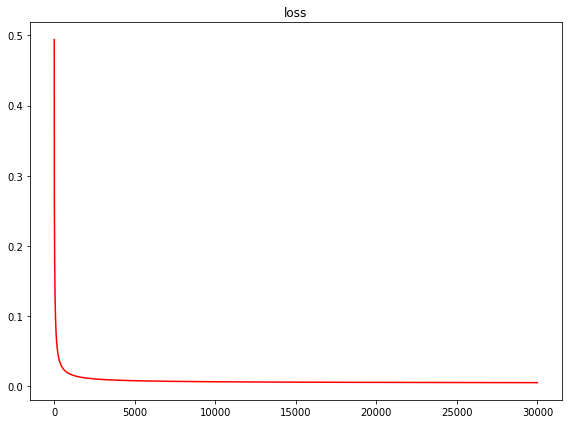

In [524]:
plot_loss_curve(loss1_iteration)

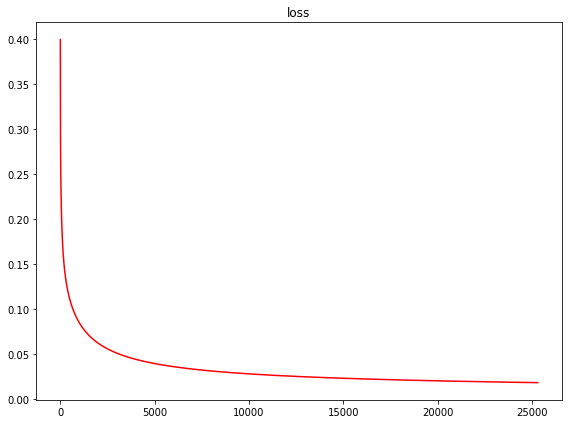

In [525]:
plot_loss_curve(loss2_iteration)

(30000, 3) (30000,)


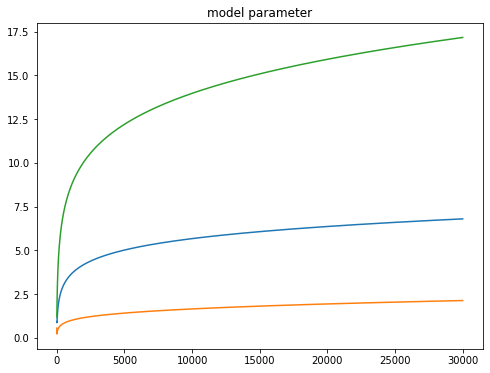

In [526]:
plot_model_parameter(theta1_iteration)

(30000, 4) (30000,)


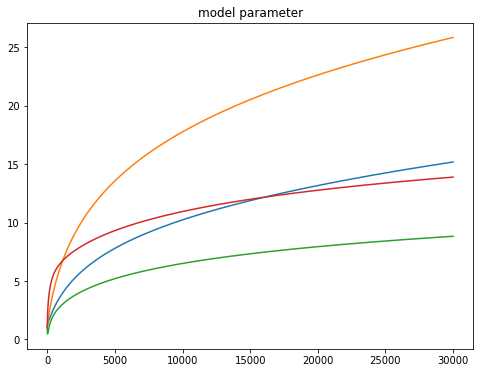

In [527]:
plot_model_parameter(theta2_iteration)

In [556]:


def plot_classifier1(data, theta):
    
    
    xx, yy = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))
    point= np.array([xx**2, yy**2, -1])
    value = np.matmul(theta, point.T)
    
    divider = value
    
    d1_0_x = np.array([data1[i][0] for i in range(num_data) if data1[i][2] == 0])
    d1_0_y = np.array([data1[i][1] for i in range(num_data) if data1[i][2] == 0])

    d1_1_x = np.array([data1[i][0] for i in range(num_data) if data1[i][2] == 1])
    d1_1_y = np.array([data1[i][1] for i in range(num_data) if data1[i][2] == 1])
    
    d1_z = data1[:,2]


    

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.plot(d1_0_x, d1_0_y, '.', color='blue', label = 'class = 0')
    plt.plot(d1_1_x, d1_1_y, '.', color='red', label = 'class = 1')
    plt.contour(xx,yy, divider, levels=0, colors = 'black')
    
    classifier_plot = plt.pcolormesh(xx,yy,divider, cmap='RdBu_r')
    plt.colorbar(classifier_plot)
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [529]:
def plot_classifier2(data, theta):
    d2_0_x = np.array([data2[i][0] for i in range(num_data) if data2[i][2] == 0])
    d2_0_y = np.array([data2[i][1] for i in range(num_data) if data2[i][2] == 0])
    d2_1_x = np.array([data2[i][0] for i in range(num_data) if data2[i][2] == 1])
    d2_1_y = np.array([data2[i][1] for i in range(num_data) if data2[i][2] == 1])

    d2_z = data2[:,2]
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

In [530]:
plot_classifier1(data1, theta1_optimal)

<Figure size 576x576 with 0 Axes>

In [531]:
plot_classifier2(data2, theta2_optimal)

<Figure size 576x576 with 0 Axes>

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

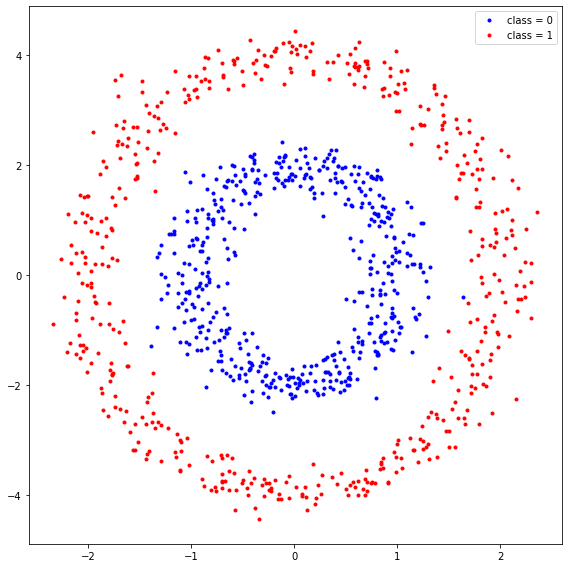

In [532]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

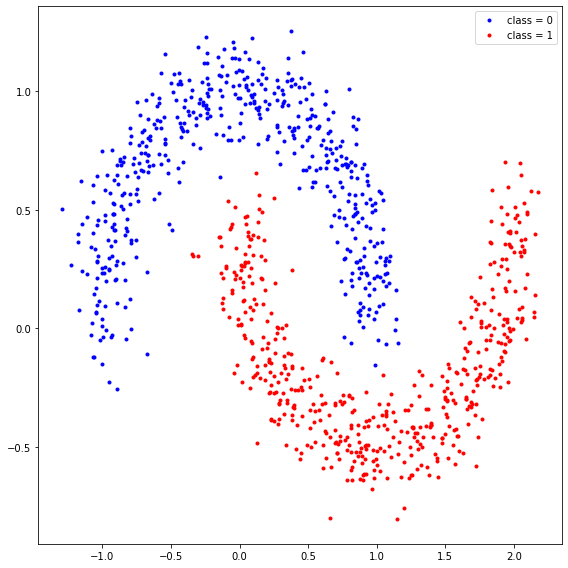

In [533]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

(30000, 3) (30000,)


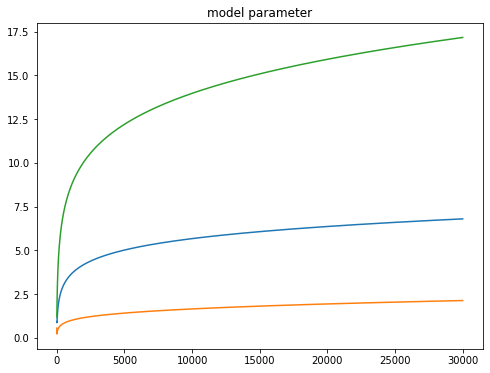

In [534]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

(30000, 4) (30000,)


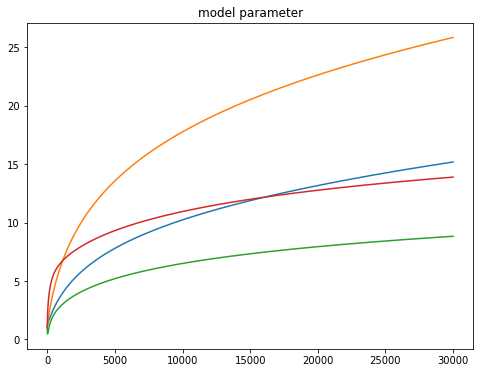

In [535]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

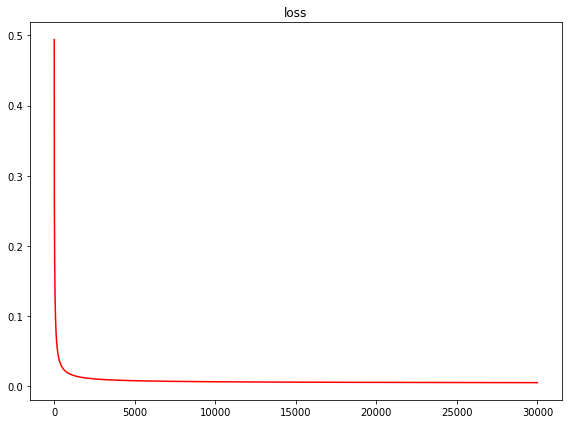

In [536]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

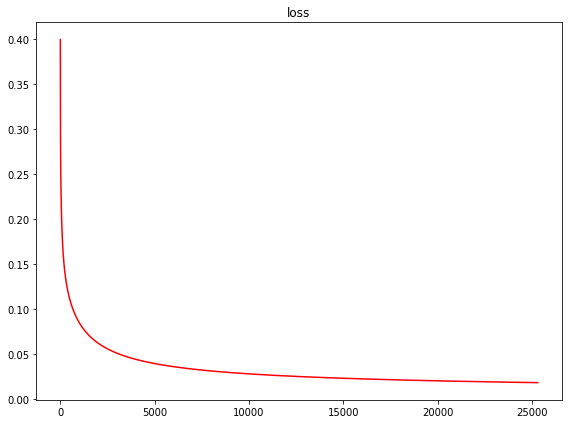

In [537]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

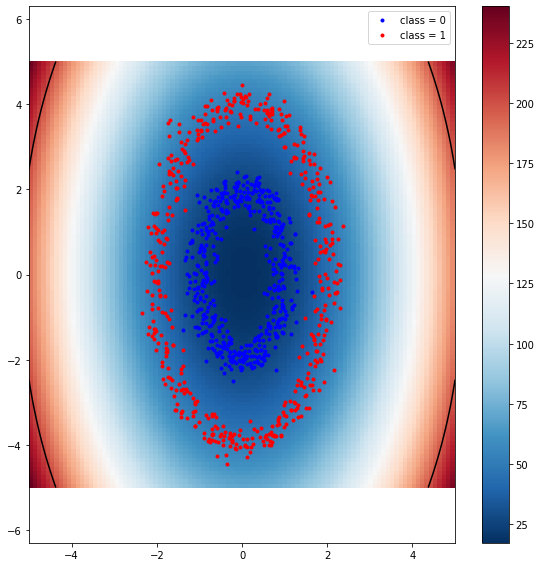

In [555]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

In [539]:
plot_classifier2(data2, theta2_optimal)

<Figure size 576x576 with 0 Axes>

### # 09. print out the accuracy of the obtained classifier1 for data1

In [540]:
print(accuracy_classifier1)

0.999


### # 10. print out the accuracy of the obtained classifier2 for data1

In [541]:
print(accuracy_classifier2)

0.995
